In [140]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('CBD poi.csv', usecols=[0,1], engine='python')
dataframe.head()

date  poi-1
0  2017_08_01     35
1  2017_08_13     40
2  2017_08_17     21
3  2017_08_21     23
4  2017_08_29     39

In [141]:
dataframe = dataframe.sort_values(by=['poi-1'])
dataframe.head()

date  poi-1
62  2017_10_25     18
20  2017_09_08     18
18  2017_09_04     18
70  2017_09_06     20
72  2017_09_20     20

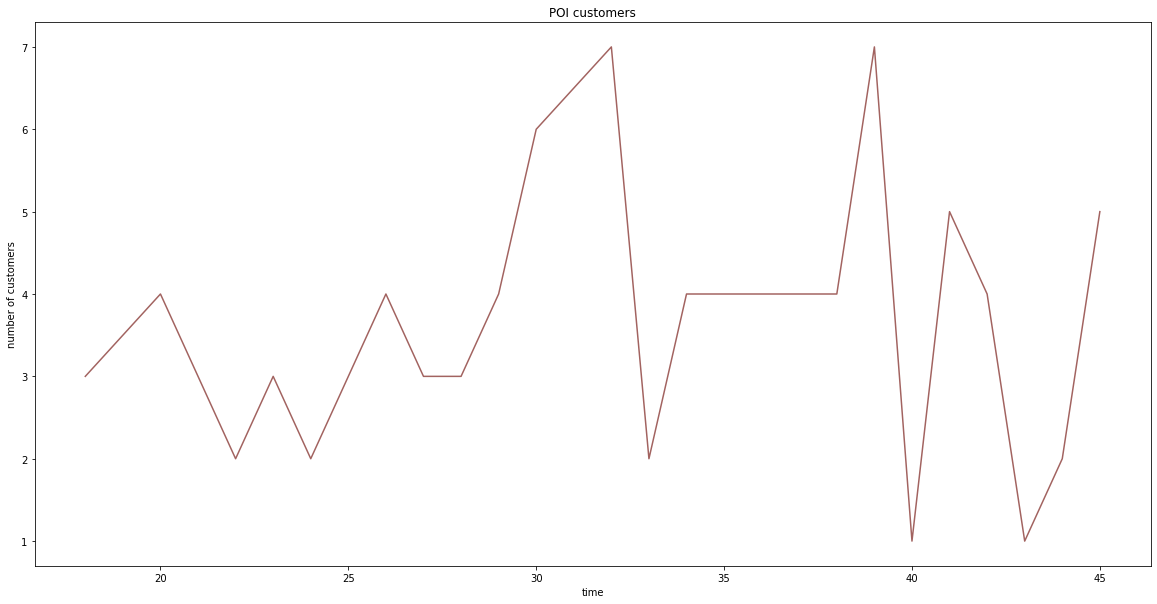

In [143]:
date_grouped = dataframe.groupby('poi-1')['date'].count().plot(kind='line', figsize=(20,10), color='#A26360')
plt.xlabel('time')
plt.ylabel('number of customers')
plt.title('POI customers')
plt.show()

#  time series LSTM for POI-1

In [144]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

dataframe = dataframe[['poi-1']]
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
43/43 - 2s - loss: 0.0952 - 2s/epoch - 43ms/step
Epoch 2/100
43/43 - 0s - loss: 0.0632 - 95ms/epoch - 2ms/step
Epoch 3/100
43/43 - 0s - loss: 0.0410 - 86ms/epoch - 2ms/step
Epoch 4/100
43/43 - 0s - loss: 0.0280 - 82ms/epoch - 2ms/step
Epoch 5/100
43/43 - 0s - loss: 0.0204 - 82ms/epoch - 2ms/step
Epoch 6/100
43/43 - 0s - loss: 0.0170 - 84ms/epoch - 2ms/step
Epoch 7/100
43/43 - 0s - loss: 0.0153 - 81ms/epoch - 2ms/step
Epoch 8/100
43/43 - 0s - loss: 0.0143 - 81ms/epoch - 2ms/step
Epoch 9/100
43/43 - 0s - loss: 0.0136 - 91ms/epoch - 2ms/step
Epoch 10/100
43/43 - 0s - loss: 0.0132 - 91ms/epoch - 2ms/step
Epoch 11/100
43/43 - 0s - loss: 0.0124 - 95ms/epoch - 2ms/step
Epoch 12/100
43/43 - 0s - loss: 0.0118 - 92ms/epoch - 2ms/step
Epoch 13/100
43/43 - 0s - loss: 0.0110 - 91ms/epoch - 2ms/step
Epoch 14/100
43/43 - 0s - loss: 0.0104 - 85ms/epoch - 2ms/step
Epoch 15/100
43/43 - 0s - loss: 0.0098 - 81ms/epoch - 2ms/step
Epoch 16/100
43/43 - 0s - loss: 0.0092 - 87ms/epoch - 2ms/step
Ep

Train Score: 0.61 RMSE
Test Score: 0.48 RMSE


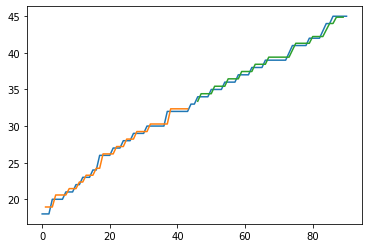

In [145]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# rmse = root mean square error
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#  time series LSTM for all POI's 

Epoch 1/100
61/61 - 2s - loss: 0.1894 - 2s/epoch - 32ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1269 - 114ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0856 - 107ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0604 - 108ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0462 - 109ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0380 - 108ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0338 - 110ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0314 - 132ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0296 - 119ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0282 - 109ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0267 - 109ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0252 - 118ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0238 - 144ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0225 - 108ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0210 - 107ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0195 - 110ms/epoc

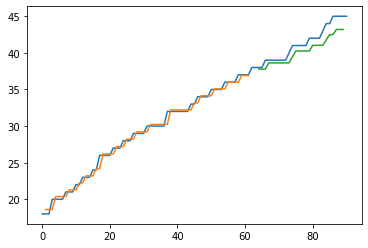

Epoch 1/100
61/61 - 2s - loss: 0.1328 - 2s/epoch - 33ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0931 - 146ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0650 - 110ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0471 - 124ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0374 - 126ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0328 - 113ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0294 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0274 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0252 - 109ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0233 - 147ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0214 - 152ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0192 - 222ms/epoch - 4ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0174 - 205ms/epoch - 3ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0155 - 268ms/epoch - 4ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0137 - 178ms/epoch - 3ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0118 - 184ms/epoc

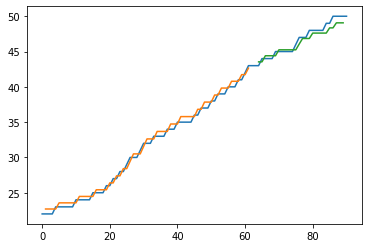

Epoch 1/100
61/61 - 2s - loss: 0.1419 - 2s/epoch - 37ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1029 - 126ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0728 - 135ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0525 - 119ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0418 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0353 - 122ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0324 - 117ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0303 - 99ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0289 - 118ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0269 - 114ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0253 - 101ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0234 - 118ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0216 - 111ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0196 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0177 - 139ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0162 - 110ms/epoch

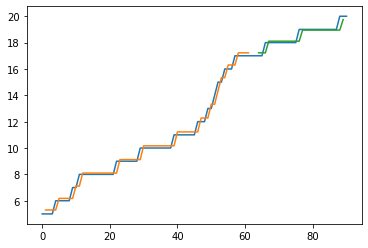

Epoch 1/100
61/61 - 2s - loss: 0.1079 - 2s/epoch - 30ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0723 - 112ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0492 - 109ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0362 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0299 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0268 - 121ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0246 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0224 - 100ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0205 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0186 - 100ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0164 - 100ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0145 - 108ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0126 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0107 - 100ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0089 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0073 - 110ms/epoc

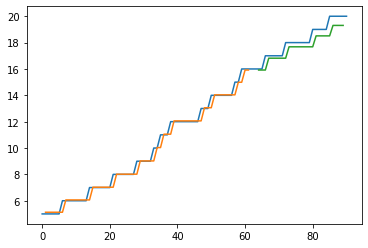

Epoch 1/100
61/61 - 2s - loss: 0.1574 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1010 - 101ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0628 - 101ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0417 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0310 - 100ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0265 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0240 - 108ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0217 - 100ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0198 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0175 - 118ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0156 - 153ms/epoch - 3ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0135 - 187ms/epoch - 3ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0116 - 184ms/epoch - 3ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0098 - 161ms/epoch - 3ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0082 - 141ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0068 - 105ms/epoc

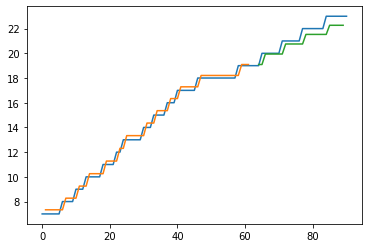

Epoch 1/100
61/61 - 2s - loss: 0.1293 - 2s/epoch - 34ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0856 - 128ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0554 - 107ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0387 - 108ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0306 - 118ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0272 - 118ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0253 - 106ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0236 - 99ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0219 - 99ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0203 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0186 - 99ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0168 - 101ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0152 - 110ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0137 - 109ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0119 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0105 - 102ms/epoch -

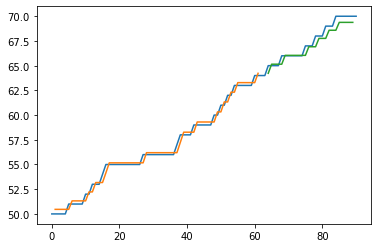

Epoch 1/100
61/61 - 2s - loss: 0.2117 - 2s/epoch - 36ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1947 - 125ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1826 - 115ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1728 - 99ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.1638 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.1562 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.1474 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.1404 - 105ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.1299 - 100ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.1198 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.1090 - 99ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0971 - 100ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0863 - 113ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0748 - 101ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0638 - 113ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0536 - 100ms/epoch 

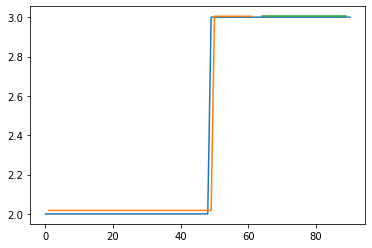

Epoch 1/100
61/61 - 2s - loss: 0.1833 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1380 - 110ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1067 - 110ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0848 - 145ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0681 - 150ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0582 - 146ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0512 - 160ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0464 - 153ms/epoch - 3ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0430 - 137ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0400 - 128ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0369 - 332ms/epoch - 5ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0339 - 278ms/epoch - 5ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0307 - 272ms/epoch - 4ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0279 - 271ms/epoch - 4ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0247 - 189ms/epoch - 3ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0219 - 174ms/epoc

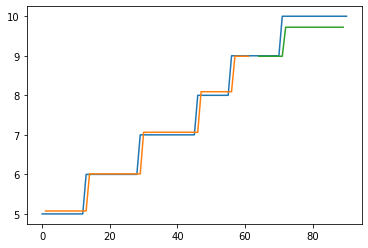

Epoch 1/100
61/61 - 2s - loss: 0.0791 - 2s/epoch - 34ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0519 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0354 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0274 - 284ms/epoch - 5ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0233 - 106ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0211 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0193 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0174 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0156 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0138 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0120 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0105 - 148ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0088 - 124ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0075 - 106ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0063 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0051 - 102ms/epoc

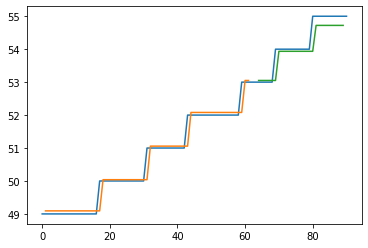

Epoch 1/100
61/61 - 5s - loss: 0.1207 - 5s/epoch - 78ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0708 - 417ms/epoch - 7ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0446 - 297ms/epoch - 5ms/step
Epoch 4/100
61/61 - 1s - loss: 0.0323 - 516ms/epoch - 8ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0266 - 283ms/epoch - 5ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0238 - 294ms/epoch - 5ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0215 - 255ms/epoch - 4ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0193 - 295ms/epoch - 5ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0169 - 265ms/epoch - 4ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0150 - 256ms/epoch - 4ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0131 - 277ms/epoch - 5ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0112 - 280ms/epoch - 5ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0096 - 269ms/epoch - 4ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0080 - 228ms/epoch - 4ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0067 - 218ms/epoch - 4ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0057 - 182ms/epoc

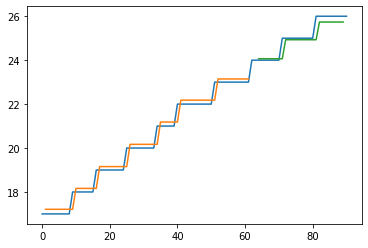

Epoch 1/100
61/61 - 2s - loss: 0.1351 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0890 - 100ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0562 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0377 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0285 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0247 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0225 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0210 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0195 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0180 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0165 - 107ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0150 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0137 - 128ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0122 - 128ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0109 - 128ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0097 - 122ms/epoc

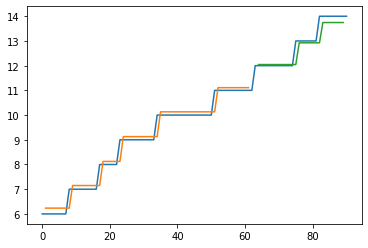

Epoch 1/100
61/61 - 4s - loss: 0.0784 - 4s/epoch - 63ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0443 - 139ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0258 - 143ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0181 - 129ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0159 - 129ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0141 - 125ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0130 - 131ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0117 - 130ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0106 - 133ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0094 - 135ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0083 - 118ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0072 - 114ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0061 - 116ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0054 - 124ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0043 - 165ms/epoch - 3ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0035 - 153ms/epoc

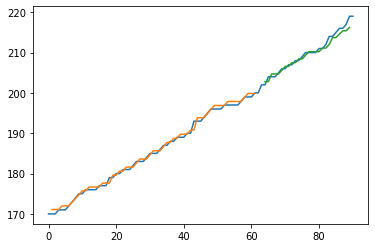

Epoch 1/100
61/61 - 2s - loss: 0.1314 - 2s/epoch - 32ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0928 - 113ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0671 - 167ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0505 - 146ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0405 - 129ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0351 - 203ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0322 - 160ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0302 - 137ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0282 - 185ms/epoch - 3ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0264 - 172ms/epoch - 3ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0248 - 137ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0230 - 130ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0215 - 122ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0196 - 129ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0179 - 129ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0163 - 133ms/epoc

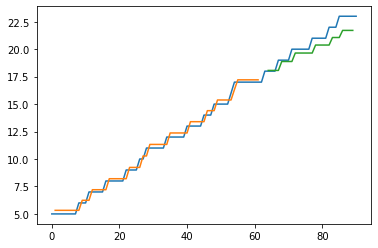

Epoch 1/100
61/61 - 2s - loss: 0.0954 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0613 - 110ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0396 - 101ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0289 - 110ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0243 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0222 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0208 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0194 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0178 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0162 - 112ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0147 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0131 - 106ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0118 - 102ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0103 - 106ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0088 - 123ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0076 - 105ms/epoc

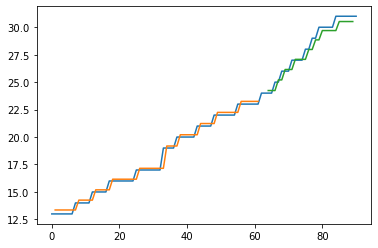

Epoch 1/100
61/61 - 3s - loss: 0.1031 - 3s/epoch - 47ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0641 - 125ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0422 - 118ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0317 - 96ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0263 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0237 - 99ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0219 - 122ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0202 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0188 - 116ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0171 - 95ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0156 - 93ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0141 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0127 - 113ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0113 - 99ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0099 - 100ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0087 - 116ms/epoch - 2

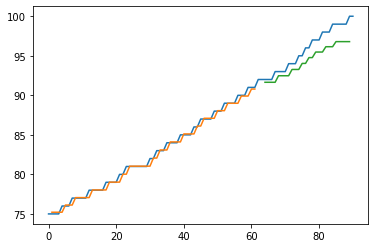

Epoch 1/100
61/61 - 2s - loss: 0.1907 - 2s/epoch - 30ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1385 - 94ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0965 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0671 - 91ms/epoch - 1ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0489 - 96ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0399 - 97ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0358 - 98ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0333 - 110ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0315 - 94ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0298 - 95ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0280 - 94ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0264 - 94ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0246 - 102ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0229 - 95ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0211 - 99ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0193 - 96ms/epoch - 2ms/step

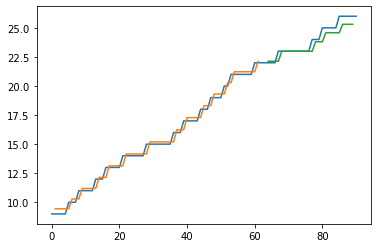

Epoch 1/100
61/61 - 2s - loss: 0.1348 - 2s/epoch - 29ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0863 - 131ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0554 - 113ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0392 - 106ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0318 - 120ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0281 - 110ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0259 - 112ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0241 - 108ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0221 - 98ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0202 - 116ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0184 - 153ms/epoch - 3ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0168 - 132ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0150 - 107ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0133 - 108ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0117 - 122ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0101 - 113ms/epoch

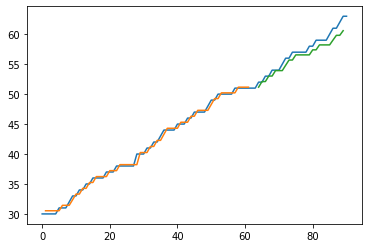

Epoch 1/100
61/61 - 3s - loss: 0.1605 - 3s/epoch - 57ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1022 - 173ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0628 - 220ms/epoch - 4ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0404 - 253ms/epoch - 4ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0289 - 202ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0241 - 172ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0221 - 210ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0208 - 190ms/epoch - 3ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0196 - 149ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0186 - 119ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0176 - 122ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0166 - 123ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0157 - 120ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0146 - 122ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0136 - 122ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0127 - 123ms/epoc

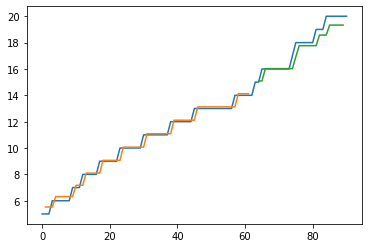

Epoch 1/100
61/61 - 2s - loss: 0.1674 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1178 - 103ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0856 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0655 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0523 - 119ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0442 - 121ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0396 - 130ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0371 - 116ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0355 - 147ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0342 - 113ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0334 - 121ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0322 - 113ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0308 - 115ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0299 - 119ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0292 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0277 - 121ms/epoc

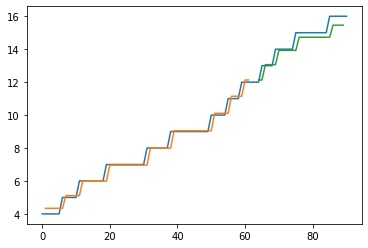

Epoch 1/100
61/61 - 2s - loss: 0.1215 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0794 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0512 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0350 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0274 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0238 - 108ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0218 - 109ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0200 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0183 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0165 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0146 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0127 - 106ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0108 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0090 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0074 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0058 - 106ms/epoc

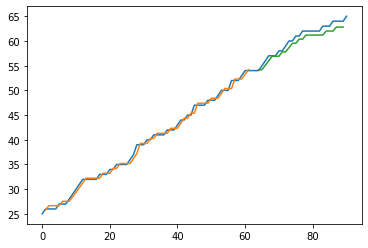

Epoch 1/100
61/61 - 2s - loss: 0.1720 - 2s/epoch - 31ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1418 - 111ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1200 - 108ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1036 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0899 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0782 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0686 - 114ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0598 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0518 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0452 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0383 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0334 - 104ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0289 - 112ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0253 - 110ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0224 - 99ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0205 - 111ms/epoch

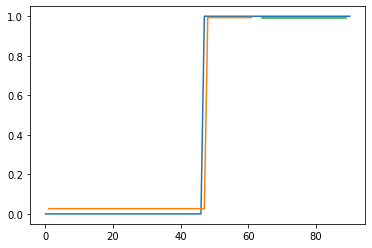

Epoch 1/100
61/61 - 2s - loss: 0.1790 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1330 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0992 - 106ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0747 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0584 - 106ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0488 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0429 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0388 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0358 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0326 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0296 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0262 - 111ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0231 - 107ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0203 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0170 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0141 - 103ms/epoc

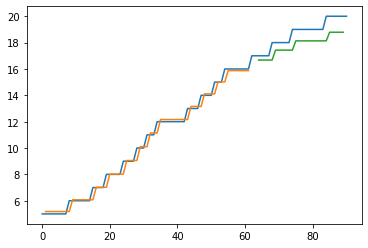

Epoch 1/100
61/61 - 2s - loss: 0.1380 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0960 - 129ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0702 - 140ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0557 - 115ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0464 - 131ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0416 - 124ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0387 - 122ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0367 - 116ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0351 - 109ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0334 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0320 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0303 - 114ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0287 - 105ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0271 - 114ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0255 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0238 - 118ms/epoc

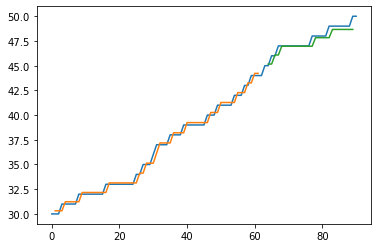

Epoch 1/100
61/61 - 2s - loss: 0.0997 - 2s/epoch - 34ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0522 - 110ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0292 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0207 - 106ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0184 - 132ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0170 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0159 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0151 - 108ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0140 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0130 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0120 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0111 - 109ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0101 - 106ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0092 - 136ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0084 - 114ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0075 - 103ms/epoc

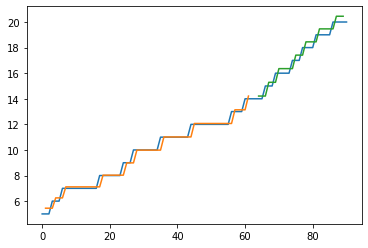

Epoch 1/100
61/61 - 2s - loss: 0.0788 - 2s/epoch - 32ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0460 - 122ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0293 - 121ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0224 - 109ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0194 - 105ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0176 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0159 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0143 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0127 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0111 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0098 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0083 - 107ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0071 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0061 - 107ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0050 - 100ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0043 - 103ms/epoc

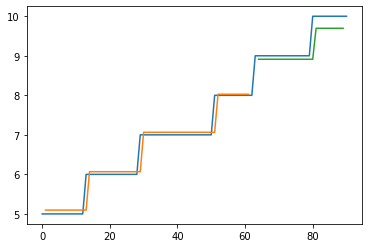

Epoch 1/100
61/61 - 2s - loss: 0.1739 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1169 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0753 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0495 - 106ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0361 - 109ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0310 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0275 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0255 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0239 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0224 - 113ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0206 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0191 - 107ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0175 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0161 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0146 - 106ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0133 - 105ms/epoc

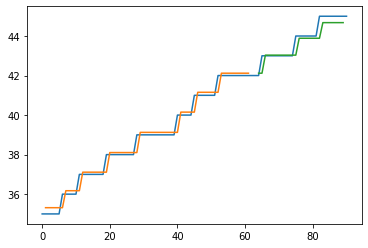

Epoch 1/100
61/61 - 2s - loss: 0.1438 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1077 - 107ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0839 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0684 - 115ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0579 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0511 - 110ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0457 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0414 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0372 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0330 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0286 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0244 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0203 - 111ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0164 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0132 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0102 - 106ms/epoc

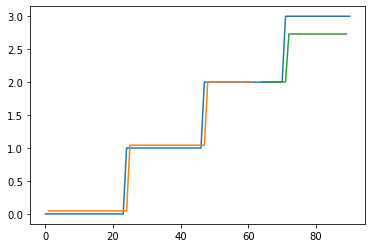

Epoch 1/100
61/61 - 2s - loss: 0.1614 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1008 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0626 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0411 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0311 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0266 - 113ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0243 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0228 - 106ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0214 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0200 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0189 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0175 - 106ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0164 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0150 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0139 - 106ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0127 - 103ms/epoc

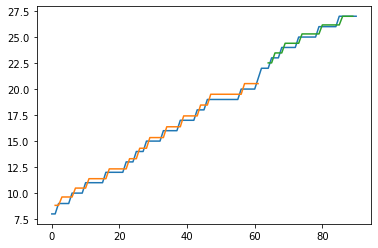

Epoch 1/100
61/61 - 2s - loss: 0.1233 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0795 - 103ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0513 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0368 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0294 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0258 - 113ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0235 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0210 - 105ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0190 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0170 - 114ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0151 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0130 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0113 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0096 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0081 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0067 - 103ms/epoc

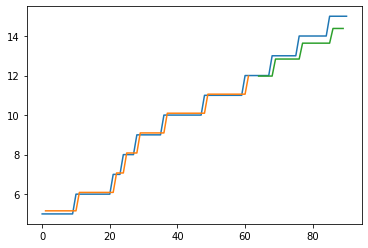

Epoch 1/100
61/61 - 2s - loss: 0.1004 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0524 - 113ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0274 - 101ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0175 - 106ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0144 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0134 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0127 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0122 - 108ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0114 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0106 - 109ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0098 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0091 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0084 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0078 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0071 - 105ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0064 - 102ms/epoc

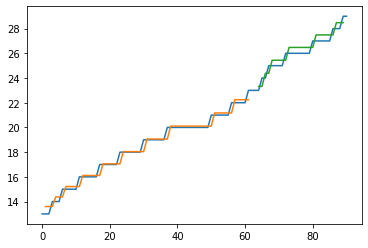

Epoch 1/100
61/61 - 2s - loss: 0.1297 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0940 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0695 - 113ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0538 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0442 - 106ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0393 - 106ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0362 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0342 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0325 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0309 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0294 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0279 - 106ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0264 - 107ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0249 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0233 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0218 - 114ms/epoc

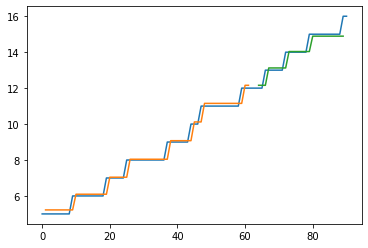

Epoch 1/100
61/61 - 2s - loss: 0.1108 - 2s/epoch - 28ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0708 - 118ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0448 - 123ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0313 - 118ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0255 - 117ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0229 - 126ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0212 - 119ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0199 - 120ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0185 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0172 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0161 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0146 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0132 - 101ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0119 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0108 - 107ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0095 - 105ms/epoc

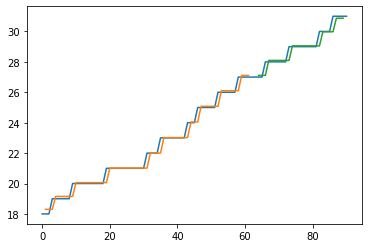

Epoch 1/100
61/61 - 2s - loss: 0.1645 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1161 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0857 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0648 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0531 - 110ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0466 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0430 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0397 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0372 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0347 - 111ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0324 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0299 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0276 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0255 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0229 - 108ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0206 - 104ms/epoc

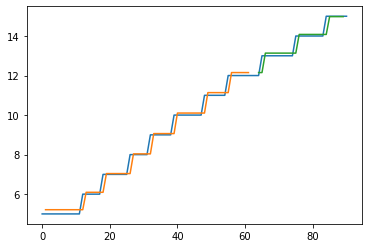

Epoch 1/100
61/61 - 2s - loss: 0.1497 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1059 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0775 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0593 - 109ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0492 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0435 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0405 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0382 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0364 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0349 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0331 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0316 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0298 - 106ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0283 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0267 - 106ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0249 - 102ms/epoc

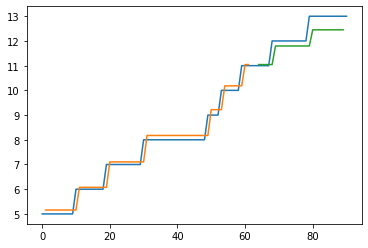

Epoch 1/100
61/61 - 2s - loss: 0.0870 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0530 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0361 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0280 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0245 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0224 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0209 - 105ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0195 - 109ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0178 - 106ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0162 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0148 - 107ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0135 - 108ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0120 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0107 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0094 - 113ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0081 - 105ms/epoc

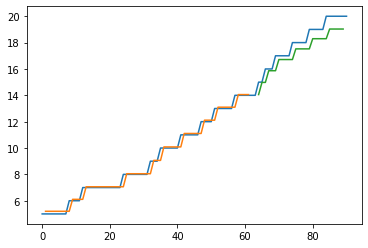

Epoch 1/100
61/61 - 2s - loss: 0.1131 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0729 - 108ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0468 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0340 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0284 - 105ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0252 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0229 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0208 - 106ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0191 - 150ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0166 - 196ms/epoch - 3ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0148 - 191ms/epoch - 3ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0126 - 190ms/epoch - 3ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0109 - 194ms/epoch - 3ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0093 - 176ms/epoch - 3ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0078 - 183ms/epoch - 3ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0066 - 178ms/epoc

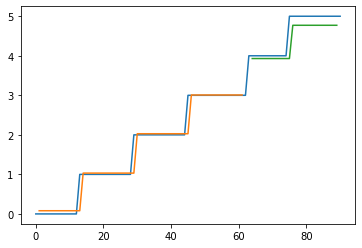

Epoch 1/100
61/61 - 2s - loss: 0.0516 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0328 - 109ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0257 - 106ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0225 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0206 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0185 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0161 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0142 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0123 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0106 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0089 - 106ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0075 - 104ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0063 - 108ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0054 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0044 - 107ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0039 - 104ms/epoc

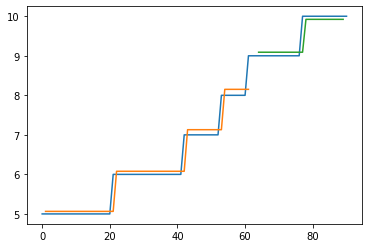

Epoch 1/100
61/61 - 2s - loss: 0.2056 - 2s/epoch - 33ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1462 - 109ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1064 - 107ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0794 - 124ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0622 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0519 - 122ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0465 - 135ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0420 - 100ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0385 - 115ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0354 - 127ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0329 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0300 - 118ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0272 - 110ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0245 - 101ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0218 - 117ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0192 - 120ms/epoc

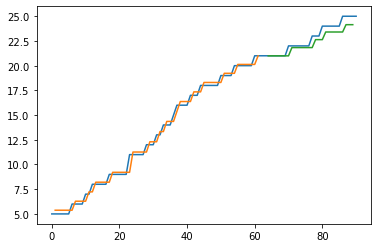

Epoch 1/100
61/61 - 2s - loss: 0.1019 - 2s/epoch - 28ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0642 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0445 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0346 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0296 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0263 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0236 - 106ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0211 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0187 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0160 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0138 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0117 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0098 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0082 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0069 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0056 - 102ms/epoc

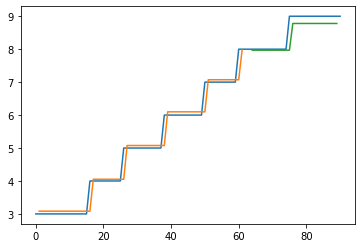

Epoch 1/100
61/61 - 2s - loss: 0.1074 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0730 - 122ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0533 - 129ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0425 - 128ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0365 - 128ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0326 - 128ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0300 - 127ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0272 - 122ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0246 - 120ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0219 - 121ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0191 - 124ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0161 - 126ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0131 - 129ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0103 - 119ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0077 - 119ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0055 - 121ms/epoc

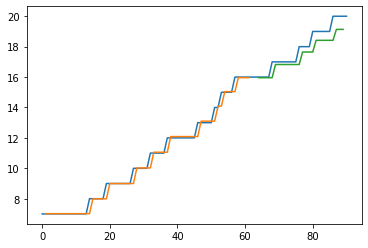

Epoch 1/100
61/61 - 2s - loss: 0.1561 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0997 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0622 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0407 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0316 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0276 - 105ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0255 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0237 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0221 - 107ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0208 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0188 - 106ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0172 - 107ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0158 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0143 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0130 - 105ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0115 - 103ms/epoc

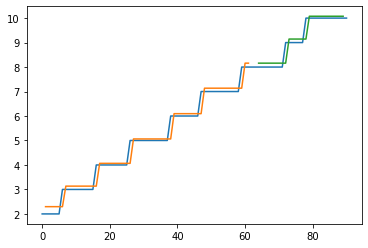

Epoch 1/100
61/61 - 2s - loss: 0.0758 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0379 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0215 - 111ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0156 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0134 - 105ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0119 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0104 - 105ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0089 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0076 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0063 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0051 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0041 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0032 - 108ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0025 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0019 - 105ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0014 - 103ms/epoc

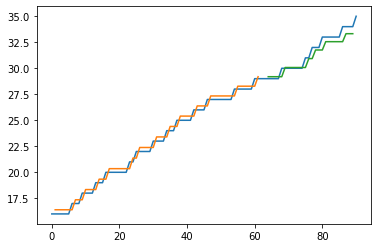

Epoch 1/100
61/61 - 2s - loss: 0.2301 - 2s/epoch - 30ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1651 - 145ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1231 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0961 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0783 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0674 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0601 - 112ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0540 - 105ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0491 - 114ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0443 - 107ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0397 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0357 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0316 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0278 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0245 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0212 - 107ms/epoc

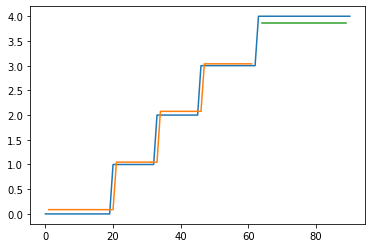

Epoch 1/100
61/61 - 2s - loss: 0.1207 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0848 - 108ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0590 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0427 - 105ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0337 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0296 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0270 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0245 - 119ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0223 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0203 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0180 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0159 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0138 - 111ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0120 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0099 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0084 - 103ms/epoc

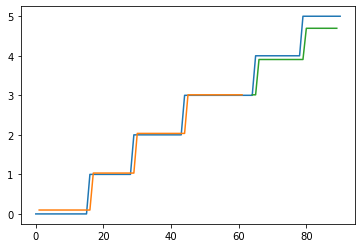

Epoch 1/100
61/61 - 2s - loss: 0.3549 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.3147 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.2829 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.2566 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.2341 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.2144 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.1969 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.1817 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.1677 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.1541 - 109ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.1421 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.1301 - 106ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.1186 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.1078 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0965 - 105ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0855 - 106ms/epoc

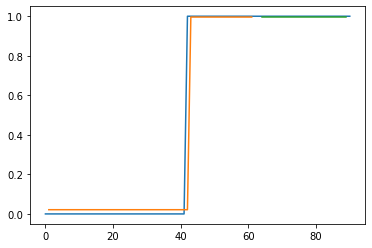

Epoch 1/100
61/61 - 2s - loss: 0.0987 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0598 - 106ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0379 - 113ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0276 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0233 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0211 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0192 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0175 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0158 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0141 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0122 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0106 - 104ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0091 - 109ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0076 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0063 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0052 - 102ms/epoc

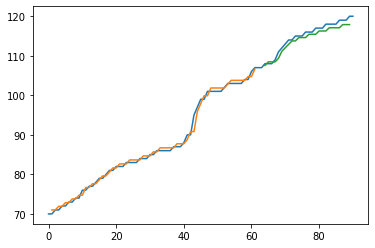

Epoch 1/100
61/61 - 2s - loss: 0.0954 - 2s/epoch - 32ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0607 - 122ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0410 - 138ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0317 - 126ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0272 - 124ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0242 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0221 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0199 - 109ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0180 - 106ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0163 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0144 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0126 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0111 - 112ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0096 - 108ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0082 - 106ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0071 - 104ms/epoc

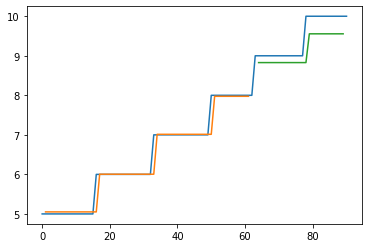

Epoch 1/100
61/61 - 3s - loss: 0.1265 - 3s/epoch - 41ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1192 - 144ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1145 - 127ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1102 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.1068 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.1038 - 110ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.1008 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0983 - 107ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0951 - 108ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0927 - 108ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0896 - 106ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0860 - 108ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0827 - 107ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0792 - 107ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0757 - 116ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0721 - 132ms/epoc

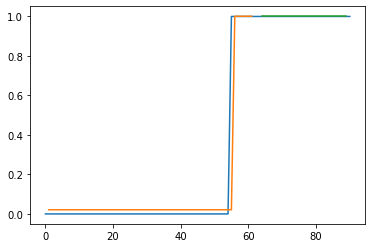

Epoch 1/100
61/61 - 2s - loss: 0.2494 - 2s/epoch - 39ms/step
Epoch 2/100
61/61 - 0s - loss: 0.2271 - 107ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.2087 - 133ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1951 - 147ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.1847 - 110ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.1756 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.1669 - 108ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.1595 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.1524 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.1447 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.1369 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.1292 - 104ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.1211 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.1126 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.1037 - 122ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0949 - 103ms/epoc

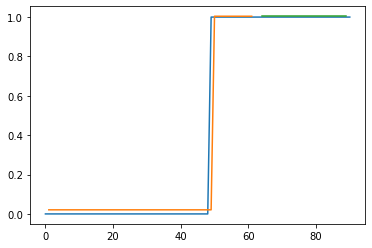

Epoch 1/100
61/61 - 2s - loss: 0.2776 - 2s/epoch - 34ms/step
Epoch 2/100
61/61 - 0s - loss: 0.2072 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1573 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1238 - 107ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.1019 - 109ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0880 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0783 - 108ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0713 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0659 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0604 - 106ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0552 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0503 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0455 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0406 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0363 - 105ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0319 - 104ms/epoc

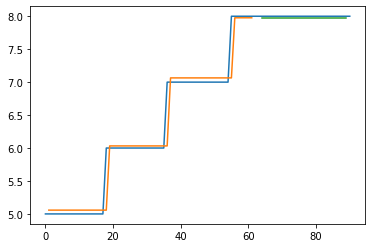

Epoch 1/100
61/61 - 2s - loss: 0.1653 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1087 - 103ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0725 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0491 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0359 - 105ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0291 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0258 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0240 - 105ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0230 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0220 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0211 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0203 - 131ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0194 - 124ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0185 - 128ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0177 - 122ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0168 - 124ms/epoc

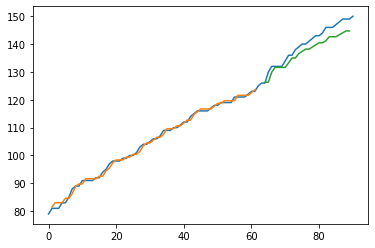

Epoch 1/100
61/61 - 2s - loss: 0.0870 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0615 - 110ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0462 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0379 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0325 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0291 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0258 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0231 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0205 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0181 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0160 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0141 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0126 - 106ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0113 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0103 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0096 - 123ms/epoc

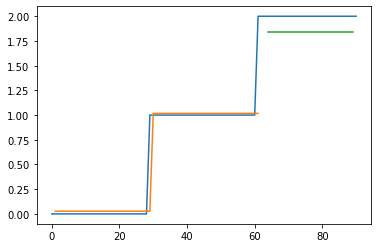

Epoch 1/100
61/61 - 2s - loss: 0.0761 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0480 - 102ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0332 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0266 - 106ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0233 - 114ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0209 - 113ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0189 - 109ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0169 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0152 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0134 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0117 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0100 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0086 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0074 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0062 - 112ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0053 - 109ms/epoc

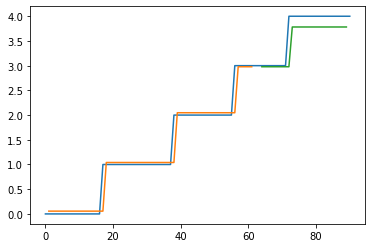

Epoch 1/100
61/61 - 2s - loss: 0.1032 - 2s/epoch - 27ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0687 - 107ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0467 - 106ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0353 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0300 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0272 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0250 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0228 - 105ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0210 - 113ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0190 - 98ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0171 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0153 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0136 - 102ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0118 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0103 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0089 - 104ms/epoch

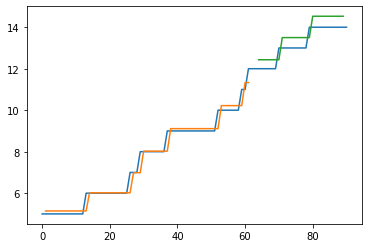

Epoch 1/100
61/61 - 2s - loss: 0.0956 - 2s/epoch - 31ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0631 - 102ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0421 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0315 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0258 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0228 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0208 - 111ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0188 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0168 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0150 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0130 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0112 - 104ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0096 - 102ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0079 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0067 - 118ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0055 - 106ms/epoc

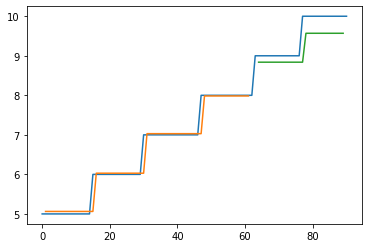

Epoch 1/100
61/61 - 2s - loss: 0.1496 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1039 - 107ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0753 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0583 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0486 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0429 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0391 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0357 - 109ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0328 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0297 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0272 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0245 - 104ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0219 - 105ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0192 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0170 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0149 - 106ms/epoc

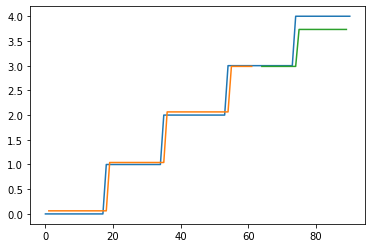

Epoch 1/100
61/61 - 2s - loss: 0.1154 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0637 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0357 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0228 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0180 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0162 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0151 - 108ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0142 - 113ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0132 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0123 - 116ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0113 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0103 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0094 - 106ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0084 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0076 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0067 - 104ms/epoc

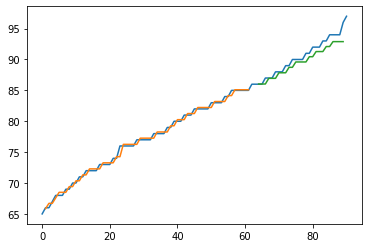

Epoch 1/100
61/61 - 2s - loss: 0.0980 - 2s/epoch - 34ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0773 - 120ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0631 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0540 - 105ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0476 - 131ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0430 - 135ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0389 - 139ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0353 - 117ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0315 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0280 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0245 - 118ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0214 - 108ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0181 - 111ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0151 - 106ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0126 - 108ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0103 - 111ms/epoc

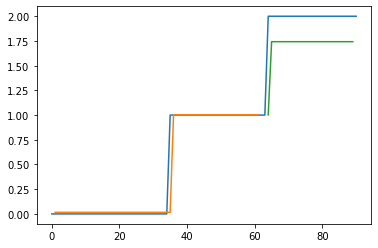

Epoch 1/100
61/61 - 2s - loss: 0.0756 - 2s/epoch - 28ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0428 - 124ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0266 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0199 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0173 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0157 - 138ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0144 - 132ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0125 - 132ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0111 - 125ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0097 - 133ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0084 - 129ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0072 - 128ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0061 - 119ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0051 - 120ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0043 - 126ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0035 - 122ms/epoc

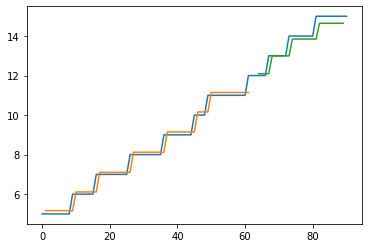

Epoch 1/100
61/61 - 2s - loss: 0.1225 - 2s/epoch - 27ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0827 - 112ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0581 - 107ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0443 - 107ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0376 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0332 - 112ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0299 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0271 - 107ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0245 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0216 - 109ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0188 - 106ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0162 - 115ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0138 - 111ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0116 - 105ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0098 - 108ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0080 - 104ms/epoc

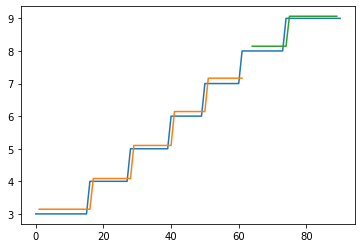

Epoch 1/100
61/61 - 2s - loss: 0.1102 - 2s/epoch - 30ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0710 - 140ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0469 - 127ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0342 - 117ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0281 - 117ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0253 - 106ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0234 - 120ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0217 - 109ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0203 - 100ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0186 - 121ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0170 - 113ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0157 - 127ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0138 - 120ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0122 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0107 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0092 - 112ms/epoc

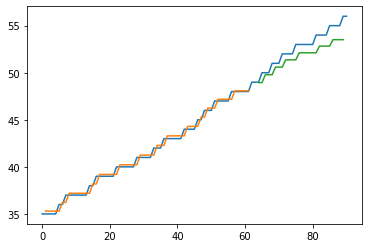

Epoch 1/100
61/61 - 2s - loss: 0.1717 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1270 - 102ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0970 - 99ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0769 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0632 - 99ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0550 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0489 - 112ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0450 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0418 - 107ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0388 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0360 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0335 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0305 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0278 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0250 - 105ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0222 - 101ms/epoch 

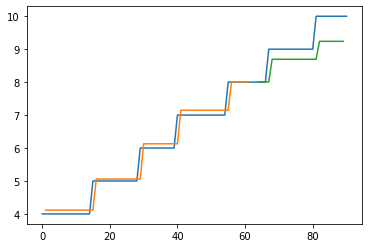

Epoch 1/100
61/61 - 2s - loss: 0.1075 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0616 - 101ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0377 - 100ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0267 - 95ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0227 - 94ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0208 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0191 - 97ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0175 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0158 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0142 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0127 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0110 - 100ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0095 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0081 - 95ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0068 - 91ms/epoch - 1ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0058 - 106ms/epoch - 2

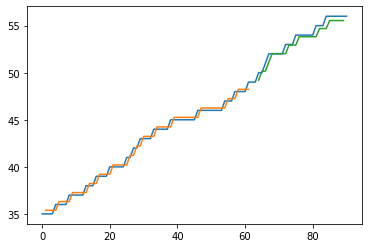

Epoch 1/100
61/61 - 2s - loss: 0.1534 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1066 - 102ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0776 - 100ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0593 - 104ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0487 - 97ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0425 - 108ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0386 - 96ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0359 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0335 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0313 - 115ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0292 - 93ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0269 - 92ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0247 - 91ms/epoch - 1ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0226 - 106ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0204 - 98ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0183 - 107ms/epoch - 2m

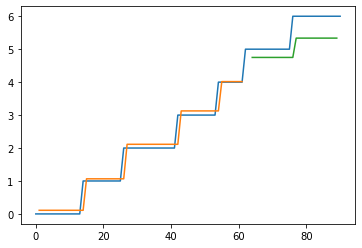

Epoch 1/100
61/61 - 2s - loss: 0.0763 - 2s/epoch - 33ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0441 - 109ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0299 - 101ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0239 - 101ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0210 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0189 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0172 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0156 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0139 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0122 - 111ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0108 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0094 - 101ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0082 - 100ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0071 - 94ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0060 - 93ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0052 - 91ms/epoch -

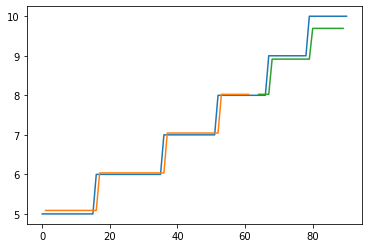

Epoch 1/100
61/61 - 2s - loss: 0.0724 - 2s/epoch - 30ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0381 - 107ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0235 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0179 - 120ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0155 - 105ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0136 - 125ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0121 - 107ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0105 - 118ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0090 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0076 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0064 - 119ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0054 - 110ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0044 - 143ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0036 - 121ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0029 - 147ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0023 - 122ms/epoc

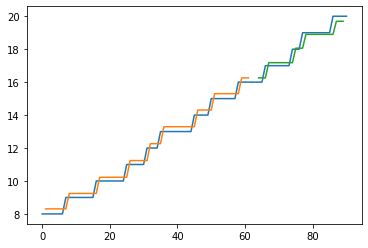

Epoch 1/100
61/61 - 2s - loss: 0.1263 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0895 - 102ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0671 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0548 - 98ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0462 - 99ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0412 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0365 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0325 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0286 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0248 - 99ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0216 - 94ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0182 - 95ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0155 - 92ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0129 - 103ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0107 - 100ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0088 - 101ms/epoch - 2m

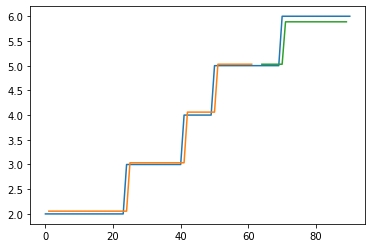

Epoch 1/100
61/61 - 2s - loss: 0.1433 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1029 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0755 - 90ms/epoch - 1ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0581 - 91ms/epoch - 1ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0485 - 91ms/epoch - 1ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0428 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0389 - 96ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0365 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0340 - 100ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0319 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0298 - 104ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0279 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0258 - 99ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0240 - 95ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0220 - 91ms/epoch - 1ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0200 - 100ms/epoch - 2ms

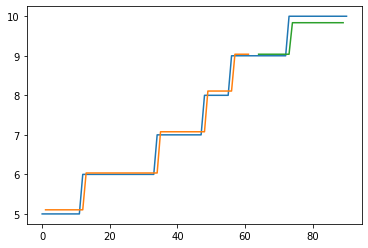

Epoch 1/100
61/61 - 2s - loss: 0.1451 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1127 - 119ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0918 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0795 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0710 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0653 - 113ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0615 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0576 - 99ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0544 - 95ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0512 - 91ms/epoch - 1ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0481 - 91ms/epoch - 1ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0452 - 109ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0419 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0386 - 104ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0355 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0316 - 103ms/epoch - 

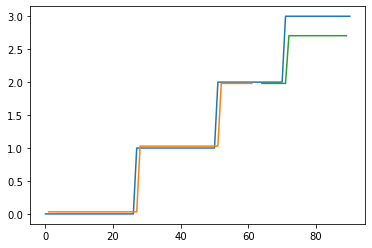

Epoch 1/100
61/61 - 2s - loss: 0.0995 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0586 - 101ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0392 - 100ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0312 - 94ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0276 - 106ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0253 - 96ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0231 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0209 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0189 - 106ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0169 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0149 - 100ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0130 - 94ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0113 - 91ms/epoch - 1ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0095 - 92ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0081 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0066 - 97ms/epoch - 2m

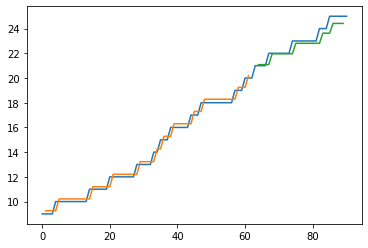

Epoch 1/100
61/61 - 2s - loss: 0.1181 - 2s/epoch - 37ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0643 - 128ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0400 - 133ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0296 - 105ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0250 - 114ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0228 - 116ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0211 - 111ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0196 - 114ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0184 - 99ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0171 - 113ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0157 - 112ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0146 - 97ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0133 - 101ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0121 - 113ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0110 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0101 - 102ms/epoch 

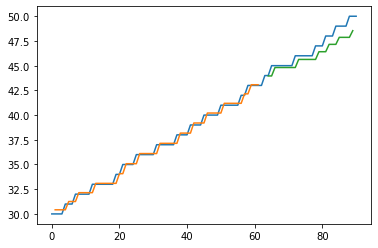

Epoch 1/100
61/61 - 2s - loss: 0.1063 - 2s/epoch - 28ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0764 - 108ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0561 - 92ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0432 - 94ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0359 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0314 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0281 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0250 - 131ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0220 - 118ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0191 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0163 - 100ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0136 - 95ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0112 - 94ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0090 - 92ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0074 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0061 - 98ms/epoch - 2m

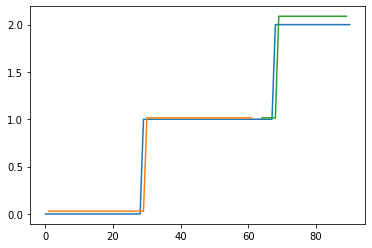

Epoch 1/100
61/61 - 2s - loss: 0.1626 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0924 - 113ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0543 - 115ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0359 - 106ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0282 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0248 - 107ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0227 - 108ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0212 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0200 - 100ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0183 - 103ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0169 - 101ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0157 - 112ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0143 - 101ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0130 - 111ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0117 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0105 - 102ms/epoc

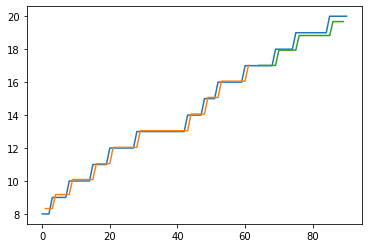

Epoch 1/100
61/61 - 2s - loss: 0.0557 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0250 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0127 - 101ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0096 - 95ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0088 - 98ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0082 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0074 - 104ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0068 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0061 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0054 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0049 - 97ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0042 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0036 - 99ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0031 - 95ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0026 - 96ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0022 - 109ms/epoch - 2m

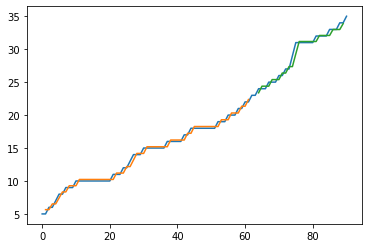

Epoch 1/100
61/61 - 2s - loss: 0.2349 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1794 - 99ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1345 - 91ms/epoch - 1ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1005 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0774 - 108ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0624 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0540 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0490 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0454 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0422 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0395 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0364 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0337 - 102ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0307 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0282 - 110ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0255 - 102ms/epoch 

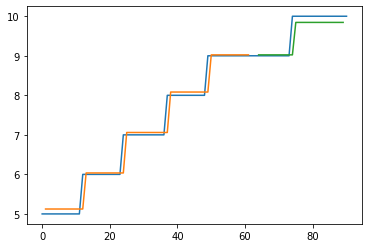

Epoch 1/100
61/61 - 2s - loss: 0.1260 - 2s/epoch - 30ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0858 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0597 - 115ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0442 - 107ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0356 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0311 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0277 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0252 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0228 - 93ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0205 - 92ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0178 - 91ms/epoch - 1ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0153 - 101ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0127 - 97ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0102 - 110ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0078 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0057 - 104ms/epoch - 

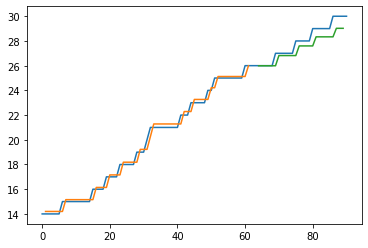

Epoch 1/100
61/61 - 2s - loss: 0.1149 - 2s/epoch - 29ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0805 - 111ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0615 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0514 - 94ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0462 - 91ms/epoch - 1ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0420 - 96ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0387 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0353 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0322 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0294 - 100ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0262 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0234 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0206 - 105ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0180 - 94ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0156 - 92ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0133 - 97ms/epoch - 2m

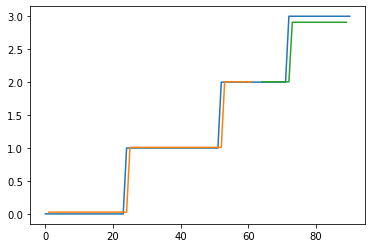

Epoch 1/100
61/61 - 2s - loss: 0.1504 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0894 - 103ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0464 - 100ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0241 - 100ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0162 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0142 - 104ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0132 - 105ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0124 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0116 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0107 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0098 - 101ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0091 - 101ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0081 - 103ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0072 - 93ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0064 - 92ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0056 - 95ms/epoch -

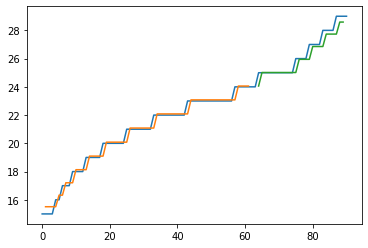

Epoch 1/100
61/61 - 2s - loss: 0.1200 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0821 - 99ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0588 - 91ms/epoch - 1ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0468 - 96ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0407 - 92ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0375 - 94ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0345 - 105ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0322 - 105ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0301 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0278 - 107ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0256 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0234 - 105ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0215 - 106ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0192 - 95ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0170 - 93ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0150 - 92ms/epoch - 2ms/

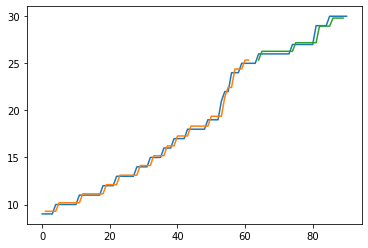

Epoch 1/100
61/61 - 2s - loss: 0.0731 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0428 - 99ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0279 - 94ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0219 - 107ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0195 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0181 - 101ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0168 - 106ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0156 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0144 - 100ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0132 - 100ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0121 - 94ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0108 - 92ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0097 - 92ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0085 - 107ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0075 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0065 - 102ms/epoch - 2

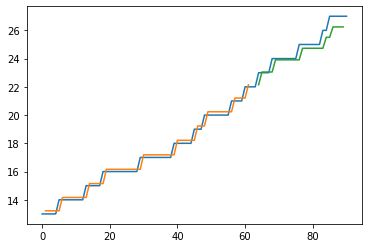

Epoch 1/100
61/61 - 2s - loss: 0.2037 - 2s/epoch - 29ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1294 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0819 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0533 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0386 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0312 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0276 - 105ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0255 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0239 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0225 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0213 - 103ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0198 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0184 - 101ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0171 - 101ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0157 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0146 - 106ms/epoc

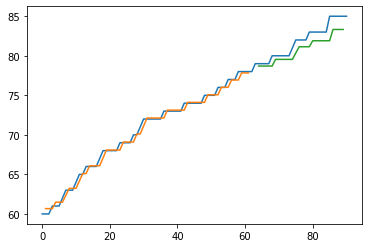

Epoch 1/100
61/61 - 2s - loss: 0.1351 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1036 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0822 - 105ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0681 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0592 - 100ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0529 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0473 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0421 - 101ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0373 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0326 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0280 - 107ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0240 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0206 - 101ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0175 - 93ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0148 - 90ms/epoch - 1ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0129 - 92ms/epoch -

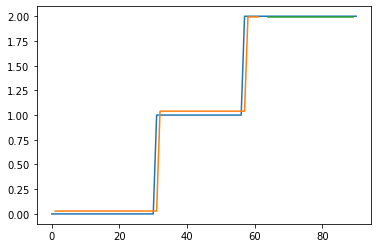

Epoch 1/100
61/61 - 2s - loss: 0.1306 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0737 - 140ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0412 - 116ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0271 - 119ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0219 - 112ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0200 - 122ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0186 - 135ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0174 - 128ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0162 - 117ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0150 - 121ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0139 - 123ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0129 - 126ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0117 - 129ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0106 - 117ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0096 - 119ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0086 - 119ms/epoc

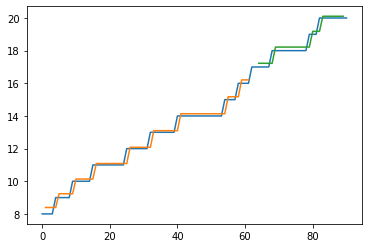

Epoch 1/100
61/61 - 2s - loss: 0.0929 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0556 - 98ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0365 - 95ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0276 - 113ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0239 - 104ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0219 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0206 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0196 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0181 - 117ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0169 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0157 - 100ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0145 - 94ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0133 - 92ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0121 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0109 - 100ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0098 - 98ms/epoch - 2

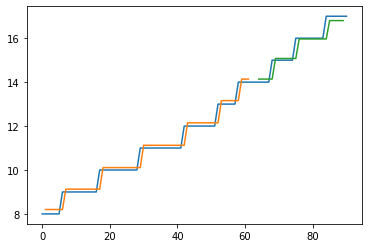

Epoch 1/100
61/61 - 2s - loss: 0.1731 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1266 - 102ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0929 - 100ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0679 - 95ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0514 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0426 - 96ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0380 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0356 - 106ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0337 - 102ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0319 - 101ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0301 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0286 - 94ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0269 - 94ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0254 - 91ms/epoch - 1ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0236 - 101ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0220 - 97ms/epoch - 2m

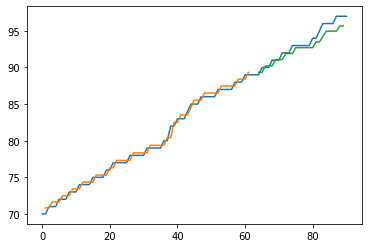

Epoch 1/100
61/61 - 2s - loss: 0.2062 - 2s/epoch - 29ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1394 - 105ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0941 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0643 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0480 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0392 - 108ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0346 - 103ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0316 - 103ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0293 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0269 - 102ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0247 - 105ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0227 - 103ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0201 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0180 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0158 - 104ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0139 - 103ms/epoc

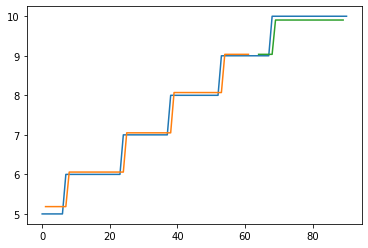

Epoch 1/100
61/61 - 2s - loss: 0.0606 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0413 - 101ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0303 - 104ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0245 - 93ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0204 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0172 - 96ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0142 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0114 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0088 - 104ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0068 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0055 - 101ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0047 - 101ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0043 - 112ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0041 - 105ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0041 - 102ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0041 - 101ms/epoch 

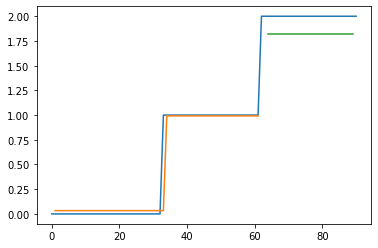

Epoch 1/100
61/61 - 2s - loss: 0.0647 - 2s/epoch - 26ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0371 - 107ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0249 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0198 - 103ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0171 - 102ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0153 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0132 - 108ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0115 - 102ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0097 - 105ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0081 - 104ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0067 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0054 - 107ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0043 - 100ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0034 - 96ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0027 - 90ms/epoch - 1ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0021 - 91ms/epoch -

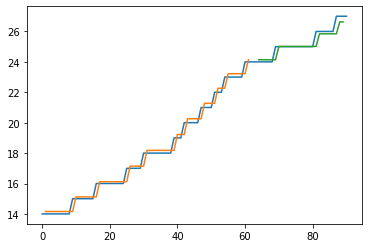

Epoch 1/100
61/61 - 2s - loss: 0.0870 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0485 - 113ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0288 - 102ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0210 - 101ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0176 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0159 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0142 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0128 - 138ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0112 - 118ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0097 - 130ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0085 - 118ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0072 - 123ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0060 - 129ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0050 - 124ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0041 - 117ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0034 - 121ms/epoc

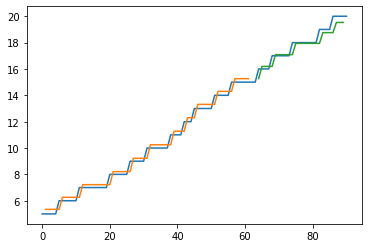

Epoch 1/100
61/61 - 2s - loss: 0.0956 - 2s/epoch - 25ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0681 - 108ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0506 - 103ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0411 - 102ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0361 - 101ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0325 - 102ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0296 - 101ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0264 - 104ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0235 - 101ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0207 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0179 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0153 - 101ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0130 - 104ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0109 - 102ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0092 - 103ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0078 - 101ms/epoc

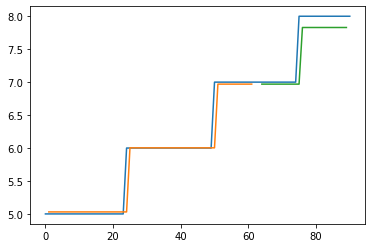

Epoch 1/100
61/61 - 2s - loss: 0.1136 - 2s/epoch - 28ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0717 - 104ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0477 - 101ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0361 - 101ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0301 - 103ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0267 - 103ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0241 - 102ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0222 - 106ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0204 - 103ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0184 - 105ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0166 - 102ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0145 - 102ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0129 - 100ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0113 - 95ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0098 - 90ms/epoch - 1ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0084 - 94ms/epoch -

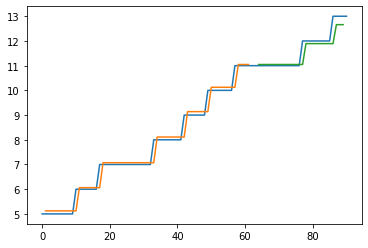

In [2]:
import pandas
import matplotlib.pyplot as plt

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df = pandas.read_csv('CBD poi.csv', engine='python')
for i in range(len(df)):
    dataframe = pandas.read_csv('CBD poi.csv', usecols=[i+1], engine='python')
#         print(dataframe.head())
    for col in dataframe:
        dataframe = dataframe.sort_values(by=[col])
#     print(dataframe.head(10))
    
    # fix random seed for reproducibility
    numpy.random.seed(7)

#     dataframe = dataframe[['poi-1']]
    dataset = dataframe.values
    dataset = dataset.astype('float32')

    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # split into train and test sets
    train_size = int(len(dataset) * 0.70)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)


    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    
        # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

    # rmse = root mean square error
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

#  5 types of LSTM for POI-1 

In [186]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})
df = pd.read_csv('CBD poi.csv',parse_dates=['date'])


In [187]:
df.sort_index(inplace=True)
df = df[['date','poi-1']]
df.head()

date  poi-1
0  2017_08_01     35
1  2017_08_13     40
2  2017_08_17     21
3  2017_08_21     23
4  2017_08_29     39

In [188]:
df[['date']] = df[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[5:7],s[8:], s[0:4]))

print(df)

          date  poi-1
0   08/01/2017     35
1   08/13/2017     40
2   08/17/2017     21
3   08/21/2017     23
4   08/29/2017     39
..         ...    ...
86  09/05/2017     34
87  09/23/2017     41
88  09/25/2017     36
89  10/17/2017     30
90  10/29/2017     41

[91 rows x 2 columns]


In [189]:
f = Forecaster(y=df['poi-1'],
                   current_dates=df['date'].apply(str))
f

Forecaster(
    DateStartActuals=2017-08-01T00:00:00.000000000
    DateEndActuals=2017-10-29T00:00:00.000000000
    Freq=None
    N_actuals=91
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

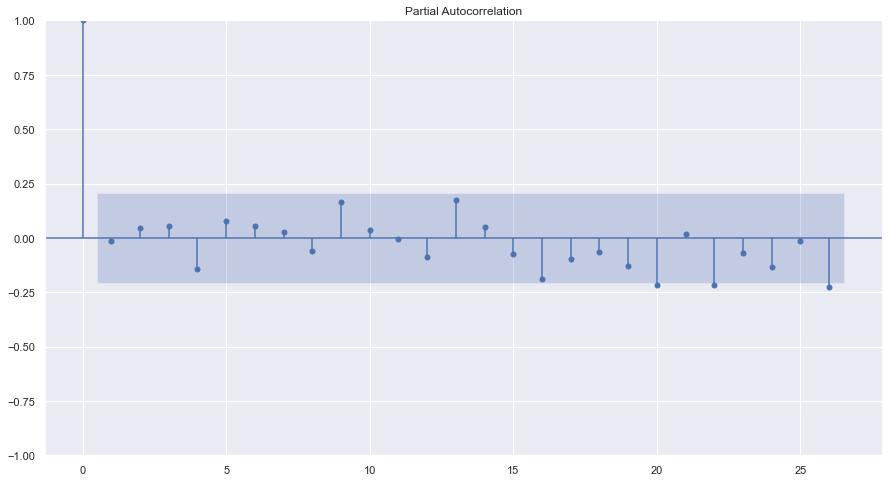

In [190]:
f.plot_pacf(lags=26)
plt.show()

In [200]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-9.472535220928359
4.0698807406060263e-16


In [201]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

3/3 [==============================] - 3s 4ms/step - loss: 0.5463


<AxesSubplot:xlabel='Date', ylabel='Values'>

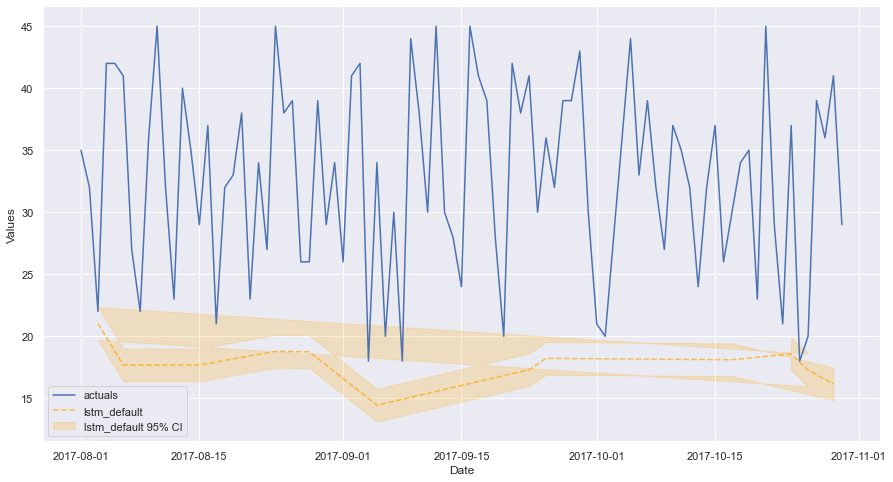

In [202]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

2/2 [==============================] - 2s 10ms/step - loss: 0.5373


<AxesSubplot:xlabel='Date', ylabel='Values'>

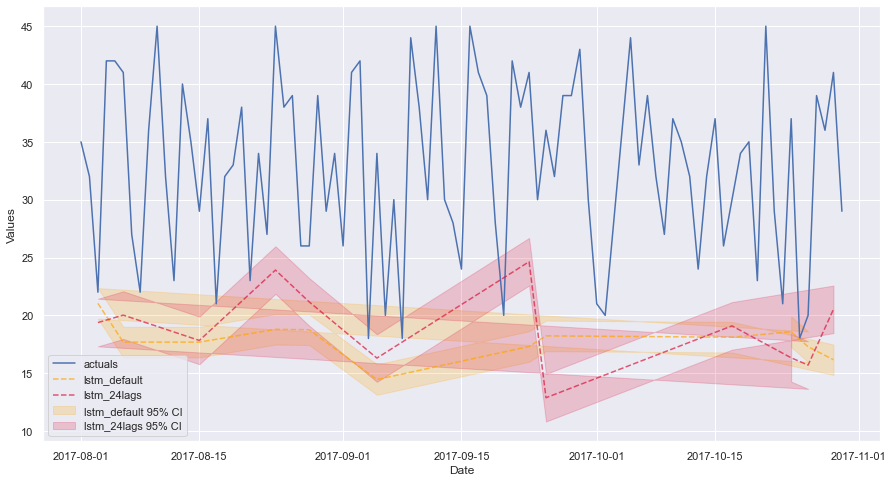

In [203]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
2/2 [==============================] - 3s 612ms/step - loss: 0.5237 - val_loss: 0.6187
Epoch 2/5
2/2 [==============================] - 0s 34ms/step - loss: 0.5175 - val_loss: 0.6123
Epoch 3/5
2/2 [==============================] - 0s 40ms/step - loss: 0.5114 - val_loss: 0.6059
Epoch 4/5
2/2 [==============================] - 0s 41ms/step - loss: 0.5055 - val_loss: 0.5993
Epoch 5/5
2/2 [==============================] - 0s 43ms/step - loss: 0.4996 - val_loss: 0.5930
Epoch 1/5
2/2 [==============================] - 3s 620ms/step - loss: 0.6029 - val_loss: 0.7169
Epoch 2/5
2/2 [==============================] - 0s 34ms/step - loss: 0.5962 - val_loss: 0.7110
Epoch 3/5
2/2 [==============================] - 0s 37ms/step - loss: 0.5898 - val_loss: 0.7052
Epoch 4/5
2/2 [==============================] - 0s 39ms/step - loss: 0.5835 - val_loss: 0.6996
Epoch 5/5
2/2 [==============================] - 0s 38ms/step - loss: 0.5775 - val_loss: 0.6942


<AxesSubplot:xlabel='Date', ylabel='Values'>

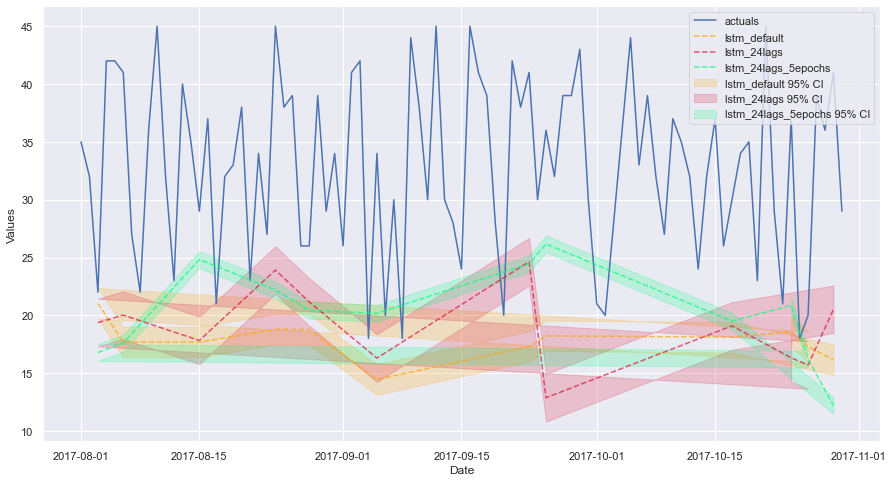

In [204]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
2/2 [==============================] - 7s 1s/step - loss: 0.5514 - val_loss: 0.6422
Epoch 2/25
2/2 [==============================] - 0s 73ms/step - loss: 0.5374 - val_loss: 0.6284
Epoch 3/25
2/2 [==============================] - 0s 67ms/step - loss: 0.5235 - val_loss: 0.6129
Epoch 4/25
2/2 [==============================] - 0s 65ms/step - loss: 0.5090 - val_loss: 0.5947
Epoch 5/25
2/2 [==============================] - 0s 68ms/step - loss: 0.4935 - val_loss: 0.5740
Epoch 6/25
2/2 [==============================] - 0s 55ms/step - loss: 0.4759 - val_loss: 0.5498
Epoch 7/25
2/2 [==============================] - 0s 61ms/step - loss: 0.4556 - val_loss: 0.5207
Epoch 8/25
2/2 [==============================] - 0s 68ms/step - loss: 0.4328 - val_loss: 0.4867
Epoch 9/25
2/2 [==============================] - 0s 67ms/step - loss: 0.4074 - val_loss: 0.4500
Epoch 10/25
2/2 [==============================] - 0s 55ms/step - loss: 0.3833 - val_loss: 0.4128
Epoch 11/25
2/2 [==============

<AxesSubplot:xlabel='Date', ylabel='Values'>

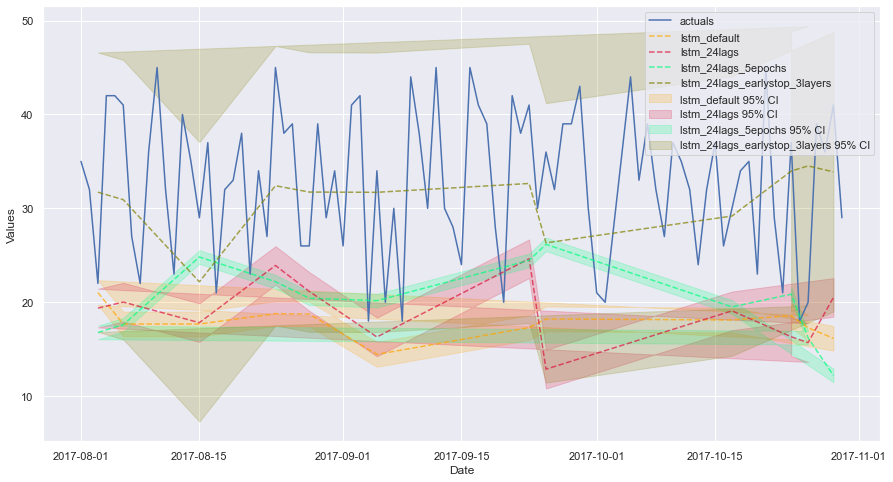

In [205]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5189 - val_loss: 0.6326
Epoch 2/15
1/1 [==============================] - 0s 111ms/step - loss: 0.4918 - val_loss: 0.6093
Epoch 3/15
1/1 [==============================] - 0s 106ms/step - loss: 0.4675 - val_loss: 0.5792
Epoch 4/15
1/1 [==============================] - 0s 101ms/step - loss: 0.4380 - val_loss: 0.5373
Epoch 5/15
1/1 [==============================] - 0s 132ms/step - loss: 0.3989 - val_loss: 0.4767
Epoch 6/15
1/1 [==============================] - 0s 100ms/step - loss: 0.3447 - val_loss: 0.3885
Epoch 7/15
1/1 [==============================] - 0s 100ms/step - loss: 0.3059 - val_loss: 0.3222
Epoch 8/15
1/1 [==============================] - 0s 99ms/step - loss: 0.3071 - val_loss: 0.2954
Epoch 9/15
1/1 [==============================] - 0s 96ms/step - loss: 0.2822 - val_loss: 0.2952
Epoch 10/15
1/1 [==============================] - 0s 94ms/step - loss: 0.2464 - val_loss: 0.3083
Epoch 11/15
1/1 [======

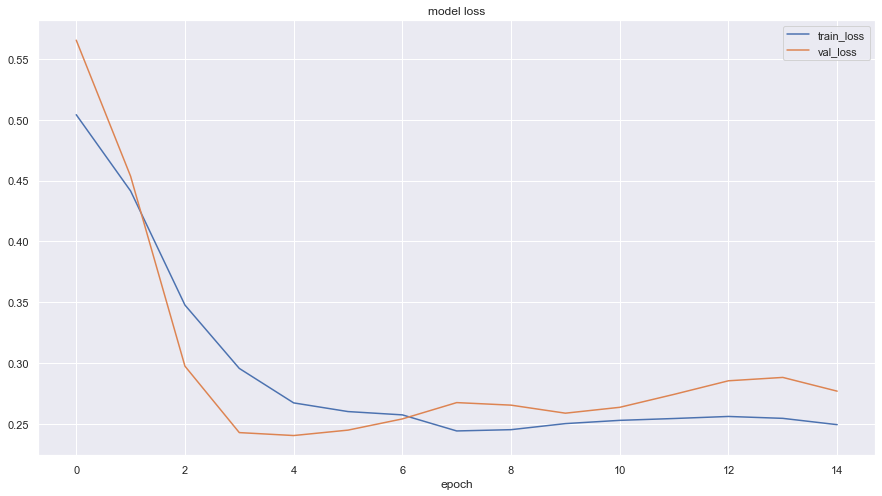

<AxesSubplot:xlabel='Date', ylabel='Values'>

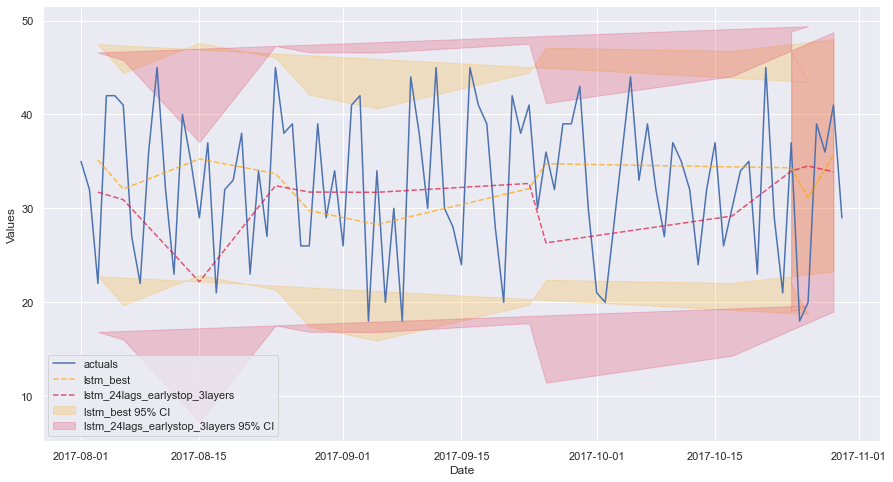

In [206]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [207]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  \
0                      lstm_best          0.229459          7.779307   
1  lstm_24lags_earlystop_3layers          0.247632          8.533149   
2            lstm_24lags_5epochs          0.369461         15.595984   
3                    lstm_24lags          0.405841         16.176019   
4                   lstm_default          0.428867         17.740436   

   LevelTestSetR2  best_model  
0       -0.004442        True  
1       -0.208541       False  
2       -3.037090       False  
3       -3.342964       False  
4       -4.223619       False

# LSTM neural network for all POI's 

Epoch 1/15
1/1 [==============================] - 20s 20s/step - loss: 0.5014 - val_loss: 0.6129
Epoch 2/15
1/1 [==============================] - 0s 331ms/step - loss: 0.4711 - val_loss: 0.5752
Epoch 3/15
1/1 [==============================] - 0s 300ms/step - loss: 0.4351 - val_loss: 0.5232
Epoch 4/15
1/1 [==============================] - 0s 283ms/step - loss: 0.3887 - val_loss: 0.4460
Epoch 5/15
1/1 [==============================] - 0s 289ms/step - loss: 0.3229 - val_loss: 0.3468
Epoch 6/15
1/1 [==============================] - 0s 287ms/step - loss: 0.2715 - val_loss: 0.2820
Epoch 7/15
1/1 [==============================] - 0s 288ms/step - loss: 0.2917 - val_loss: 0.2612
Epoch 8/15
1/1 [==============================] - 0s 290ms/step - loss: 0.2663 - val_loss: 0.2630
Epoch 9/15
1/1 [==============================] - 0s 288ms/step - loss: 0.2292 - val_loss: 0.2882
Epoch 10/15
1/1 [==============================] - 0s 417ms/step - loss: 0.2161 - val_loss: 0.3090
Epoch 11/15
1/1 [===

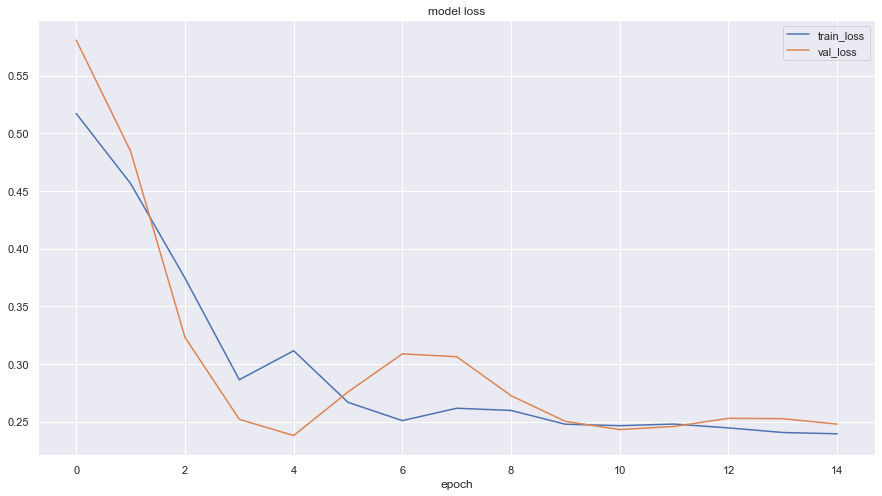

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.5354 - val_loss: 0.4385
Epoch 2/15
1/1 [==============================] - 0s 192ms/step - loss: 0.5143 - val_loss: 0.4179
Epoch 3/15
1/1 [==============================] - 0s 193ms/step - loss: 0.4932 - val_loss: 0.3897
Epoch 4/15
1/1 [==============================] - 0s 194ms/step - loss: 0.4654 - val_loss: 0.3529
Epoch 5/15
1/1 [==============================] - 0s 182ms/step - loss: 0.4251 - val_loss: 0.3077
Epoch 6/15
1/1 [==============================] - 0s 183ms/step - loss: 0.3680 - val_loss: 0.2920
Epoch 7/15
1/1 [==============================] - 0s 200ms/step - loss: 0.3304 - val_loss: 0.3240
Epoch 8/15
1/1 [==============================] - 0s 195ms/step - loss: 0.3346 - val_loss: 0.3325
Epoch 9/15
1/1 [==============================] - 0s 266ms/step - loss: 0.3265 - val_loss: 0.3202
Epoch 10/15
1/1 [==============================] - 0s 212ms/step - loss: 0.3072 - val_loss: 0.3041
Epoch 11/15
1/1 [===

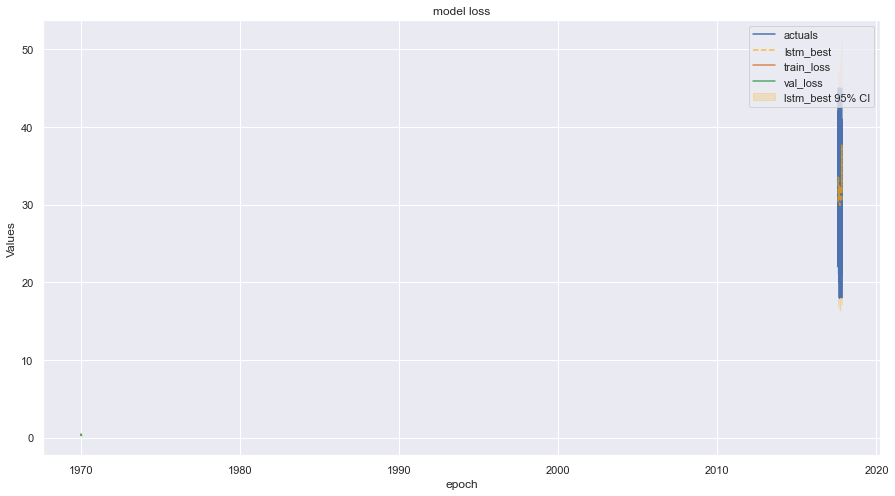

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5733 - val_loss: 0.5657
Epoch 2/15
1/1 [==============================] - 0s 232ms/step - loss: 0.5513 - val_loss: 0.5442
Epoch 3/15
1/1 [==============================] - 0s 234ms/step - loss: 0.5280 - val_loss: 0.5179
Epoch 4/15
1/1 [==============================] - 0s 222ms/step - loss: 0.4957 - val_loss: 0.4834
Epoch 5/15
1/1 [==============================] - 0s 227ms/step - loss: 0.4475 - val_loss: 0.4308
Epoch 6/15
1/1 [==============================] - 0s 222ms/step - loss: 0.3853 - val_loss: 0.3742
Epoch 7/15
1/1 [==============================] - 0s 233ms/step - loss: 0.3309 - val_loss: 0.3537
Epoch 8/15
1/1 [==============================] - 0s 223ms/step - loss: 0.2901 - val_loss: 0.3641
Epoch 9/15
1/1 [==============================] - 0s 241ms/step - loss: 0.2922 - val_loss: 0.3952
Epoch 10/15
1/1 [==============================] - 0s 260ms/step - loss: 0.3033 - val_loss: 0.4019
Epoch 11/15
1/1 [===

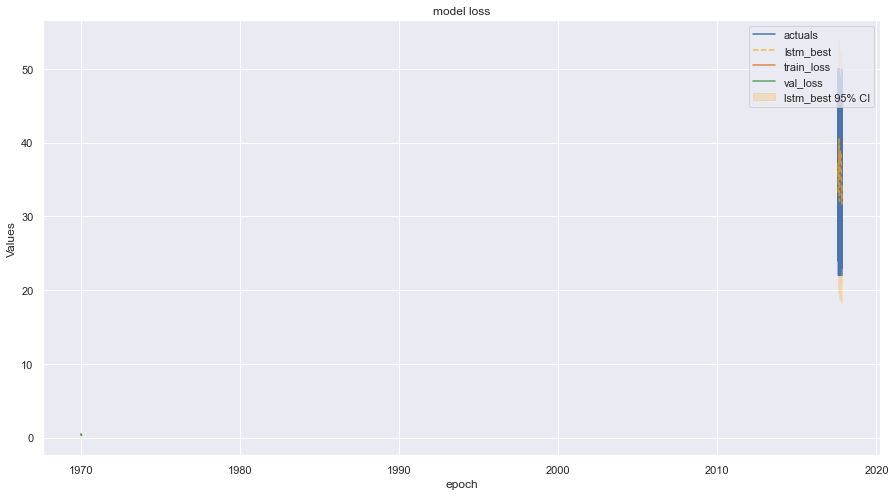

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5320 - val_loss: 0.5794
Epoch 2/15
1/1 [==============================] - 0s 207ms/step - loss: 0.5112 - val_loss: 0.5593
Epoch 3/15
1/1 [==============================] - 0s 227ms/step - loss: 0.4851 - val_loss: 0.5276
Epoch 4/15
1/1 [==============================] - 0s 214ms/step - loss: 0.4507 - val_loss: 0.4786
Epoch 5/15
1/1 [==============================] - 0s 223ms/step - loss: 0.4038 - val_loss: 0.4143
Epoch 6/15
1/1 [==============================] - 0s 221ms/step - loss: 0.3517 - val_loss: 0.3414
Epoch 7/15
1/1 [==============================] - 0s 219ms/step - loss: 0.3257 - val_loss: 0.3101
Epoch 8/15
1/1 [==============================] - 0s 214ms/step - loss: 0.3260 - val_loss: 0.2895
Epoch 9/15
1/1 [==============================] - 0s 221ms/step - loss: 0.3094 - val_loss: 0.2829
Epoch 10/15
1/1 [==============================] - 0s 225ms/step - loss: 0.2892 - val_loss: 0.2824
Epoch 11/15
1/1 [===

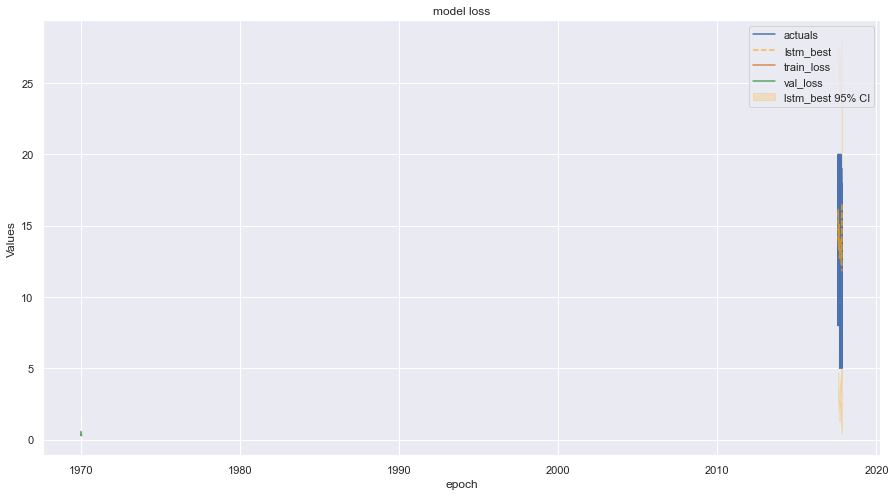

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.6207 - val_loss: 0.5706
Epoch 2/15
1/1 [==============================] - 0s 236ms/step - loss: 0.5951 - val_loss: 0.5454
Epoch 3/15
1/1 [==============================] - 0s 204ms/step - loss: 0.5682 - val_loss: 0.5163
Epoch 4/15
1/1 [==============================] - 0s 196ms/step - loss: 0.5299 - val_loss: 0.4736
Epoch 5/15
1/1 [==============================] - 0s 204ms/step - loss: 0.4688 - val_loss: 0.4126
Epoch 6/15
1/1 [==============================] - 0s 198ms/step - loss: 0.3844 - val_loss: 0.3294
Epoch 7/15
1/1 [==============================] - 0s 192ms/step - loss: 0.3035 - val_loss: 0.3078
Epoch 8/15
1/1 [==============================] - 0s 189ms/step - loss: 0.3120 - val_loss: 0.3162
Epoch 9/15
1/1 [==============================] - 0s 194ms/step - loss: 0.3113 - val_loss: 0.2849
Epoch 10/15
1/1 [==============================] - 0s 189ms/step - loss: 0.2718 - val_loss: 0.2610
Epoch 11/15
1/1 [=====

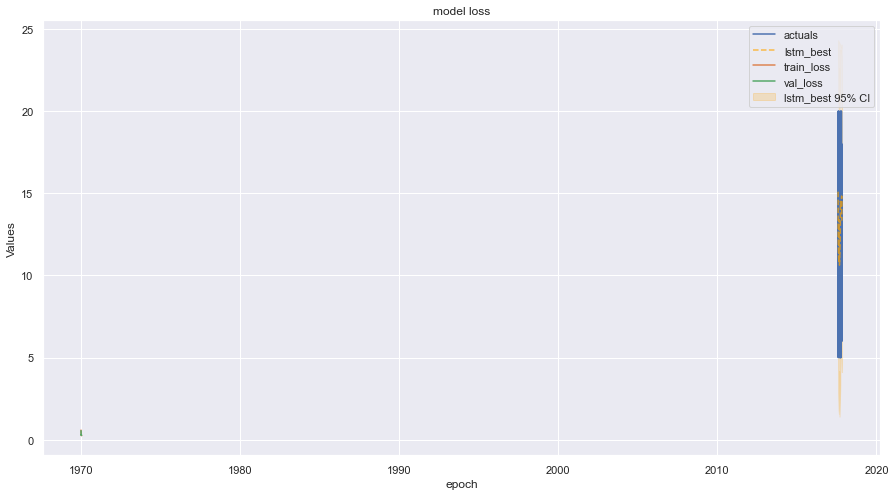

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.4655 - val_loss: 0.4982
Epoch 2/15
1/1 [==============================] - 0s 205ms/step - loss: 0.4400 - val_loss: 0.4653
Epoch 3/15
1/1 [==============================] - 0s 210ms/step - loss: 0.4119 - val_loss: 0.4173
Epoch 4/15
1/1 [==============================] - 0s 196ms/step - loss: 0.3753 - val_loss: 0.3467
Epoch 5/15
1/1 [==============================] - 0s 196ms/step - loss: 0.3269 - val_loss: 0.2713
Epoch 6/15
1/1 [==============================] - 0s 199ms/step - loss: 0.2966 - val_loss: 0.2376
Epoch 7/15
1/1 [==============================] - 0s 195ms/step - loss: 0.2974 - val_loss: 0.2440
Epoch 8/15
1/1 [==============================] - 0s 198ms/step - loss: 0.3043 - val_loss: 0.2502
Epoch 9/15
1/1 [==============================] - 0s 228ms/step - loss: 0.2949 - val_loss: 0.2602
Epoch 10/15
1/1 [==============================] - 0s 228ms/step - loss: 0.2855 - val_loss: 0.2823
Epoch 11/15
1/1 [=====

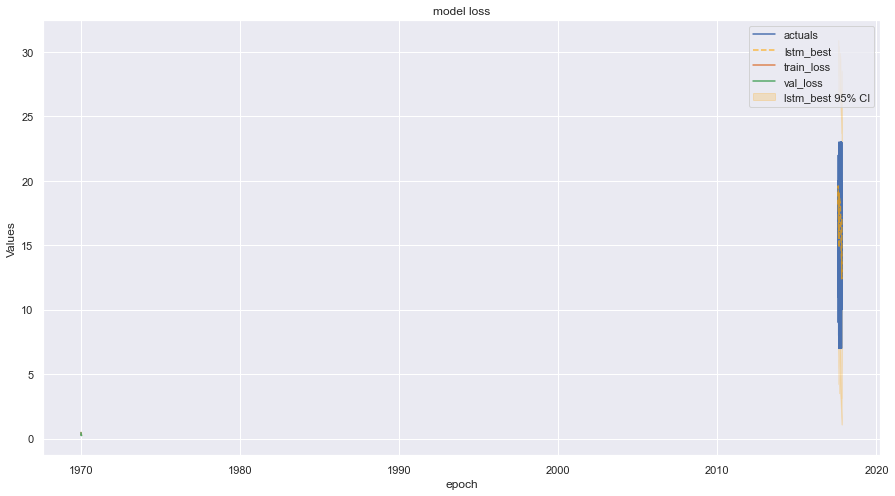

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4609 - val_loss: 0.4784
Epoch 2/15
1/1 [==============================] - 0s 268ms/step - loss: 0.4614 - val_loss: 0.4769
Epoch 3/15
1/1 [==============================] - 0s 270ms/step - loss: 0.4606 - val_loss: 0.4774
Epoch 4/15
1/1 [==============================] - 0s 317ms/step - loss: 0.4606 - val_loss: 0.4767
Epoch 5/15
1/1 [==============================] - 0s 286ms/step - loss: 0.4599 - val_loss: 0.4771
Epoch 6/15
1/1 [==============================] - 0s 289ms/step - loss: 0.4600 - val_loss: 0.4783
Epoch 7/15
1/1 [==============================] - 0s 275ms/step - loss: 0.4607 - val_loss: 0.4778
Epoch 8/15
1/1 [==============================] - 0s 260ms/step - loss: 0.4600 - val_loss: 0.4775
Epoch 9/15
1/1 [==============================] - 0s 265ms/step - loss: 0.4600 - val_loss: 0.4774
Epoch 10/15
1/1 [==============================] - 0s 262ms/step - loss: 0.4599 - val_loss: 0.4777
Epoch 11/15
1/1 [===

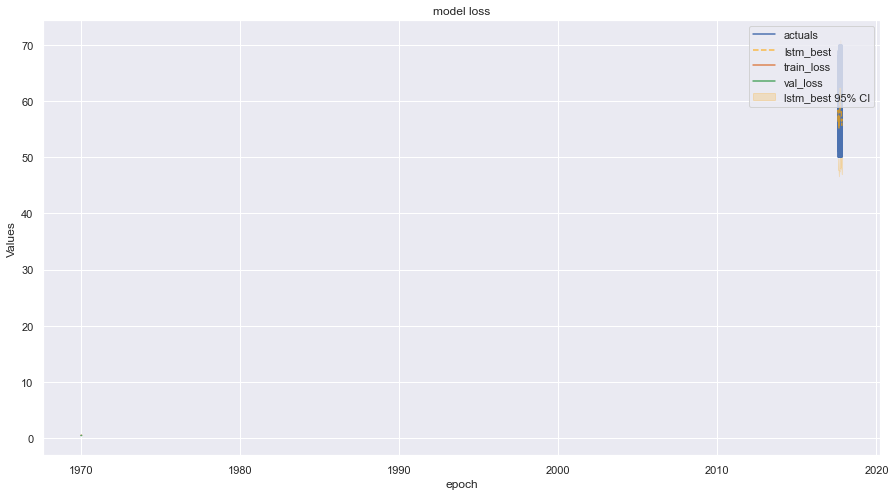

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4210 - val_loss: 0.4261
Epoch 2/15
1/1 [==============================] - 0s 328ms/step - loss: 0.4103 - val_loss: 0.4129
Epoch 3/15
1/1 [==============================] - 0s 329ms/step - loss: 0.3994 - val_loss: 0.3939
Epoch 4/15
1/1 [==============================] - 0s 324ms/step - loss: 0.3829 - val_loss: 0.3692
Epoch 5/15
1/1 [==============================] - 0s 306ms/step - loss: 0.3592 - val_loss: 0.3478
Epoch 6/15
1/1 [==============================] - 0s 343ms/step - loss: 0.3382 - val_loss: 0.3448
Epoch 7/15
1/1 [==============================] - 0s 340ms/step - loss: 0.3322 - val_loss: 0.3465
Epoch 8/15
1/1 [==============================] - 0s 324ms/step - loss: 0.3346 - val_loss: 0.3414
Epoch 9/15
1/1 [==============================] - 0s 295ms/step - loss: 0.3275 - val_loss: 0.3352
Epoch 10/15
1/1 [==============================] - 0s 261ms/step - loss: 0.3181 - val_loss: 0.3364
Epoch 11/15
1/1 [===

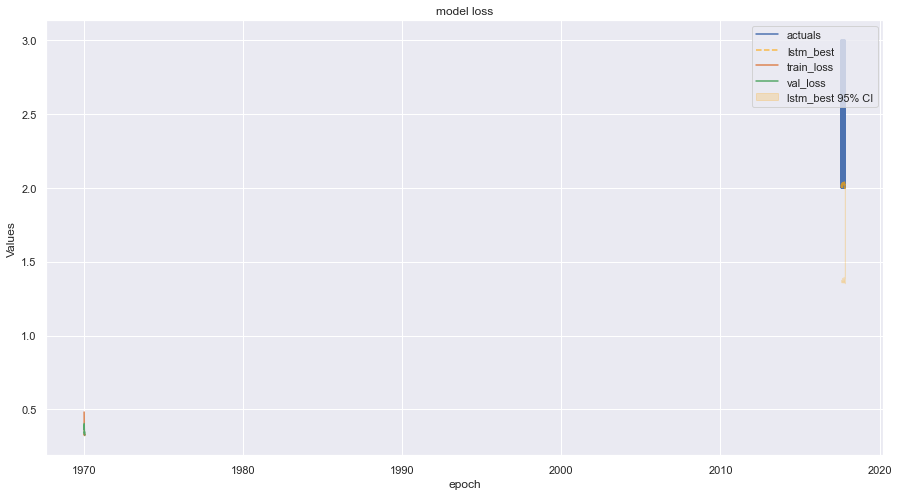

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.3384 - val_loss: 0.4341
Epoch 2/15
1/1 [==============================] - 0s 332ms/step - loss: 0.3277 - val_loss: 0.4274
Epoch 3/15
1/1 [==============================] - 0s 335ms/step - loss: 0.3202 - val_loss: 0.4173
Epoch 4/15
1/1 [==============================] - 0s 336ms/step - loss: 0.3087 - val_loss: 0.4018
Epoch 5/15
1/1 [==============================] - 0s 458ms/step - loss: 0.2912 - val_loss: 0.3792
Epoch 6/15
1/1 [==============================] - 0s 374ms/step - loss: 0.2698 - val_loss: 0.3664
Epoch 7/15
1/1 [==============================] - 0s 397ms/step - loss: 0.2682 - val_loss: 0.3716
Epoch 8/15
1/1 [==============================] - 0s 427ms/step - loss: 0.2810 - val_loss: 0.3742
Epoch 9/15
1/1 [==============================] - 0s 341ms/step - loss: 0.2706 - val_loss: 0.3717
Epoch 10/15
1/1 [==============================] - 0s 319ms/step - loss: 0.2604 - val_loss: 0.3709
Epoch 11/15
1/1 [===

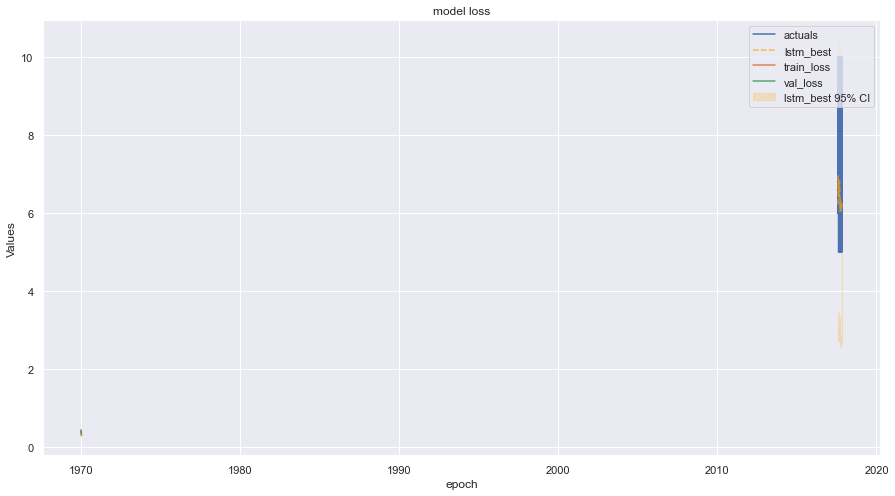

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5233 - val_loss: 0.6037
Epoch 2/15
1/1 [==============================] - 0s 299ms/step - loss: 0.4946 - val_loss: 0.5622
Epoch 3/15
1/1 [==============================] - 0s 302ms/step - loss: 0.4541 - val_loss: 0.5043
Epoch 4/15
1/1 [==============================] - 0s 302ms/step - loss: 0.3961 - val_loss: 0.4323
Epoch 5/15
1/1 [==============================] - 0s 352ms/step - loss: 0.3284 - val_loss: 0.3564
Epoch 6/15
1/1 [==============================] - 0s 322ms/step - loss: 0.2881 - val_loss: 0.3177
Epoch 7/15
1/1 [==============================] - 0s 311ms/step - loss: 0.2904 - val_loss: 0.2978
Epoch 8/15
1/1 [==============================] - 0s 292ms/step - loss: 0.2731 - val_loss: 0.2986
Epoch 9/15
1/1 [==============================] - 0s 308ms/step - loss: 0.2476 - val_loss: 0.3194
Epoch 10/15
1/1 [==============================] - 0s 300ms/step - loss: 0.2388 - val_loss: 0.3409
Epoch 11/15
1/1 [===

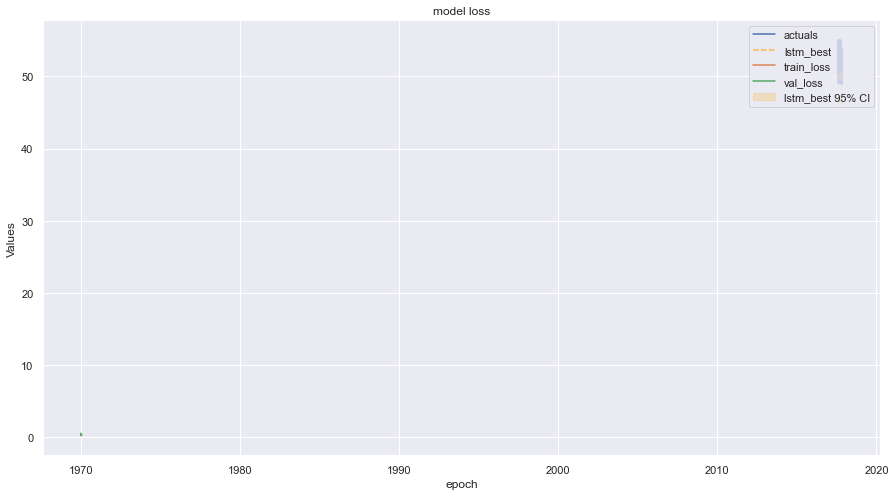

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5418 - val_loss: 0.4351
Epoch 2/15
1/1 [==============================] - 0s 280ms/step - loss: 0.5198 - val_loss: 0.4076
Epoch 3/15
1/1 [==============================] - 0s 280ms/step - loss: 0.4959 - val_loss: 0.3777
Epoch 4/15
1/1 [==============================] - 0s 276ms/step - loss: 0.4655 - val_loss: 0.3519
Epoch 5/15
1/1 [==============================] - 0s 283ms/step - loss: 0.4266 - val_loss: 0.3293
Epoch 6/15
1/1 [==============================] - 0s 274ms/step - loss: 0.3736 - val_loss: 0.3354
Epoch 7/15
1/1 [==============================] - 0s 273ms/step - loss: 0.3259 - val_loss: 0.3676
Epoch 8/15
1/1 [==============================] - 0s 277ms/step - loss: 0.3328 - val_loss: 0.3772
Epoch 9/15
1/1 [==============================] - 0s 274ms/step - loss: 0.3350 - val_loss: 0.3578
Epoch 10/15
1/1 [==============================] - 0s 326ms/step - loss: 0.3182 - val_loss: 0.3327
Epoch 11/15
1/1 [===

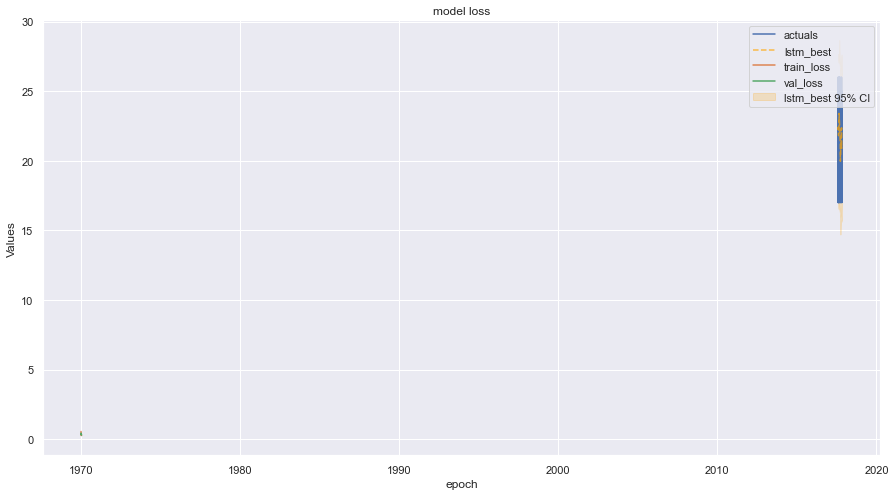

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5101 - val_loss: 0.5086
Epoch 2/15
1/1 [==============================] - 0s 357ms/step - loss: 0.4910 - val_loss: 0.4868
Epoch 3/15
1/1 [==============================] - 0s 431ms/step - loss: 0.4700 - val_loss: 0.4544
Epoch 4/15
1/1 [==============================] - 0s 412ms/step - loss: 0.4401 - val_loss: 0.4024
Epoch 5/15
1/1 [==============================] - 0s 380ms/step - loss: 0.3954 - val_loss: 0.3308
Epoch 6/15
1/1 [==============================] - 0s 366ms/step - loss: 0.3428 - val_loss: 0.2703
Epoch 7/15
1/1 [==============================] - 0s 360ms/step - loss: 0.3065 - val_loss: 0.2794
Epoch 8/15
1/1 [==============================] - 0s 316ms/step - loss: 0.3228 - val_loss: 0.2753
Epoch 9/15
1/1 [==============================] - 0s 306ms/step - loss: 0.3173 - val_loss: 0.2408
Epoch 10/15
1/1 [==============================] - 0s 311ms/step - loss: 0.2886 - val_loss: 0.2154
Epoch 11/15
1/1 [===

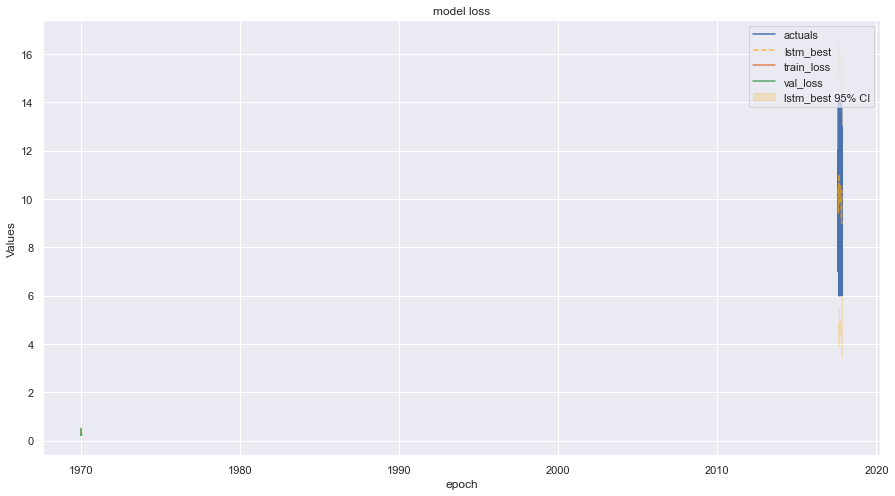

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4811 - val_loss: 0.4802
Epoch 2/15
1/1 [==============================] - 0s 405ms/step - loss: 0.4623 - val_loss: 0.4544
Epoch 3/15
1/1 [==============================] - 0s 416ms/step - loss: 0.4436 - val_loss: 0.4165
Epoch 4/15
1/1 [==============================] - 0s 469ms/step - loss: 0.4190 - val_loss: 0.3571
Epoch 5/15
1/1 [==============================] - 0s 427ms/step - loss: 0.3865 - val_loss: 0.2830
Epoch 6/15
1/1 [==============================] - 0s 401ms/step - loss: 0.3421 - val_loss: 0.2474
Epoch 7/15
1/1 [==============================] - 0s 400ms/step - loss: 0.3074 - val_loss: 0.2998
Epoch 8/15
1/1 [==============================] - 0s 372ms/step - loss: 0.3323 - val_loss: 0.3014
Epoch 9/15
1/1 [==============================] - 0s 385ms/step - loss: 0.3280 - val_loss: 0.2833
Epoch 10/15
1/1 [==============================] - 0s 383ms/step - loss: 0.3069 - val_loss: 0.2619
Epoch 11/15
1/1 [===

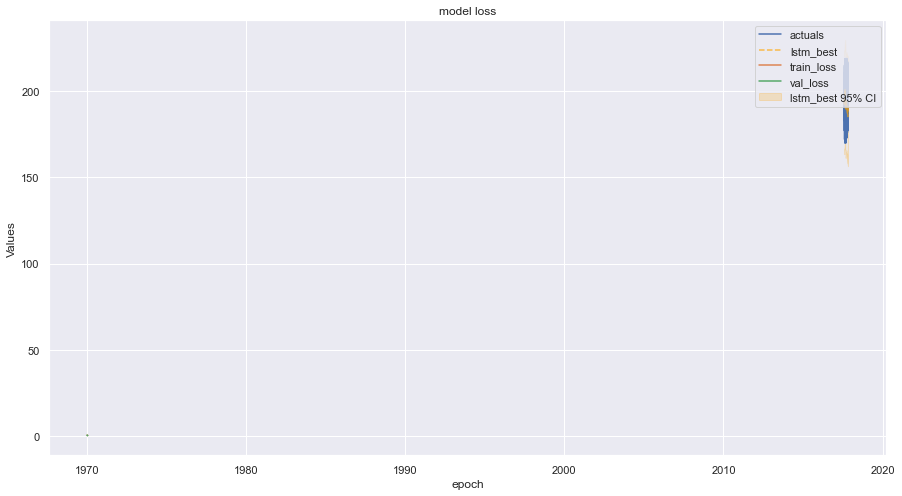

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4221 - val_loss: 0.3791
Epoch 2/15
1/1 [==============================] - 0s 431ms/step - loss: 0.4062 - val_loss: 0.3621
Epoch 3/15
1/1 [==============================] - 1s 510ms/step - loss: 0.3901 - val_loss: 0.3432
Epoch 4/15
1/1 [==============================] - 1s 533ms/step - loss: 0.3688 - val_loss: 0.3195
Epoch 5/15
1/1 [==============================] - 1s 515ms/step - loss: 0.3447 - val_loss: 0.2927
Epoch 6/15
1/1 [==============================] - 0s 453ms/step - loss: 0.3230 - val_loss: 0.2843
Epoch 7/15
1/1 [==============================] - 0s 414ms/step - loss: 0.3074 - val_loss: 0.3098
Epoch 8/15
1/1 [==============================] - 0s 430ms/step - loss: 0.3077 - val_loss: 0.3012
Epoch 9/15
1/1 [==============================] - 0s 414ms/step - loss: 0.2944 - val_loss: 0.2806
Epoch 10/15
1/1 [==============================] - 0s 421ms/step - loss: 0.2736 - val_loss: 0.2798
Epoch 11/15
1/1 [===

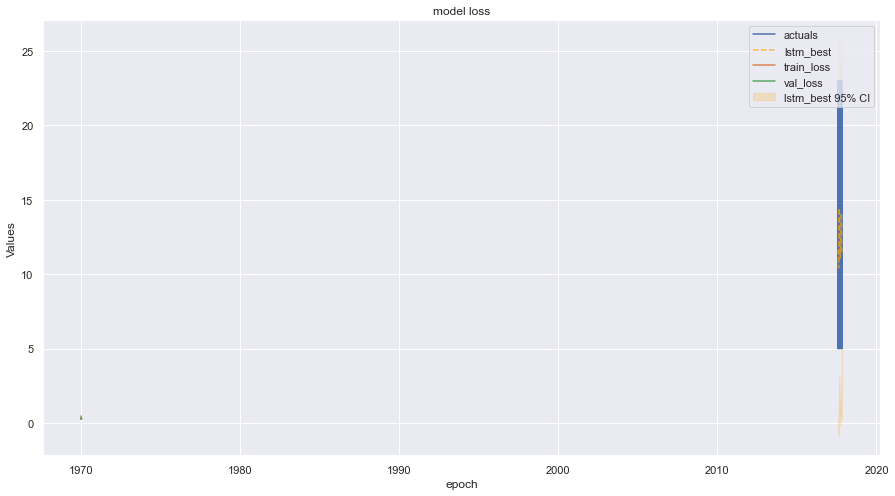

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5002 - val_loss: 0.3922
Epoch 2/15
1/1 [==============================] - 0s 396ms/step - loss: 0.4784 - val_loss: 0.3685
Epoch 3/15
1/1 [==============================] - 0s 397ms/step - loss: 0.4524 - val_loss: 0.3345
Epoch 4/15
1/1 [==============================] - 0s 376ms/step - loss: 0.4168 - val_loss: 0.2945
Epoch 5/15
1/1 [==============================] - 0s 385ms/step - loss: 0.3698 - val_loss: 0.2636
Epoch 6/15
1/1 [==============================] - 0s 379ms/step - loss: 0.3220 - val_loss: 0.2653
Epoch 7/15
1/1 [==============================] - 0s 393ms/step - loss: 0.2994 - val_loss: 0.2998
Epoch 8/15
1/1 [==============================] - 0s 370ms/step - loss: 0.3135 - val_loss: 0.3183
Epoch 9/15
1/1 [==============================] - 0s 382ms/step - loss: 0.3228 - val_loss: 0.3092
Epoch 10/15
1/1 [==============================] - 0s 382ms/step - loss: 0.3157 - val_loss: 0.2862
Epoch 11/15
1/1 [===

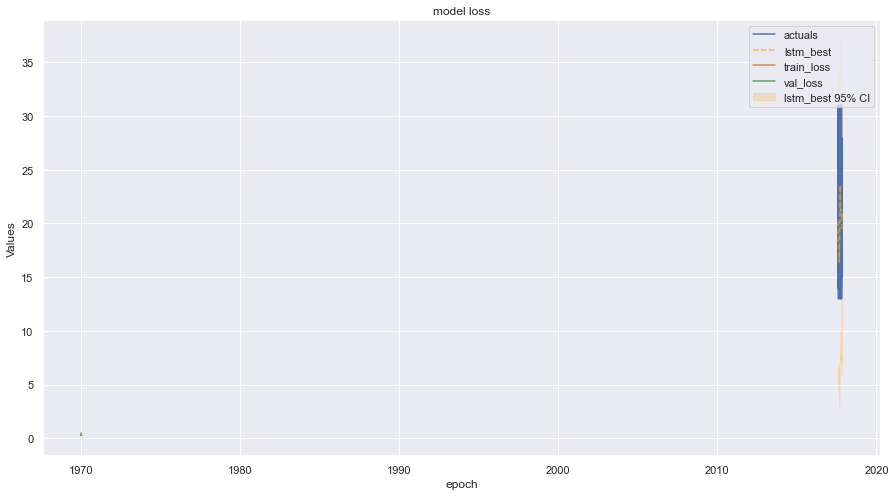

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5431 - val_loss: 0.5138
Epoch 2/15
1/1 [==============================] - 0s 422ms/step - loss: 0.5160 - val_loss: 0.4837
Epoch 3/15
1/1 [==============================] - 0s 388ms/step - loss: 0.4842 - val_loss: 0.4441
Epoch 4/15
1/1 [==============================] - 0s 395ms/step - loss: 0.4393 - val_loss: 0.3874
Epoch 5/15
1/1 [==============================] - 0s 470ms/step - loss: 0.3728 - val_loss: 0.3183
Epoch 6/15
1/1 [==============================] - 0s 500ms/step - loss: 0.2968 - val_loss: 0.2602
Epoch 7/15
1/1 [==============================] - 1s 556ms/step - loss: 0.2586 - val_loss: 0.2879
Epoch 8/15
1/1 [==============================] - 1s 519ms/step - loss: 0.2762 - val_loss: 0.2934
Epoch 9/15
1/1 [==============================] - 0s 454ms/step - loss: 0.2803 - val_loss: 0.2709
Epoch 10/15
1/1 [==============================] - 1s 543ms/step - loss: 0.2554 - val_loss: 0.2581
Epoch 11/15
1/1 [===

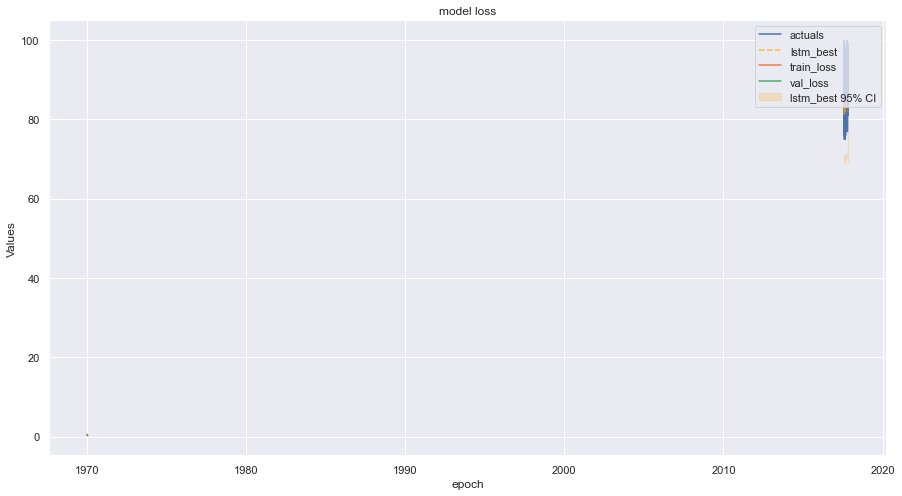

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4284 - val_loss: 0.4705
Epoch 2/15
1/1 [==============================] - 1s 562ms/step - loss: 0.4062 - val_loss: 0.4406
Epoch 3/15
1/1 [==============================] - 1s 520ms/step - loss: 0.3829 - val_loss: 0.3980
Epoch 4/15
1/1 [==============================] - 1s 508ms/step - loss: 0.3492 - val_loss: 0.3371
Epoch 5/15
1/1 [==============================] - 1s 585ms/step - loss: 0.3013 - val_loss: 0.2581
Epoch 6/15
1/1 [==============================] - 1s 548ms/step - loss: 0.2509 - val_loss: 0.2184
Epoch 7/15
1/1 [==============================] - 1s 615ms/step - loss: 0.2533 - val_loss: 0.2207
Epoch 8/15
1/1 [==============================] - 1s 593ms/step - loss: 0.2624 - val_loss: 0.2061
Epoch 9/15
1/1 [==============================] - 1s 569ms/step - loss: 0.2424 - val_loss: 0.2047
Epoch 10/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2171 - val_loss: 0.2295
Epoch 11/15
1/1 [===

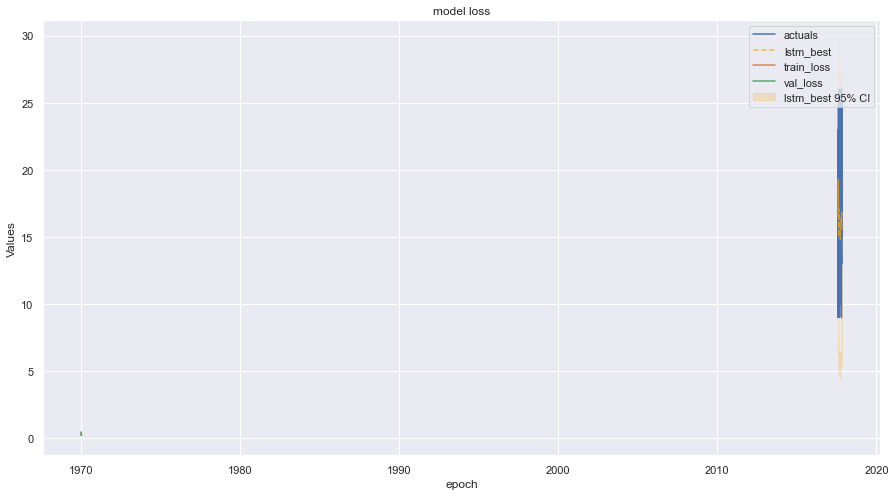

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.5051 - val_loss: 0.4765
Epoch 2/15
1/1 [==============================] - 1s 528ms/step - loss: 0.4897 - val_loss: 0.4559
Epoch 3/15
1/1 [==============================] - 1s 513ms/step - loss: 0.4726 - val_loss: 0.4291
Epoch 4/15
1/1 [==============================] - 0s 471ms/step - loss: 0.4474 - val_loss: 0.3932
Epoch 5/15
1/1 [==============================] - 0s 462ms/step - loss: 0.4090 - val_loss: 0.3600
Epoch 6/15
1/1 [==============================] - 0s 467ms/step - loss: 0.3529 - val_loss: 0.3594
Epoch 7/15
1/1 [==============================] - 0s 472ms/step - loss: 0.3109 - val_loss: 0.3869
Epoch 8/15
1/1 [==============================] - 0s 481ms/step - loss: 0.3200 - val_loss: 0.3578
Epoch 9/15
1/1 [==============================] - 0s 463ms/step - loss: 0.2855 - val_loss: 0.3194
Epoch 10/15
1/1 [==============================] - 0s 470ms/step - loss: 0.2466 - val_loss: 0.2933
Epoch 11/15
1/1 [===

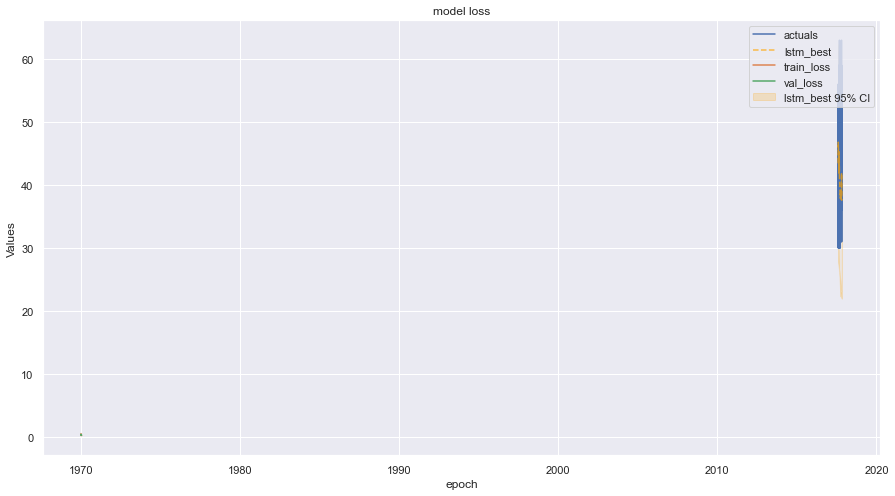

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4967 - val_loss: 0.5742
Epoch 2/15
1/1 [==============================] - 0s 478ms/step - loss: 0.4705 - val_loss: 0.5368
Epoch 3/15
1/1 [==============================] - 0s 461ms/step - loss: 0.4354 - val_loss: 0.4788
Epoch 4/15
1/1 [==============================] - 0s 455ms/step - loss: 0.3859 - val_loss: 0.3976
Epoch 5/15
1/1 [==============================] - 0s 447ms/step - loss: 0.3219 - val_loss: 0.3250
Epoch 6/15
1/1 [==============================] - 0s 450ms/step - loss: 0.2787 - val_loss: 0.3015
Epoch 7/15
1/1 [==============================] - 0s 496ms/step - loss: 0.2760 - val_loss: 0.2843
Epoch 8/15
1/1 [==============================] - 0s 499ms/step - loss: 0.2602 - val_loss: 0.2680
Epoch 9/15
1/1 [==============================] - 0s 474ms/step - loss: 0.2400 - val_loss: 0.2680
Epoch 10/15
1/1 [==============================] - 0s 448ms/step - loss: 0.2285 - val_loss: 0.2943
Epoch 11/15
1/1 [===

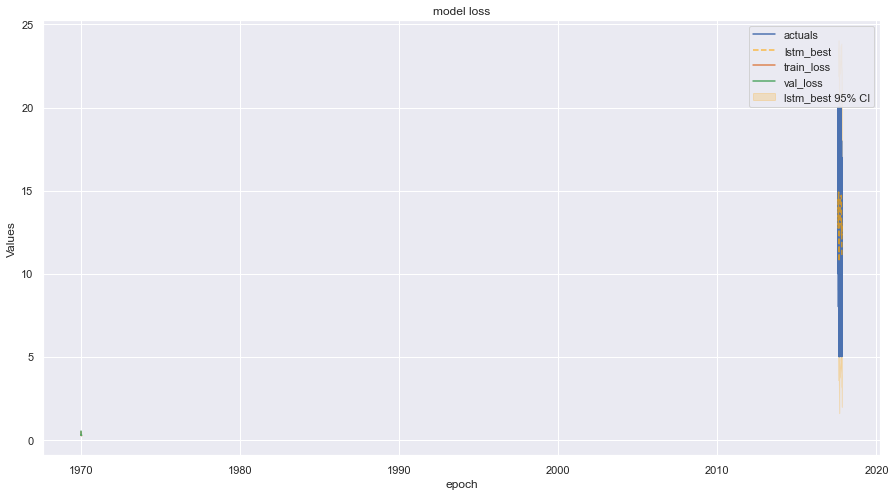

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5188 - val_loss: 0.3532
Epoch 2/15
1/1 [==============================] - 0s 421ms/step - loss: 0.4964 - val_loss: 0.3285
Epoch 3/15
1/1 [==============================] - 0s 494ms/step - loss: 0.4697 - val_loss: 0.2961
Epoch 4/15
1/1 [==============================] - 0s 432ms/step - loss: 0.4306 - val_loss: 0.2656
Epoch 5/15
1/1 [==============================] - 0s 409ms/step - loss: 0.3790 - val_loss: 0.2713
Epoch 6/15
1/1 [==============================] - 0s 388ms/step - loss: 0.3243 - val_loss: 0.3271
Epoch 7/15
1/1 [==============================] - 0s 387ms/step - loss: 0.3058 - val_loss: 0.3807
Epoch 8/15
1/1 [==============================] - 0s 397ms/step - loss: 0.3087 - val_loss: 0.3854
Epoch 9/15
1/1 [==============================] - 0s 397ms/step - loss: 0.2953 - val_loss: 0.3615
Epoch 10/15
1/1 [==============================] - 0s 415ms/step - loss: 0.2746 - val_loss: 0.3297
Epoch 11/15
1/1 [===

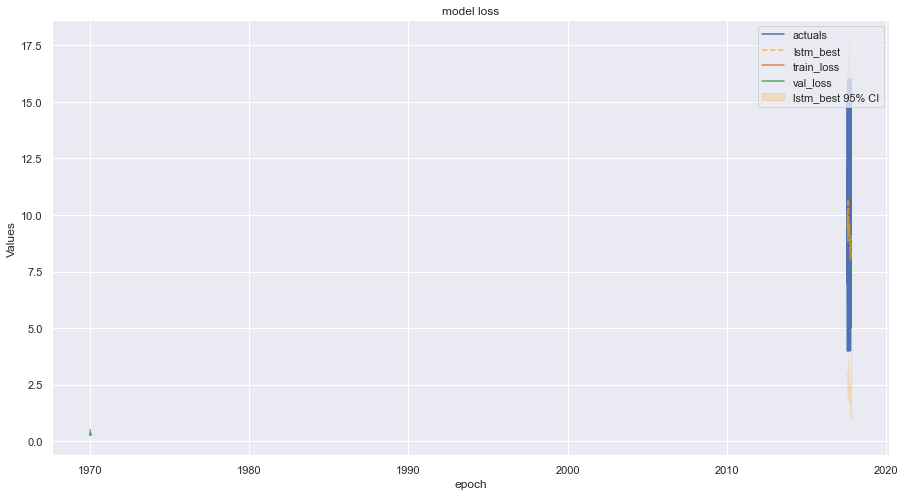

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.4009 - val_loss: 0.5637
Epoch 2/15
1/1 [==============================] - 0s 499ms/step - loss: 0.3957 - val_loss: 0.5569
Epoch 3/15
1/1 [==============================] - 1s 501ms/step - loss: 0.3940 - val_loss: 0.5569
Epoch 4/15
1/1 [==============================] - 0s 438ms/step - loss: 0.3942 - val_loss: 0.5577
Epoch 5/15
1/1 [==============================] - 0s 395ms/step - loss: 0.3939 - val_loss: 0.5597
Epoch 6/15
1/1 [==============================] - 0s 393ms/step - loss: 0.3938 - val_loss: 0.5612
Epoch 7/15
1/1 [==============================] - 0s 404ms/step - loss: 0.3940 - val_loss: 0.5603
Epoch 8/15
1/1 [==============================] - 0s 386ms/step - loss: 0.3927 - val_loss: 0.5595
Epoch 9/15
1/1 [==============================] - 0s 383ms/step - loss: 0.3919 - val_loss: 0.5594
Epoch 10/15
1/1 [==============================] - 0s 374ms/step - loss: 0.3918 - val_loss: 0.5593
Epoch 11/15
1/1 [=====

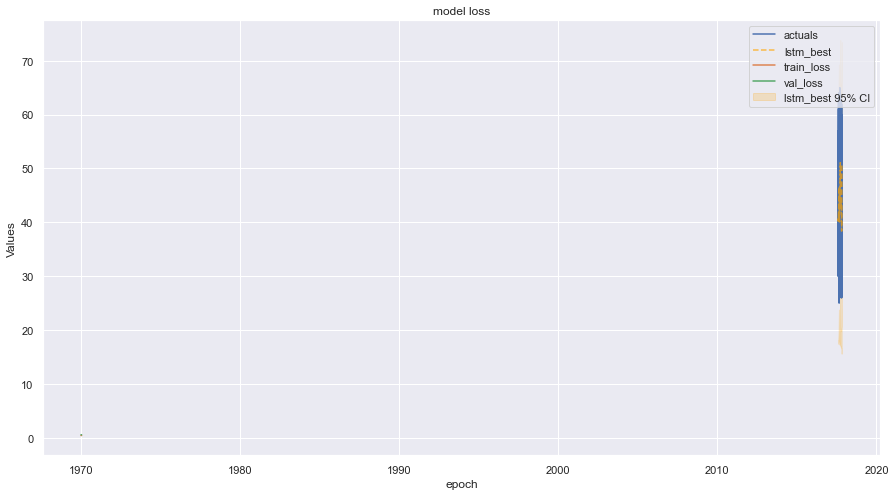

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5266 - val_loss: 0.4391
Epoch 2/15
1/1 [==============================] - 0s 408ms/step - loss: 0.5059 - val_loss: 0.4192
Epoch 3/15
1/1 [==============================] - 0s 409ms/step - loss: 0.4871 - val_loss: 0.3921
Epoch 4/15
1/1 [==============================] - 0s 402ms/step - loss: 0.4655 - val_loss: 0.3560
Epoch 5/15
1/1 [==============================] - 0s 394ms/step - loss: 0.4370 - val_loss: 0.3125
Epoch 6/15
1/1 [==============================] - 0s 407ms/step - loss: 0.3970 - val_loss: 0.2732
Epoch 7/15
1/1 [==============================] - 0s 460ms/step - loss: 0.3490 - val_loss: 0.2972
Epoch 8/15
1/1 [==============================] - 0s 452ms/step - loss: 0.3253 - val_loss: 0.3682
Epoch 9/15
1/1 [==============================] - 0s 406ms/step - loss: 0.3417 - val_loss: 0.3626
Epoch 10/15
1/1 [==============================] - 0s 405ms/step - loss: 0.3356 - val_loss: 0.3294
Epoch 11/15
1/1 [===

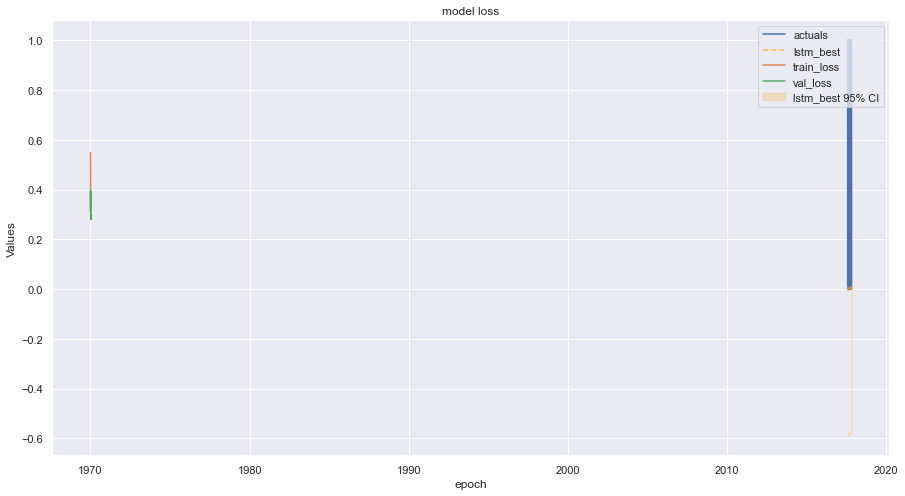

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4968 - val_loss: 0.4642
Epoch 2/15
1/1 [==============================] - 0s 406ms/step - loss: 0.4707 - val_loss: 0.4269
Epoch 3/15
1/1 [==============================] - 0s 498ms/step - loss: 0.4394 - val_loss: 0.3696
Epoch 4/15
1/1 [==============================] - 0s 469ms/step - loss: 0.4026 - val_loss: 0.2892
Epoch 5/15
1/1 [==============================] - 0s 440ms/step - loss: 0.3557 - val_loss: 0.2321
Epoch 6/15
1/1 [==============================] - 0s 389ms/step - loss: 0.3135 - val_loss: 0.2611
Epoch 7/15
1/1 [==============================] - 0s 411ms/step - loss: 0.3198 - val_loss: 0.2686
Epoch 8/15
1/1 [==============================] - 0s 413ms/step - loss: 0.3133 - val_loss: 0.2564
Epoch 9/15
1/1 [==============================] - 0s 403ms/step - loss: 0.3033 - val_loss: 0.2475
Epoch 10/15
1/1 [==============================] - 0s 401ms/step - loss: 0.2942 - val_loss: 0.2407
Epoch 11/15
1/1 [===

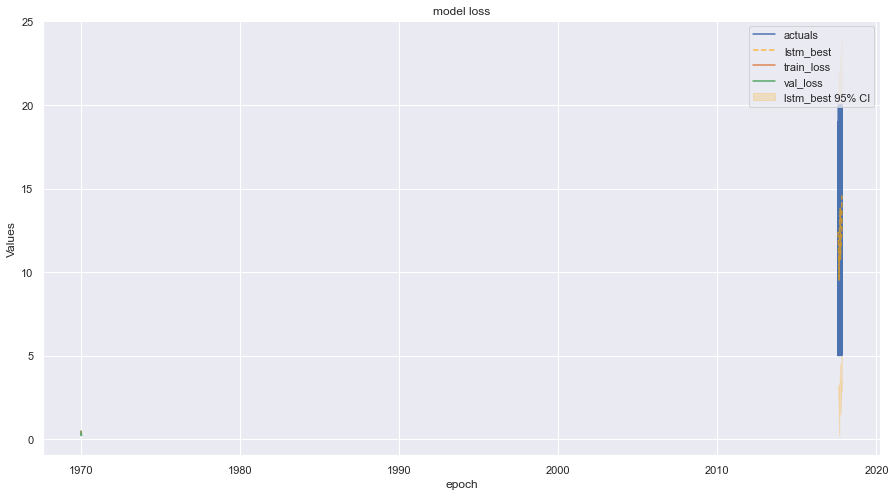

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.4337 - val_loss: 0.3618
Epoch 2/15
1/1 [==============================] - 0s 469ms/step - loss: 0.4098 - val_loss: 0.3295
Epoch 3/15
1/1 [==============================] - 0s 477ms/step - loss: 0.3846 - val_loss: 0.2834
Epoch 4/15
1/1 [==============================] - 0s 468ms/step - loss: 0.3517 - val_loss: 0.2236
Epoch 5/15
1/1 [==============================] - 0s 453ms/step - loss: 0.3106 - val_loss: 0.1832
Epoch 6/15
1/1 [==============================] - 0s 439ms/step - loss: 0.2642 - val_loss: 0.2456
Epoch 7/15
1/1 [==============================] - 0s 421ms/step - loss: 0.2609 - val_loss: 0.2757
Epoch 8/15
1/1 [==============================] - 0s 483ms/step - loss: 0.2680 - val_loss: 0.2381
Epoch 9/15
1/1 [==============================] - 0s 488ms/step - loss: 0.2438 - val_loss: 0.1891
Epoch 10/15
1/1 [==============================] - 0s 485ms/step - loss: 0.2258 - val_loss: 0.1690
Epoch 11/15
1/1 [=====

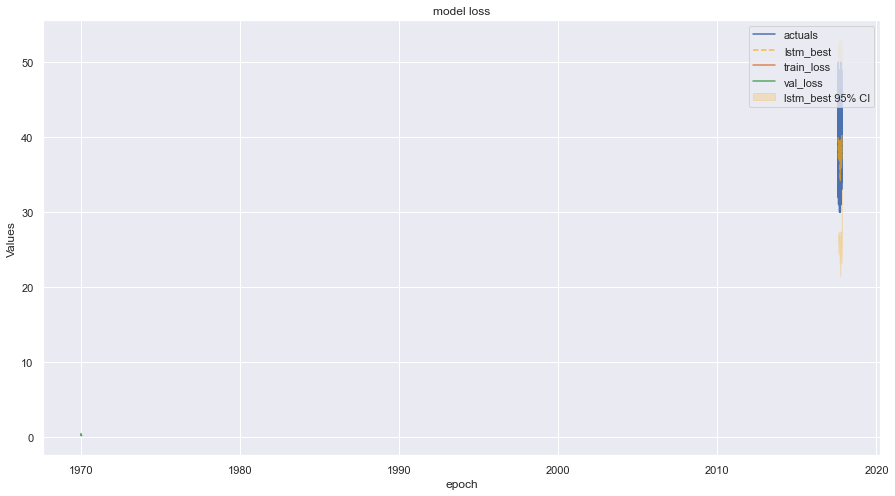

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.3634 - val_loss: 0.4992
Epoch 2/15
1/1 [==============================] - 0s 468ms/step - loss: 0.3518 - val_loss: 0.4808
Epoch 3/15
1/1 [==============================] - 0s 468ms/step - loss: 0.3390 - val_loss: 0.4524
Epoch 4/15
1/1 [==============================] - 1s 541ms/step - loss: 0.3184 - val_loss: 0.4126
Epoch 5/15
1/1 [==============================] - 1s 504ms/step - loss: 0.2961 - val_loss: 0.3620
Epoch 6/15
1/1 [==============================] - 0s 480ms/step - loss: 0.2878 - val_loss: 0.3332
Epoch 7/15
1/1 [==============================] - 0s 471ms/step - loss: 0.2885 - val_loss: 0.3275
Epoch 8/15
1/1 [==============================] - 0s 460ms/step - loss: 0.2819 - val_loss: 0.3404
Epoch 9/15
1/1 [==============================] - 0s 474ms/step - loss: 0.2707 - val_loss: 0.3652
Epoch 10/15
1/1 [==============================] - 0s 481ms/step - loss: 0.2698 - val_loss: 0.3866
Epoch 11/15
1/1 [===

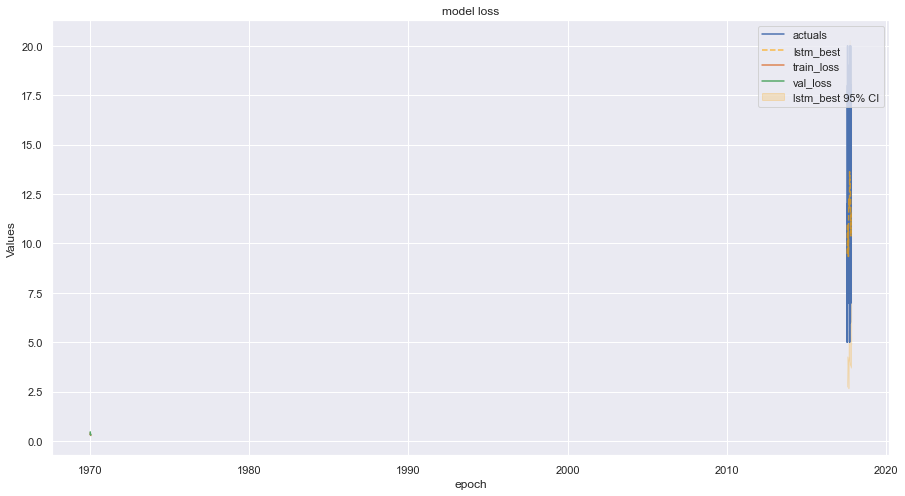

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5198 - val_loss: 0.4176
Epoch 2/15
1/1 [==============================] - 1s 632ms/step - loss: 0.4970 - val_loss: 0.3902
Epoch 3/15
1/1 [==============================] - 1s 645ms/step - loss: 0.4655 - val_loss: 0.3484
Epoch 4/15
1/1 [==============================] - 1s 504ms/step - loss: 0.4184 - val_loss: 0.3079
Epoch 5/15
1/1 [==============================] - 1s 520ms/step - loss: 0.3503 - val_loss: 0.3083
Epoch 6/15
1/1 [==============================] - 1s 682ms/step - loss: 0.2963 - val_loss: 0.3520
Epoch 7/15
1/1 [==============================] - 1s 676ms/step - loss: 0.2992 - val_loss: 0.3724
Epoch 8/15
1/1 [==============================] - 1s 569ms/step - loss: 0.2929 - val_loss: 0.3592
Epoch 9/15
1/1 [==============================] - 1s 608ms/step - loss: 0.2661 - val_loss: 0.3393
Epoch 10/15
1/1 [==============================] - 1s 573ms/step - loss: 0.2415 - val_loss: 0.3259
Epoch 11/15
1/1 [===

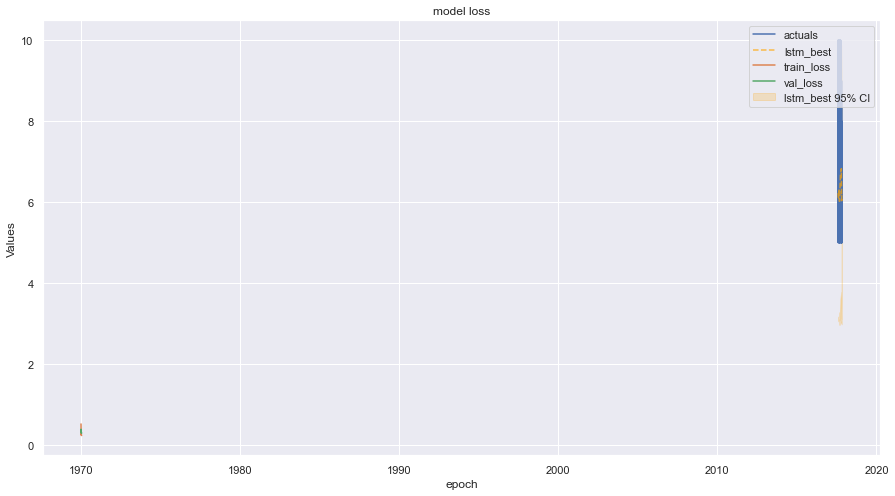

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4636 - val_loss: 0.3757
Epoch 2/15
1/1 [==============================] - 0s 463ms/step - loss: 0.4520 - val_loss: 0.3766
Epoch 3/15
1/1 [==============================] - 0s 476ms/step - loss: 0.4466 - val_loss: 0.3783
Epoch 4/15
1/1 [==============================] - 1s 538ms/step - loss: 0.4401 - val_loss: 0.3805
Epoch 5/15
1/1 [==============================] - 1s 501ms/step - loss: 0.4298 - val_loss: 0.3860
Epoch 6/15
1/1 [==============================] - 0s 482ms/step - loss: 0.4140 - val_loss: 0.3964
Epoch 7/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3875 - val_loss: 0.4140
Epoch 8/15
1/1 [==============================] - 0s 449ms/step - loss: 0.3604 - val_loss: 0.4523
Epoch 9/15
1/1 [==============================] - 0s 467ms/step - loss: 0.3667 - val_loss: 0.4677
Epoch 10/15
1/1 [==============================] - 0s 454ms/step - loss: 0.3744 - val_loss: 0.4513
Epoch 11/15
1/1 [===

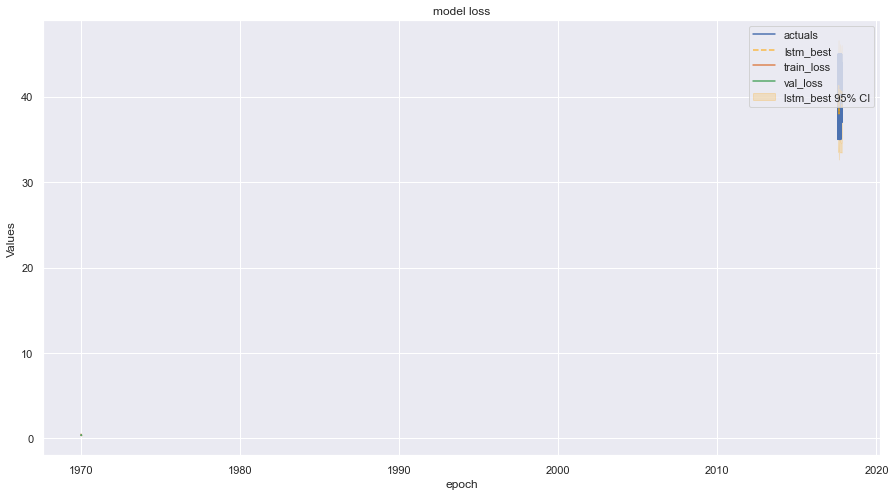

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5339 - val_loss: 0.5092
Epoch 2/15
1/1 [==============================] - 0s 428ms/step - loss: 0.5125 - val_loss: 0.4835
Epoch 3/15
1/1 [==============================] - 0s 428ms/step - loss: 0.4882 - val_loss: 0.4464
Epoch 4/15
1/1 [==============================] - 0s 433ms/step - loss: 0.4540 - val_loss: 0.3924
Epoch 5/15
1/1 [==============================] - 0s 469ms/step - loss: 0.4067 - val_loss: 0.3231
Epoch 6/15
1/1 [==============================] - 0s 488ms/step - loss: 0.3419 - val_loss: 0.2999
Epoch 7/15
1/1 [==============================] - 0s 496ms/step - loss: 0.2982 - val_loss: 0.3442
Epoch 8/15
1/1 [==============================] - 1s 527ms/step - loss: 0.3237 - val_loss: 0.3465
Epoch 9/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3084 - val_loss: 0.3251
Epoch 10/15
1/1 [==============================] - 0s 454ms/step - loss: 0.2781 - val_loss: 0.3074
Epoch 11/15
1/1 [===

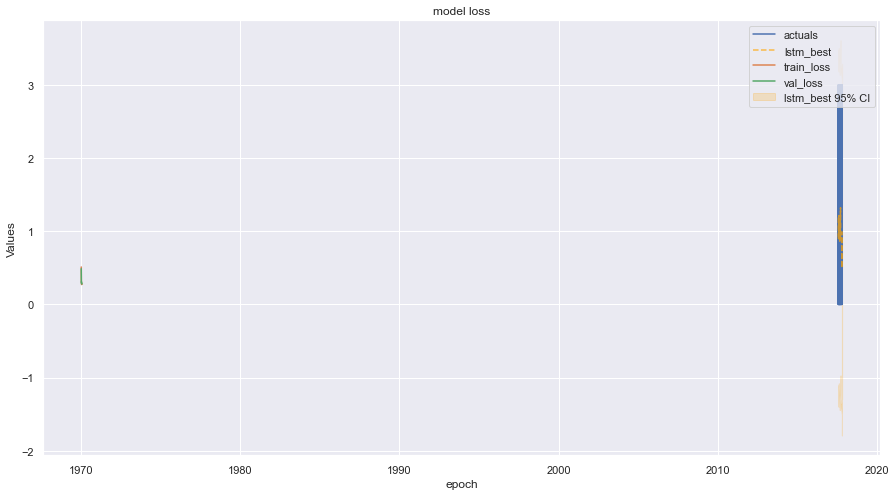

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4910 - val_loss: 0.5709
Epoch 2/15
1/1 [==============================] - 0s 421ms/step - loss: 0.4645 - val_loss: 0.5360
Epoch 3/15
1/1 [==============================] - 0s 423ms/step - loss: 0.4317 - val_loss: 0.4888
Epoch 4/15
1/1 [==============================] - 0s 419ms/step - loss: 0.3891 - val_loss: 0.4191
Epoch 5/15
1/1 [==============================] - 0s 430ms/step - loss: 0.3415 - val_loss: 0.3322
Epoch 6/15
1/1 [==============================] - 0s 425ms/step - loss: 0.3089 - val_loss: 0.2939
Epoch 7/15
1/1 [==============================] - 0s 495ms/step - loss: 0.3206 - val_loss: 0.2714
Epoch 8/15
1/1 [==============================] - 0s 468ms/step - loss: 0.3042 - val_loss: 0.2645
Epoch 9/15
1/1 [==============================] - 0s 441ms/step - loss: 0.2840 - val_loss: 0.2836
Epoch 10/15
1/1 [==============================] - 0s 412ms/step - loss: 0.2753 - val_loss: 0.3111
Epoch 11/15
1/1 [===

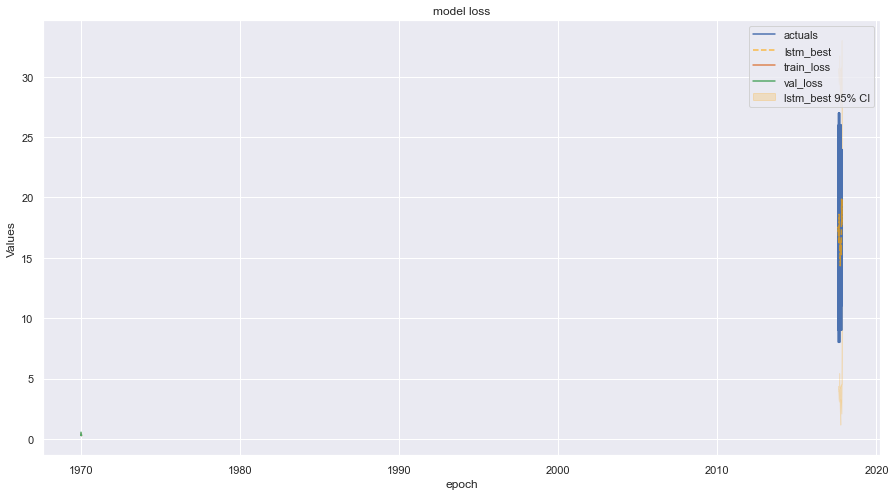

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4870 - val_loss: 0.4446
Epoch 2/15
1/1 [==============================] - 0s 480ms/step - loss: 0.4669 - val_loss: 0.4202
Epoch 3/15
1/1 [==============================] - 0s 450ms/step - loss: 0.4444 - val_loss: 0.3866
Epoch 4/15
1/1 [==============================] - 0s 415ms/step - loss: 0.4122 - val_loss: 0.3358
Epoch 5/15
1/1 [==============================] - 0s 434ms/step - loss: 0.3699 - val_loss: 0.2801
Epoch 6/15
1/1 [==============================] - 0s 421ms/step - loss: 0.3145 - val_loss: 0.2431
Epoch 7/15
1/1 [==============================] - 0s 443ms/step - loss: 0.2726 - val_loss: 0.2558
Epoch 8/15
1/1 [==============================] - 0s 426ms/step - loss: 0.2784 - val_loss: 0.2653
Epoch 9/15
1/1 [==============================] - 0s 421ms/step - loss: 0.2755 - val_loss: 0.2514
Epoch 10/15
1/1 [==============================] - 0s 427ms/step - loss: 0.2601 - val_loss: 0.2364
Epoch 11/15
1/1 [===

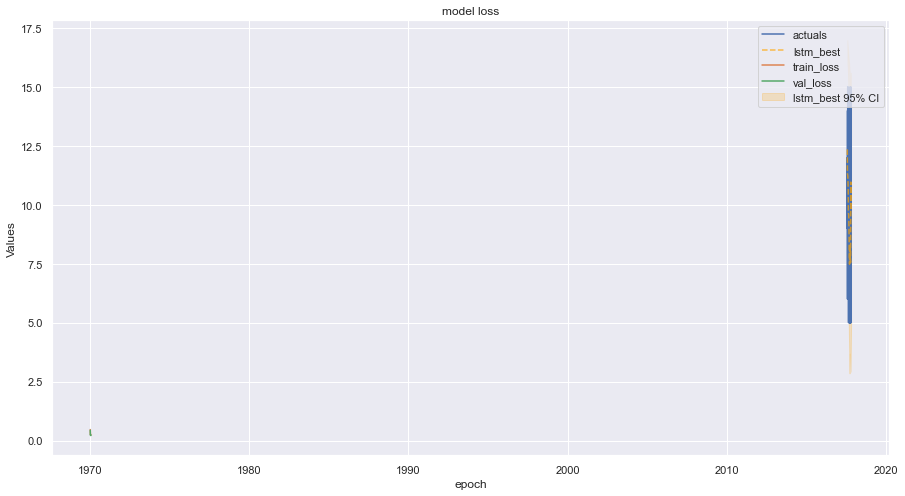

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5797 - val_loss: 0.5511
Epoch 2/15
1/1 [==============================] - 0s 439ms/step - loss: 0.5603 - val_loss: 0.5302
Epoch 3/15
1/1 [==============================] - 0s 441ms/step - loss: 0.5400 - val_loss: 0.5038
Epoch 4/15
1/1 [==============================] - 0s 429ms/step - loss: 0.5138 - val_loss: 0.4654
Epoch 5/15
1/1 [==============================] - 0s 440ms/step - loss: 0.4776 - val_loss: 0.4127
Epoch 6/15
1/1 [==============================] - 0s 460ms/step - loss: 0.4326 - val_loss: 0.3560
Epoch 7/15
1/1 [==============================] - 0s 479ms/step - loss: 0.3887 - val_loss: 0.3475
Epoch 8/15
1/1 [==============================] - 0s 480ms/step - loss: 0.3858 - val_loss: 0.3544
Epoch 9/15
1/1 [==============================] - 1s 501ms/step - loss: 0.3835 - val_loss: 0.3431
Epoch 10/15
1/1 [==============================] - 0s 419ms/step - loss: 0.3598 - val_loss: 0.3291
Epoch 11/15
1/1 [===

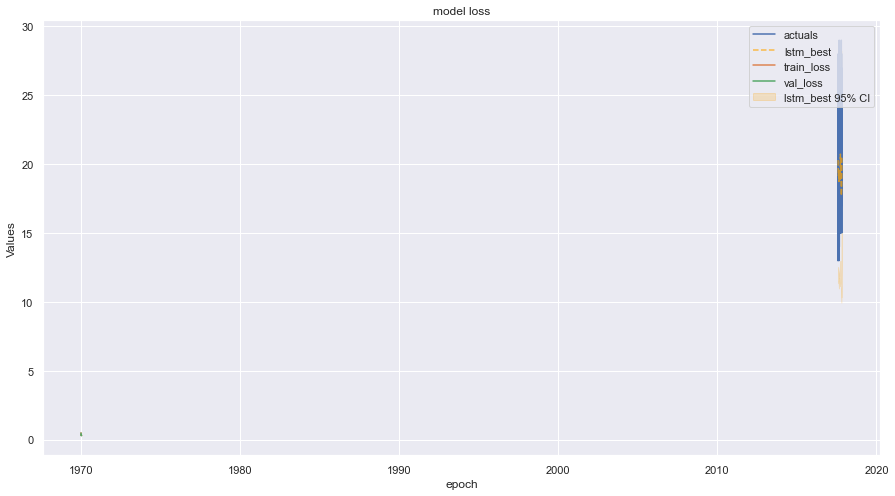

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4765 - val_loss: 0.5773
Epoch 2/15
1/1 [==============================] - 0s 484ms/step - loss: 0.4474 - val_loss: 0.5411
Epoch 3/15
1/1 [==============================] - 0s 496ms/step - loss: 0.4147 - val_loss: 0.4886
Epoch 4/15
1/1 [==============================] - 0s 476ms/step - loss: 0.3745 - val_loss: 0.4139
Epoch 5/15
1/1 [==============================] - 1s 530ms/step - loss: 0.3328 - val_loss: 0.3269
Epoch 6/15
1/1 [==============================] - 1s 510ms/step - loss: 0.3135 - val_loss: 0.2803
Epoch 7/15
1/1 [==============================] - 1s 628ms/step - loss: 0.3186 - val_loss: 0.2624
Epoch 8/15
1/1 [==============================] - 0s 498ms/step - loss: 0.3046 - val_loss: 0.2682
Epoch 9/15
1/1 [==============================] - 0s 459ms/step - loss: 0.2884 - val_loss: 0.2942
Epoch 10/15
1/1 [==============================] - 0s 471ms/step - loss: 0.2834 - val_loss: 0.3271
Epoch 11/15
1/1 [===

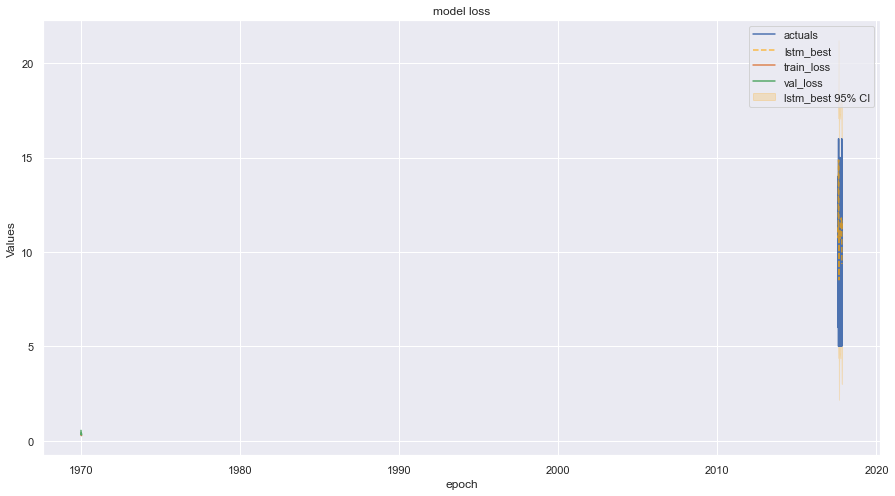

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.4531 - val_loss: 0.5428
Epoch 2/15
1/1 [==============================] - 1s 578ms/step - loss: 0.4373 - val_loss: 0.5255
Epoch 3/15
1/1 [==============================] - 1s 561ms/step - loss: 0.4215 - val_loss: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 474ms/step - loss: 0.3994 - val_loss: 0.4628
Epoch 5/15
1/1 [==============================] - 0s 485ms/step - loss: 0.3696 - val_loss: 0.4088
Epoch 6/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3367 - val_loss: 0.3423
Epoch 7/15
1/1 [==============================] - 0s 472ms/step - loss: 0.3130 - val_loss: 0.3037
Epoch 8/15
1/1 [==============================] - 1s 557ms/step - loss: 0.3237 - val_loss: 0.2920
Epoch 9/15
1/1 [==============================] - 1s 515ms/step - loss: 0.3261 - val_loss: 0.2838
Epoch 10/15
1/1 [==============================] - 0s 475ms/step - loss: 0.3186 - val_loss: 0.2892
Epoch 11/15
1/1 [=====

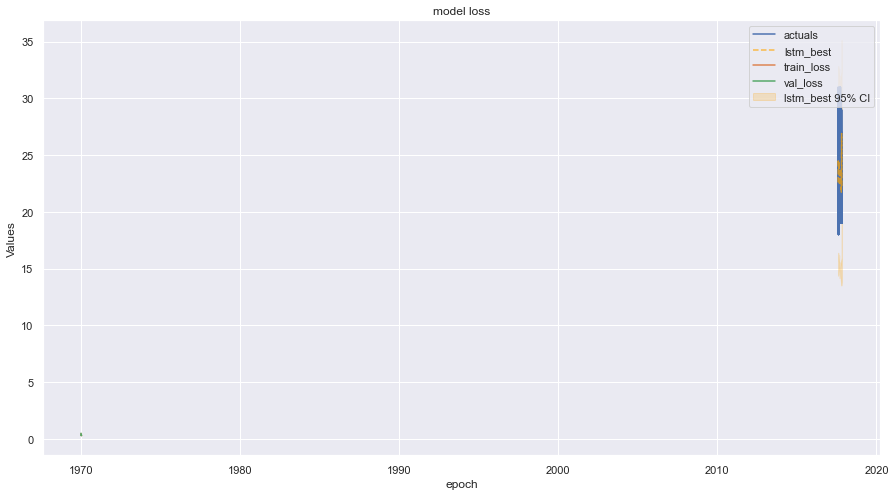

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.5324 - val_loss: 0.4461
Epoch 2/15
1/1 [==============================] - 1s 539ms/step - loss: 0.5133 - val_loss: 0.4251
Epoch 3/15
1/1 [==============================] - 1s 544ms/step - loss: 0.4872 - val_loss: 0.3933
Epoch 4/15
1/1 [==============================] - 0s 494ms/step - loss: 0.4494 - val_loss: 0.3550
Epoch 5/15
1/1 [==============================] - 0s 491ms/step - loss: 0.3999 - val_loss: 0.3199
Epoch 6/15
1/1 [==============================] - 0s 466ms/step - loss: 0.3474 - val_loss: 0.3151
Epoch 7/15
1/1 [==============================] - 0s 483ms/step - loss: 0.3402 - val_loss: 0.3164
Epoch 8/15
1/1 [==============================] - 0s 487ms/step - loss: 0.3277 - val_loss: 0.3091
Epoch 9/15
1/1 [==============================] - 0s 480ms/step - loss: 0.3164 - val_loss: 0.3032
Epoch 10/15
1/1 [==============================] - 0s 476ms/step - loss: 0.3034 - val_loss: 0.3010
Epoch 11/15
1/1 [=====

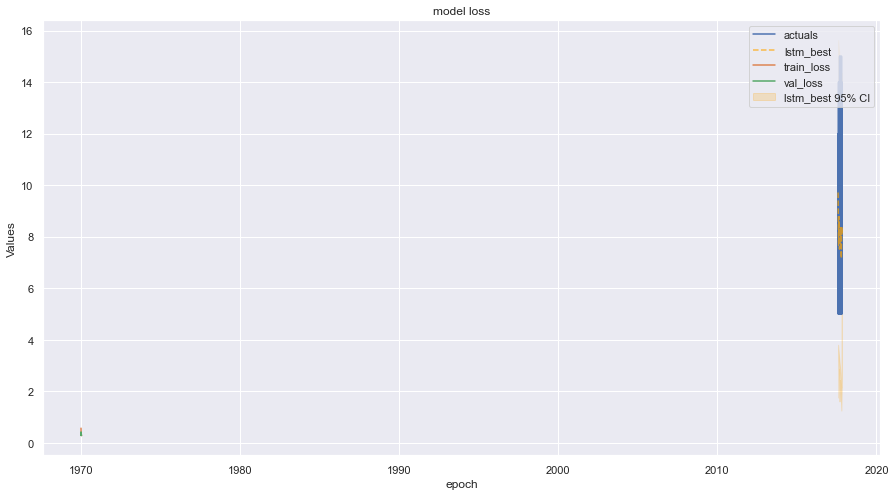

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.4422 - val_loss: 0.3886
Epoch 2/15
1/1 [==============================] - 0s 469ms/step - loss: 0.4255 - val_loss: 0.3761
Epoch 3/15
1/1 [==============================] - 0s 476ms/step - loss: 0.4094 - val_loss: 0.3608
Epoch 4/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3879 - val_loss: 0.3421
Epoch 5/15
1/1 [==============================] - 0s 481ms/step - loss: 0.3587 - val_loss: 0.3238
Epoch 6/15
1/1 [==============================] - 0s 471ms/step - loss: 0.3236 - val_loss: 0.3275
Epoch 7/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2921 - val_loss: 0.3514
Epoch 8/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2890 - val_loss: 0.3624
Epoch 9/15
1/1 [==============================] - 0s 475ms/step - loss: 0.2891 - val_loss: 0.3496
Epoch 10/15
1/1 [==============================] - 1s 553ms/step - loss: 0.2721 - val_loss: 0.3298
Epoch 11/15
1/1 [===

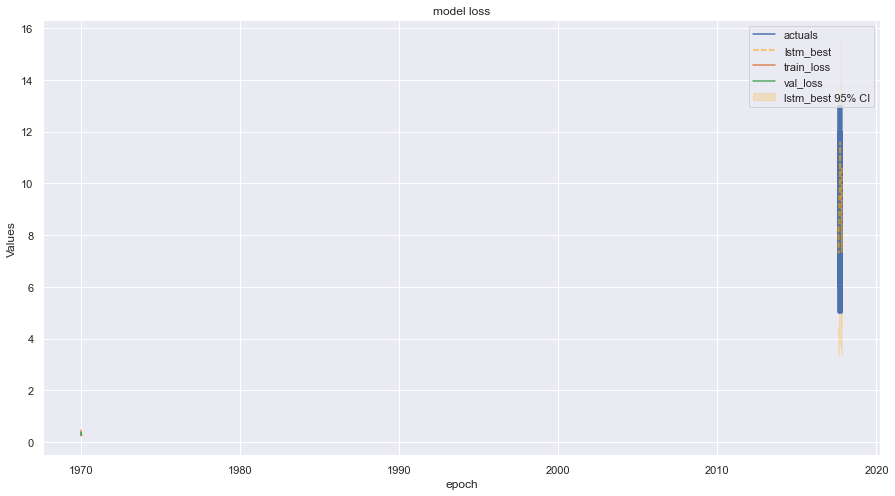

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.4698 - val_loss: 0.4664
Epoch 2/15
1/1 [==============================] - 0s 452ms/step - loss: 0.4524 - val_loss: 0.4457
Epoch 3/15
1/1 [==============================] - 0s 444ms/step - loss: 0.4306 - val_loss: 0.4139
Epoch 4/15
1/1 [==============================] - 0s 443ms/step - loss: 0.3974 - val_loss: 0.3646
Epoch 5/15
1/1 [==============================] - 0s 442ms/step - loss: 0.3494 - val_loss: 0.3136
Epoch 6/15
1/1 [==============================] - 0s 444ms/step - loss: 0.3103 - val_loss: 0.2977
Epoch 7/15
1/1 [==============================] - 0s 436ms/step - loss: 0.3051 - val_loss: 0.3022
Epoch 8/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3206 - val_loss: 0.2855
Epoch 9/15
1/1 [==============================] - 1s 540ms/step - loss: 0.3101 - val_loss: 0.2666
Epoch 10/15
1/1 [==============================] - 0s 490ms/step - loss: 0.2904 - val_loss: 0.2661
Epoch 11/15
1/1 [===

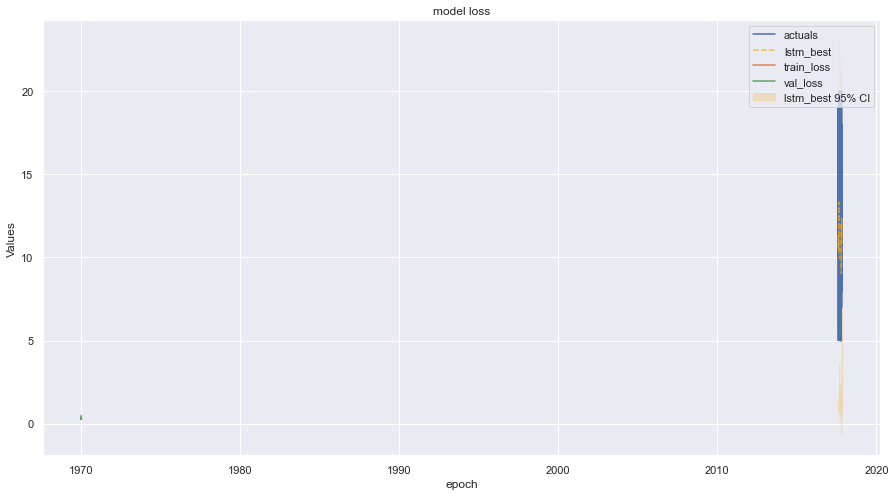

Epoch 1/15
1/1 [==============================] - 15s 15s/step - loss: 0.3846 - val_loss: 0.4582
Epoch 2/15
1/1 [==============================] - 0s 457ms/step - loss: 0.3764 - val_loss: 0.4431
Epoch 3/15
1/1 [==============================] - 0s 466ms/step - loss: 0.3694 - val_loss: 0.4227
Epoch 4/15
1/1 [==============================] - 0s 445ms/step - loss: 0.3608 - val_loss: 0.3921
Epoch 5/15
1/1 [==============================] - 0s 442ms/step - loss: 0.3496 - val_loss: 0.3688
Epoch 6/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3483 - val_loss: 0.3566
Epoch 7/15
1/1 [==============================] - 1s 502ms/step - loss: 0.3463 - val_loss: 0.3542
Epoch 8/15
1/1 [==============================] - 1s 502ms/step - loss: 0.3412 - val_loss: 0.3587
Epoch 9/15
1/1 [==============================] - 1s 521ms/step - loss: 0.3373 - val_loss: 0.3641
Epoch 10/15
1/1 [==============================] - 0s 485ms/step - loss: 0.3373 - val_loss: 0.3681
Epoch 11/15
1/1 [===

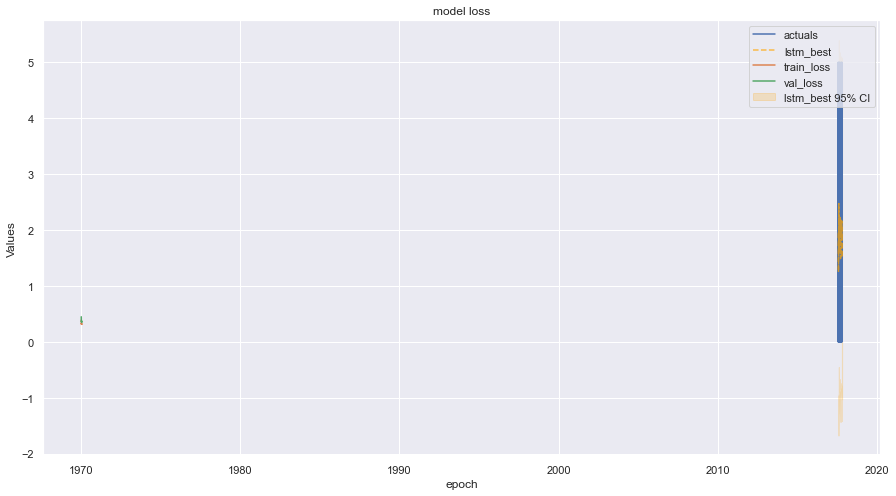

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.6192 - val_loss: 0.4359
Epoch 2/15
1/1 [==============================] - 0s 432ms/step - loss: 0.5945 - val_loss: 0.4145
Epoch 3/15
1/1 [==============================] - 0s 433ms/step - loss: 0.5704 - val_loss: 0.3873
Epoch 4/15
1/1 [==============================] - 0s 492ms/step - loss: 0.5380 - val_loss: 0.3526
Epoch 5/15
1/1 [==============================] - 0s 474ms/step - loss: 0.4929 - val_loss: 0.3180
Epoch 6/15
1/1 [==============================] - 0s 425ms/step - loss: 0.4348 - val_loss: 0.3013
Epoch 7/15
1/1 [==============================] - 0s 428ms/step - loss: 0.3771 - val_loss: 0.3335
Epoch 8/15
1/1 [==============================] - 0s 438ms/step - loss: 0.3471 - val_loss: 0.3748
Epoch 9/15
1/1 [==============================] - 0s 444ms/step - loss: 0.3334 - val_loss: 0.3870
Epoch 10/15
1/1 [==============================] - 0s 421ms/step - loss: 0.3220 - val_loss: 0.3790
Epoch 11/15
1/1 [===

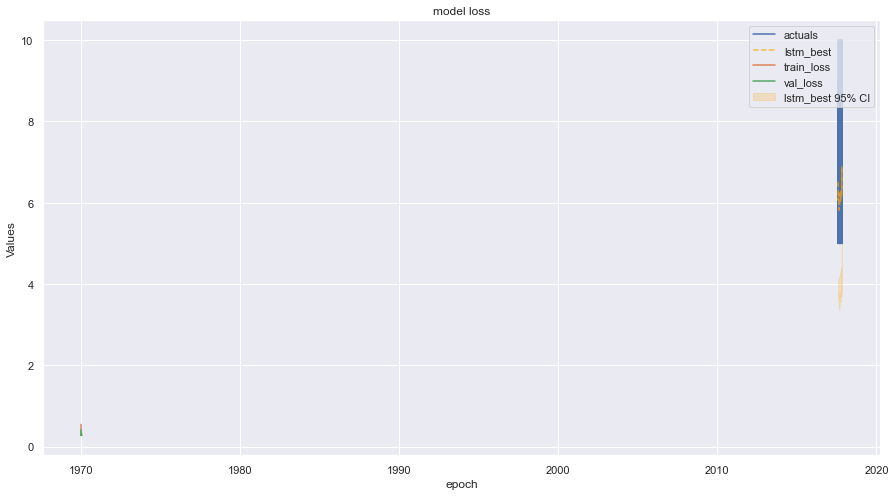

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.6069 - val_loss: 0.4987
Epoch 2/15
1/1 [==============================] - 0s 448ms/step - loss: 0.5846 - val_loss: 0.4801
Epoch 3/15
1/1 [==============================] - 0s 450ms/step - loss: 0.5582 - val_loss: 0.4528
Epoch 4/15
1/1 [==============================] - 0s 439ms/step - loss: 0.5209 - val_loss: 0.4137
Epoch 5/15
1/1 [==============================] - 0s 445ms/step - loss: 0.4690 - val_loss: 0.3601
Epoch 6/15
1/1 [==============================] - 0s 435ms/step - loss: 0.4084 - val_loss: 0.3341
Epoch 7/15
1/1 [==============================] - 1s 503ms/step - loss: 0.3521 - val_loss: 0.3824
Epoch 8/15
1/1 [==============================] - 1s 537ms/step - loss: 0.3498 - val_loss: 0.3927
Epoch 9/15
1/1 [==============================] - 0s 436ms/step - loss: 0.3394 - val_loss: 0.3647
Epoch 10/15
1/1 [==============================] - 0s 439ms/step - loss: 0.3166 - val_loss: 0.3240
Epoch 11/15
1/1 [===

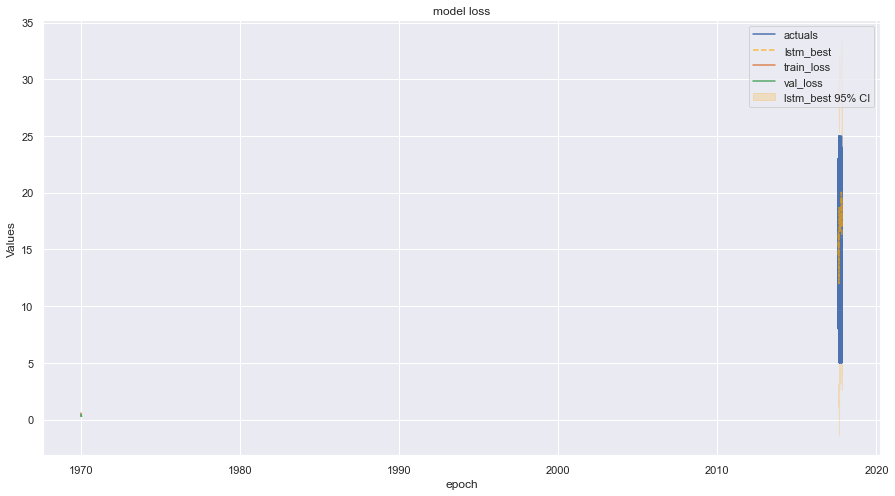

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5253 - val_loss: 0.4310
Epoch 2/15
1/1 [==============================] - 0s 457ms/step - loss: 0.5124 - val_loss: 0.4221
Epoch 3/15
1/1 [==============================] - 0s 493ms/step - loss: 0.4975 - val_loss: 0.4103
Epoch 4/15
1/1 [==============================] - 1s 506ms/step - loss: 0.4755 - val_loss: 0.3953
Epoch 5/15
1/1 [==============================] - 0s 498ms/step - loss: 0.4430 - val_loss: 0.3743
Epoch 6/15
1/1 [==============================] - 0s 447ms/step - loss: 0.4002 - val_loss: 0.3511
Epoch 7/15
1/1 [==============================] - 0s 442ms/step - loss: 0.3520 - val_loss: 0.3450
Epoch 8/15
1/1 [==============================] - 0s 448ms/step - loss: 0.3169 - val_loss: 0.3662
Epoch 9/15
1/1 [==============================] - 0s 423ms/step - loss: 0.3194 - val_loss: 0.3692
Epoch 10/15
1/1 [==============================] - 0s 428ms/step - loss: 0.3139 - val_loss: 0.3522
Epoch 11/15
1/1 [===

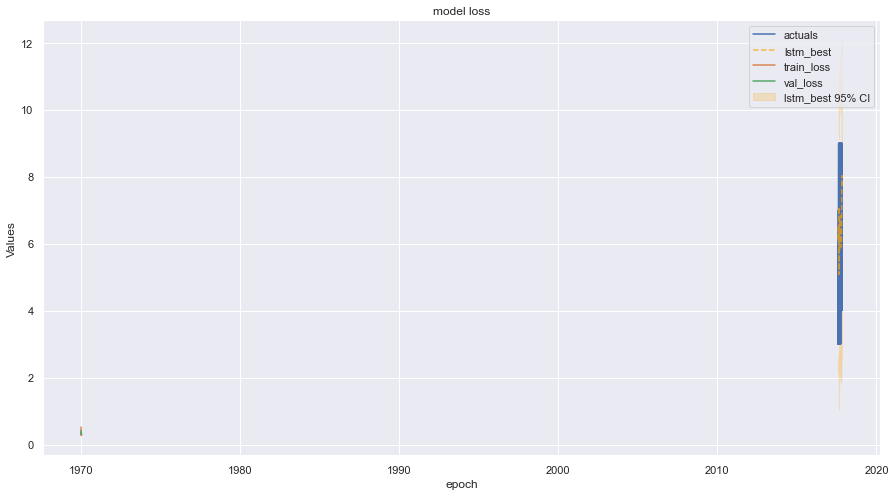

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5455 - val_loss: 0.4957
Epoch 2/15
1/1 [==============================] - 0s 479ms/step - loss: 0.5208 - val_loss: 0.4690
Epoch 3/15
1/1 [==============================] - 0s 485ms/step - loss: 0.4916 - val_loss: 0.4289
Epoch 4/15
1/1 [==============================] - 1s 554ms/step - loss: 0.4544 - val_loss: 0.3686
Epoch 5/15
1/1 [==============================] - 1s 677ms/step - loss: 0.4040 - val_loss: 0.2934
Epoch 6/15
1/1 [==============================] - 1s 589ms/step - loss: 0.3552 - val_loss: 0.2649
Epoch 7/15
1/1 [==============================] - 0s 476ms/step - loss: 0.3328 - val_loss: 0.2848
Epoch 8/15
1/1 [==============================] - 0s 479ms/step - loss: 0.3329 - val_loss: 0.2925
Epoch 9/15
1/1 [==============================] - 0s 477ms/step - loss: 0.3293 - val_loss: 0.2753
Epoch 10/15
1/1 [==============================] - 1s 511ms/step - loss: 0.3175 - val_loss: 0.2586
Epoch 11/15
1/1 [===

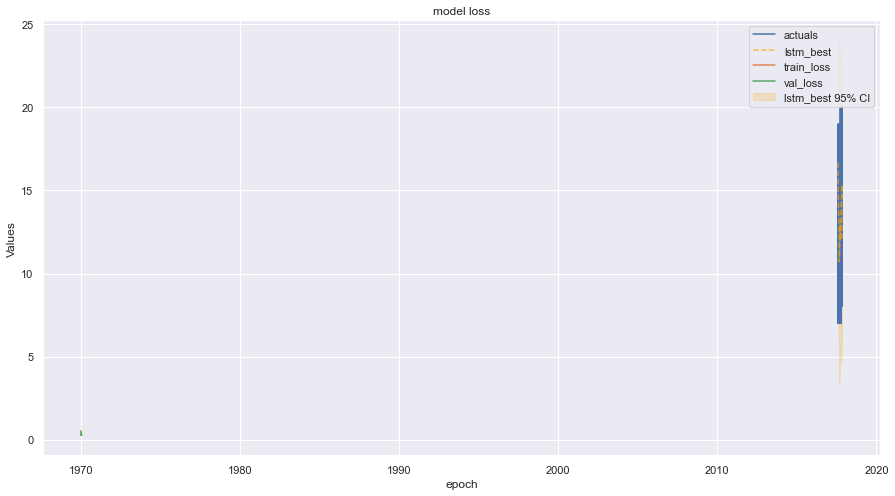

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5319 - val_loss: 0.5480
Epoch 2/15
1/1 [==============================] - 0s 485ms/step - loss: 0.5058 - val_loss: 0.5085
Epoch 3/15
1/1 [==============================] - 1s 573ms/step - loss: 0.4723 - val_loss: 0.4492
Epoch 4/15
1/1 [==============================] - 0s 493ms/step - loss: 0.4244 - val_loss: 0.3722
Epoch 5/15
1/1 [==============================] - 0s 452ms/step - loss: 0.3612 - val_loss: 0.2995
Epoch 6/15
1/1 [==============================] - 0s 437ms/step - loss: 0.2987 - val_loss: 0.2837
Epoch 7/15
1/1 [==============================] - 0s 460ms/step - loss: 0.3037 - val_loss: 0.2650
Epoch 8/15
1/1 [==============================] - 1s 500ms/step - loss: 0.2991 - val_loss: 0.2374
Epoch 9/15
1/1 [==============================] - 1s 512ms/step - loss: 0.2632 - val_loss: 0.2225
Epoch 10/15
1/1 [==============================] - 0s 475ms/step - loss: 0.2419 - val_loss: 0.2206
Epoch 11/15
1/1 [===

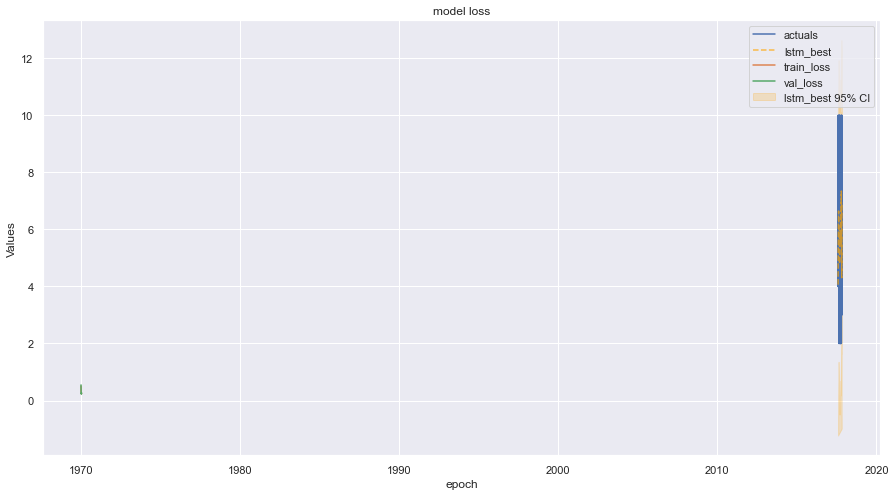

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5878 - val_loss: 0.4753
Epoch 2/15
1/1 [==============================] - 0s 440ms/step - loss: 0.5654 - val_loss: 0.4486
Epoch 3/15
1/1 [==============================] - 0s 432ms/step - loss: 0.5373 - val_loss: 0.4054
Epoch 4/15
1/1 [==============================] - 0s 425ms/step - loss: 0.4931 - val_loss: 0.3555
Epoch 5/15
1/1 [==============================] - 0s 425ms/step - loss: 0.4233 - val_loss: 0.3605
Epoch 6/15
1/1 [==============================] - 0s 422ms/step - loss: 0.3397 - val_loss: 0.4269
Epoch 7/15
1/1 [==============================] - 1s 554ms/step - loss: 0.3279 - val_loss: 0.4671
Epoch 8/15
1/1 [==============================] - 0s 497ms/step - loss: 0.3485 - val_loss: 0.4456
Epoch 9/15
1/1 [==============================] - 0s 431ms/step - loss: 0.3246 - val_loss: 0.4136
Epoch 10/15
1/1 [==============================] - 0s 426ms/step - loss: 0.2992 - val_loss: 0.3973
Epoch 11/15
1/1 [===

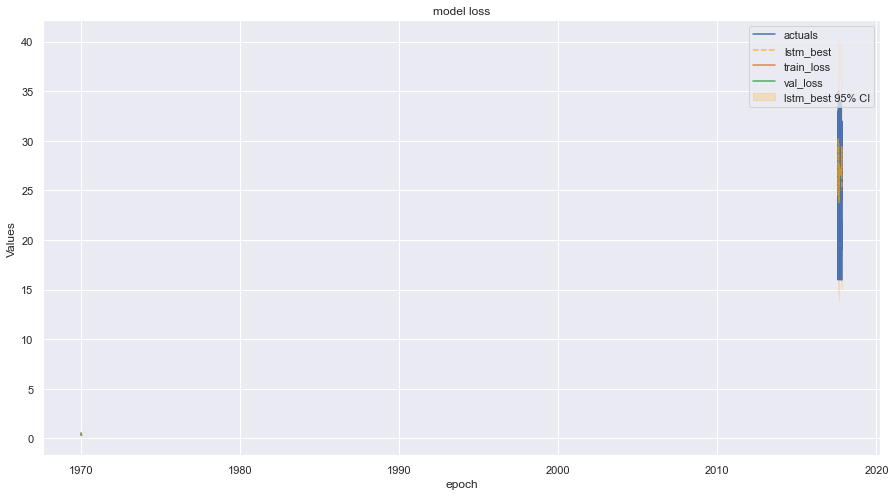

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.3722 - val_loss: 0.4841
Epoch 2/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3616 - val_loss: 0.4655
Epoch 3/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3529 - val_loss: 0.4426
Epoch 4/15
1/1 [==============================] - 0s 474ms/step - loss: 0.3415 - val_loss: 0.4074
Epoch 5/15
1/1 [==============================] - 0s 471ms/step - loss: 0.3239 - val_loss: 0.3615
Epoch 6/15
1/1 [==============================] - 0s 484ms/step - loss: 0.2997 - val_loss: 0.3242
Epoch 7/15
1/1 [==============================] - 0s 467ms/step - loss: 0.2788 - val_loss: 0.2982
Epoch 8/15
1/1 [==============================] - 1s 547ms/step - loss: 0.2785 - val_loss: 0.3039
Epoch 9/15
1/1 [==============================] - 1s 549ms/step - loss: 0.2896 - val_loss: 0.3078
Epoch 10/15
1/1 [==============================] - 1s 558ms/step - loss: 0.2745 - val_loss: 0.3172
Epoch 11/15
1/1 [===

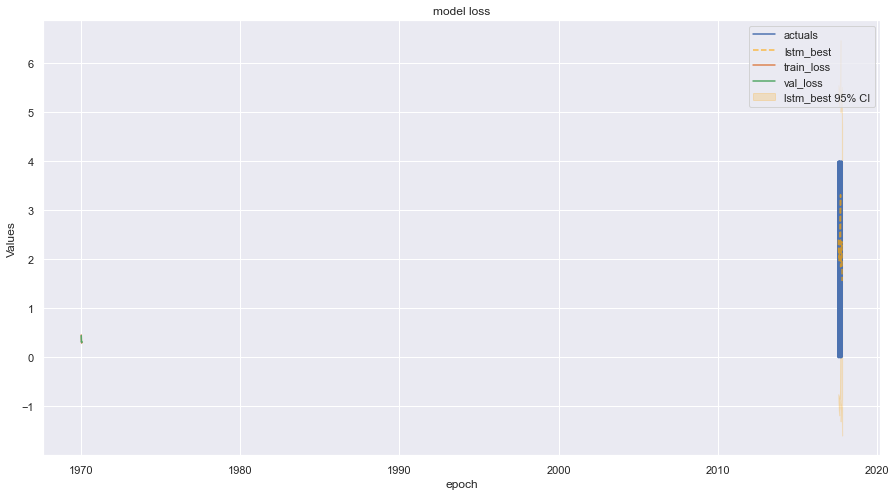

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5055 - val_loss: 0.3404
Epoch 2/15
1/1 [==============================] - 0s 460ms/step - loss: 0.5018 - val_loss: 0.3424
Epoch 3/15
1/1 [==============================] - 0s 464ms/step - loss: 0.5002 - val_loss: 0.3454
Epoch 4/15
1/1 [==============================] - 1s 520ms/step - loss: 0.4992 - val_loss: 0.3470
Epoch 5/15
1/1 [==============================] - 1s 521ms/step - loss: 0.4988 - val_loss: 0.3508
Epoch 6/15
1/1 [==============================] - 0s 478ms/step - loss: 0.4984 - val_loss: 0.3557
Epoch 7/15
1/1 [==============================] - 0s 489ms/step - loss: 0.4976 - val_loss: 0.3606
Epoch 8/15
1/1 [==============================] - 0s 457ms/step - loss: 0.4966 - val_loss: 0.3686
Epoch 9/15
1/1 [==============================] - 0s 456ms/step - loss: 0.4956 - val_loss: 0.3776
Epoch 10/15
1/1 [==============================] - 0s 462ms/step - loss: 0.4937 - val_loss: 0.3912
Epoch 11/15
1/1 [===

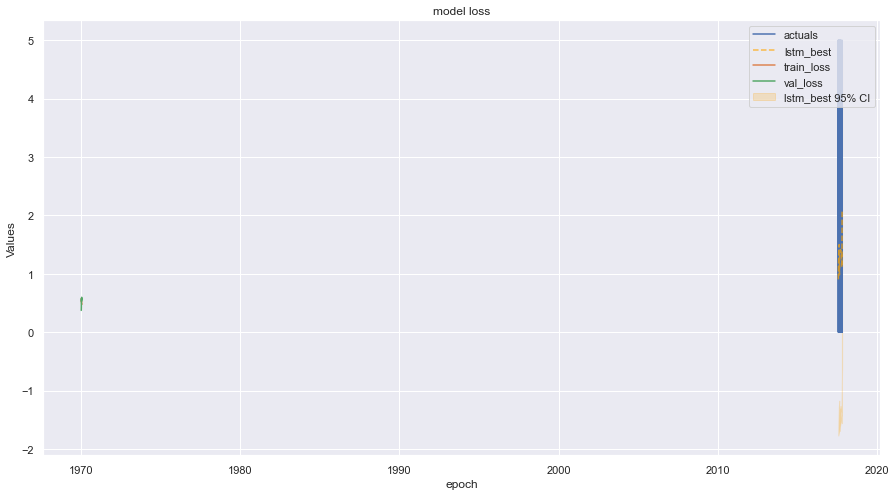

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4205 - val_loss: 0.4777
Epoch 2/15
1/1 [==============================] - 1s 577ms/step - loss: 0.3953 - val_loss: 0.4521
Epoch 3/15
1/1 [==============================] - 1s 534ms/step - loss: 0.3725 - val_loss: 0.4251
Epoch 4/15
1/1 [==============================] - 0s 484ms/step - loss: 0.3432 - val_loss: 0.3892
Epoch 5/15
1/1 [==============================] - 1s 519ms/step - loss: 0.3041 - val_loss: 0.3470
Epoch 6/15
1/1 [==============================] - 0s 474ms/step - loss: 0.2672 - val_loss: 0.3246
Epoch 7/15
1/1 [==============================] - 0s 469ms/step - loss: 0.2632 - val_loss: 0.3237
Epoch 8/15
1/1 [==============================] - 0s 473ms/step - loss: 0.2706 - val_loss: 0.3300
Epoch 9/15
1/1 [==============================] - 0s 473ms/step - loss: 0.2652 - val_loss: 0.3360
Epoch 10/15
1/1 [==============================] - 0s 478ms/step - loss: 0.2557 - val_loss: 0.3362
Epoch 11/15
1/1 [===

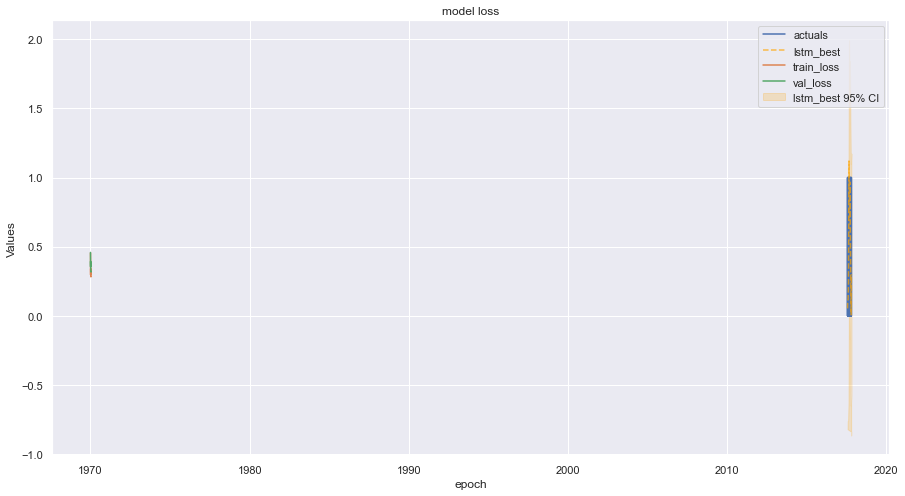

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4572 - val_loss: 0.4299
Epoch 2/15
1/1 [==============================] - 1s 531ms/step - loss: 0.4430 - val_loss: 0.4153
Epoch 3/15
1/1 [==============================] - 1s 567ms/step - loss: 0.4289 - val_loss: 0.3942
Epoch 4/15
1/1 [==============================] - 0s 482ms/step - loss: 0.4080 - val_loss: 0.3615
Epoch 5/15
1/1 [==============================] - 1s 562ms/step - loss: 0.3750 - val_loss: 0.3212
Epoch 6/15
1/1 [==============================] - 1s 608ms/step - loss: 0.3359 - val_loss: 0.2912
Epoch 7/15
1/1 [==============================] - 1s 644ms/step - loss: 0.3152 - val_loss: 0.3320
Epoch 8/15
1/1 [==============================] - 1s 503ms/step - loss: 0.3396 - val_loss: 0.3336
Epoch 9/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3392 - val_loss: 0.2994
Epoch 10/15
1/1 [==============================] - 0s 458ms/step - loss: 0.3179 - val_loss: 0.2832
Epoch 11/15
1/1 [===

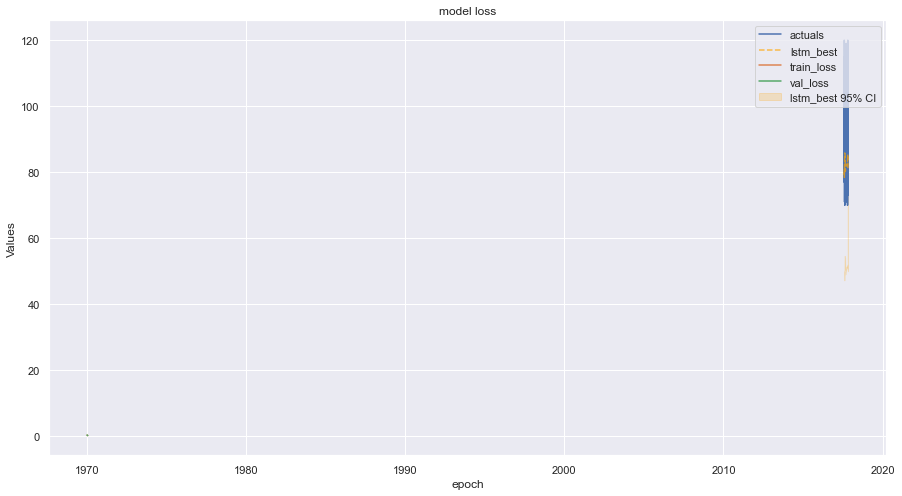

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4953 - val_loss: 0.1632
Epoch 2/15
1/1 [==============================] - 1s 541ms/step - loss: 0.4948 - val_loss: 0.1672
Epoch 3/15
1/1 [==============================] - 1s 518ms/step - loss: 0.4939 - val_loss: 0.1705
Epoch 4/15
1/1 [==============================] - 0s 476ms/step - loss: 0.4942 - val_loss: 0.1736
Epoch 5/15
1/1 [==============================] - 0s 466ms/step - loss: 0.4933 - val_loss: 0.1772
Epoch 6/15
1/1 [==============================] - 0s 473ms/step - loss: 0.4934 - val_loss: 0.1802
Epoch 7/15
1/1 [==============================] - 0s 465ms/step - loss: 0.4933 - val_loss: 0.1827
Epoch 8/15
1/1 [==============================] - 0s 478ms/step - loss: 0.4931 - val_loss: 0.1851
Epoch 9/15
1/1 [==============================] - 0s 442ms/step - loss: 0.4929 - val_loss: 0.1874
Epoch 10/15
1/1 [==============================] - 0s 479ms/step - loss: 0.4925 - val_loss: 0.1895
Epoch 11/15
1/1 [===

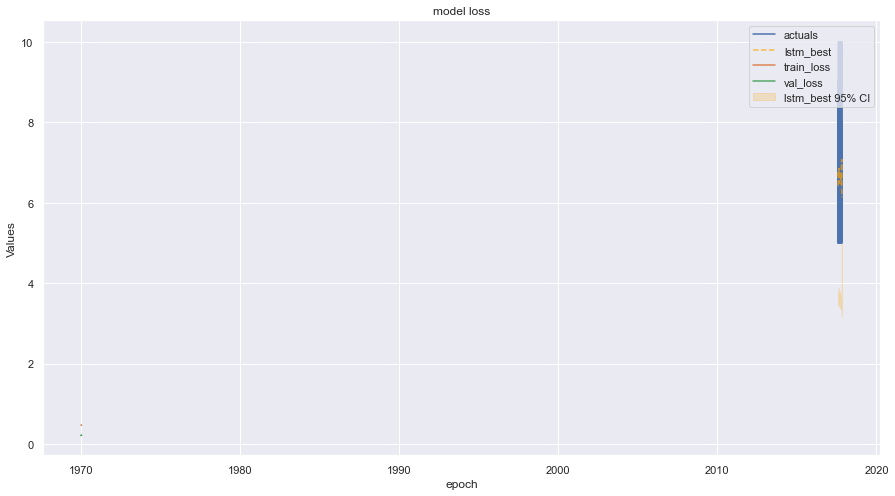

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.7487 - val_loss: 0.3380
Epoch 2/15
1/1 [==============================] - 1s 538ms/step - loss: 0.7383 - val_loss: 0.3435
Epoch 3/15
1/1 [==============================] - 1s 524ms/step - loss: 0.7289 - val_loss: 0.3516
Epoch 4/15
1/1 [==============================] - 0s 500ms/step - loss: 0.7152 - val_loss: 0.3649
Epoch 5/15
1/1 [==============================] - 1s 525ms/step - loss: 0.6939 - val_loss: 0.3863
Epoch 6/15
1/1 [==============================] - 1s 624ms/step - loss: 0.6601 - val_loss: 0.4210
Epoch 7/15
1/1 [==============================] - 1s 581ms/step - loss: 0.6070 - val_loss: 0.4752
Epoch 8/15
1/1 [==============================] - 1s 519ms/step - loss: 0.5265 - val_loss: 0.5633
Epoch 9/15
1/1 [==============================] - 1s 501ms/step - loss: 0.4292 - val_loss: 0.6918
Epoch 10/15
1/1 [==============================] - 0s 485ms/step - loss: 0.4546 - val_loss: 0.7378
Epoch 11/15
1/1 [===

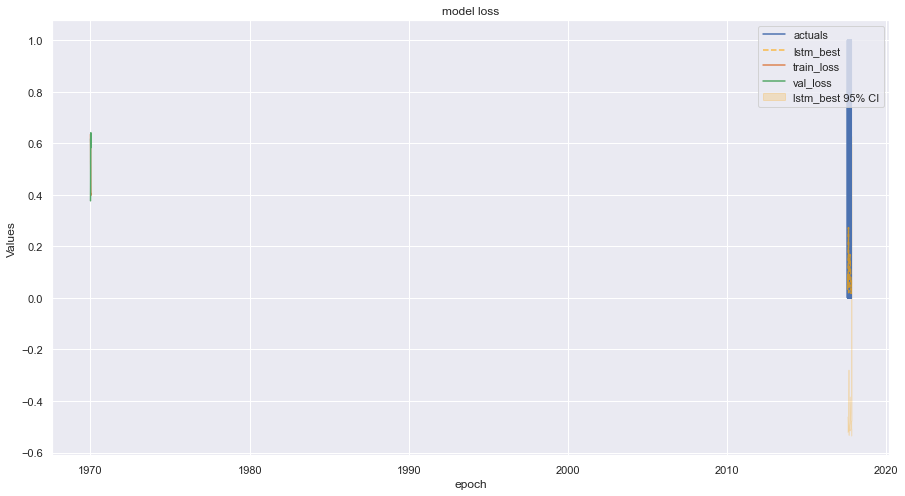

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.6483 - val_loss: 0.5940
Epoch 2/15
1/1 [==============================] - 1s 504ms/step - loss: 0.6304 - val_loss: 0.5781
Epoch 3/15
1/1 [==============================] - 0s 485ms/step - loss: 0.6113 - val_loss: 0.5554
Epoch 4/15
1/1 [==============================] - 1s 517ms/step - loss: 0.5836 - val_loss: 0.5204
Epoch 5/15
1/1 [==============================] - 1s 532ms/step - loss: 0.5407 - val_loss: 0.4727
Epoch 6/15
1/1 [==============================] - 1s 513ms/step - loss: 0.4805 - val_loss: 0.4177
Epoch 7/15
1/1 [==============================] - 0s 498ms/step - loss: 0.4175 - val_loss: 0.3968
Epoch 8/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3879 - val_loss: 0.4079
Epoch 9/15
1/1 [==============================] - 0s 485ms/step - loss: 0.3843 - val_loss: 0.4081
Epoch 10/15
1/1 [==============================] - 1s 640ms/step - loss: 0.3805 - val_loss: 0.3907
Epoch 11/15
1/1 [===

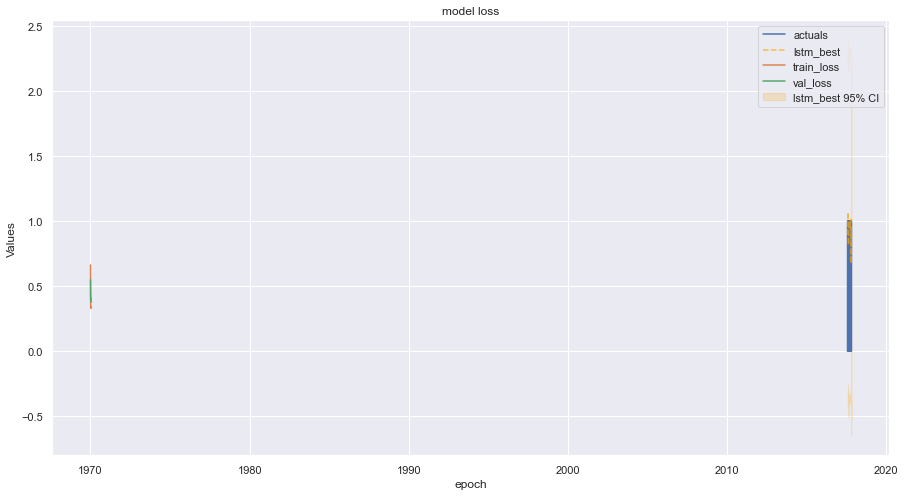

Epoch 1/15
1/1 [==============================] - 13s 13s/step - loss: 0.5313 - val_loss: 0.5224
Epoch 2/15
1/1 [==============================] - 1s 581ms/step - loss: 0.4952 - val_loss: 0.4870
Epoch 3/15
1/1 [==============================] - 1s 512ms/step - loss: 0.4508 - val_loss: 0.4412
Epoch 4/15
1/1 [==============================] - 0s 476ms/step - loss: 0.3941 - val_loss: 0.3924
Epoch 5/15
1/1 [==============================] - 0s 480ms/step - loss: 0.3248 - val_loss: 0.3369
Epoch 6/15
1/1 [==============================] - 0s 467ms/step - loss: 0.2727 - val_loss: 0.3072
Epoch 7/15
1/1 [==============================] - 1s 563ms/step - loss: 0.2771 - val_loss: 0.2930
Epoch 8/15
1/1 [==============================] - 1s 562ms/step - loss: 0.2657 - val_loss: 0.2776
Epoch 9/15
1/1 [==============================] - 1s 552ms/step - loss: 0.2465 - val_loss: 0.2737
Epoch 10/15
1/1 [==============================] - 1s 551ms/step - loss: 0.2330 - val_loss: 0.2863
Epoch 11/15
1/1 [===

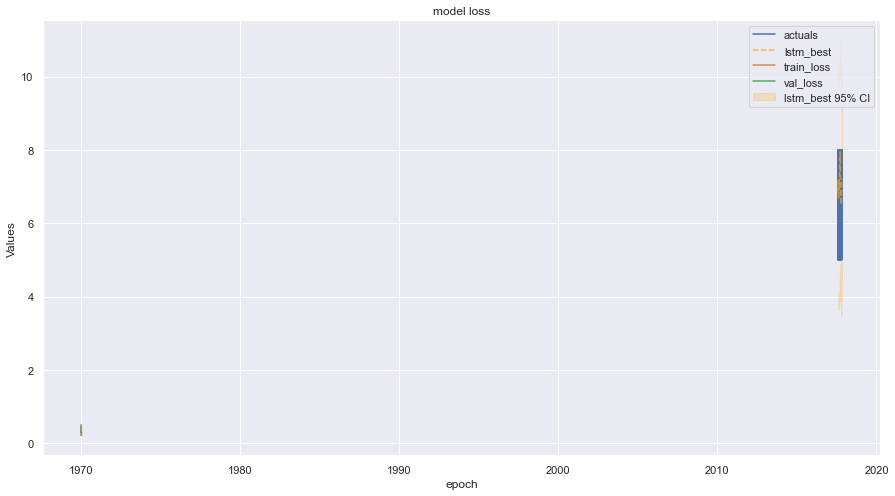

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4476 - val_loss: 0.5449
Epoch 2/15
1/1 [==============================] - 1s 517ms/step - loss: 0.4368 - val_loss: 0.5346
Epoch 3/15
1/1 [==============================] - 0s 489ms/step - loss: 0.4278 - val_loss: 0.5199
Epoch 4/15
1/1 [==============================] - 0s 436ms/step - loss: 0.4147 - val_loss: 0.4959
Epoch 5/15
1/1 [==============================] - 0s 445ms/step - loss: 0.3933 - val_loss: 0.4564
Epoch 6/15
1/1 [==============================] - 0s 442ms/step - loss: 0.3576 - val_loss: 0.4061
Epoch 7/15
1/1 [==============================] - 0s 433ms/step - loss: 0.3381 - val_loss: 0.3824
Epoch 8/15
1/1 [==============================] - 0s 441ms/step - loss: 0.3460 - val_loss: 0.3749
Epoch 9/15
1/1 [==============================] - 0s 443ms/step - loss: 0.3297 - val_loss: 0.3724
Epoch 10/15
1/1 [==============================] - 0s 456ms/step - loss: 0.3054 - val_loss: 0.3866
Epoch 11/15
1/1 [===

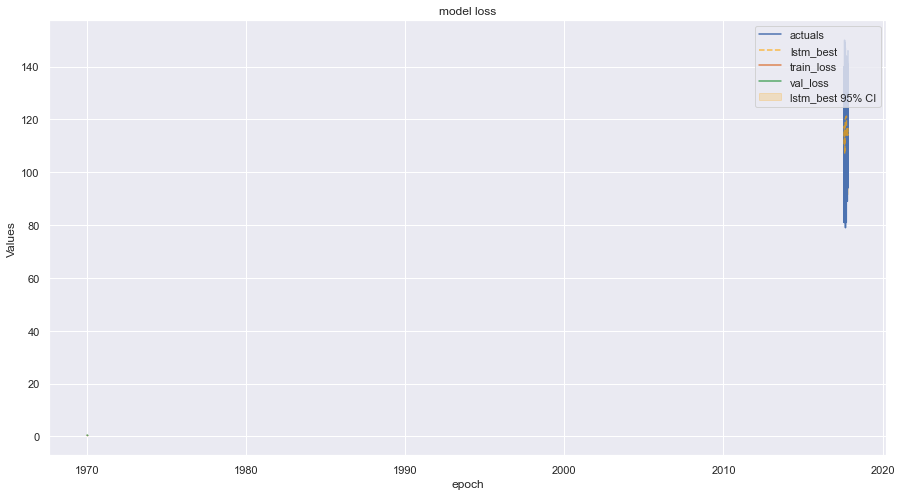

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5279 - val_loss: 0.3624
Epoch 2/15
1/1 [==============================] - 0s 462ms/step - loss: 0.5097 - val_loss: 0.3480
Epoch 3/15
1/1 [==============================] - 0s 465ms/step - loss: 0.4875 - val_loss: 0.3260
Epoch 4/15
1/1 [==============================] - 0s 494ms/step - loss: 0.4540 - val_loss: 0.3064
Epoch 5/15
1/1 [==============================] - 0s 459ms/step - loss: 0.4063 - val_loss: 0.3059
Epoch 6/15
1/1 [==============================] - 0s 455ms/step - loss: 0.3592 - val_loss: 0.3494
Epoch 7/15
1/1 [==============================] - 1s 514ms/step - loss: 0.3354 - val_loss: 0.4104
Epoch 8/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3399 - val_loss: 0.4219
Epoch 9/15
1/1 [==============================] - 0s 459ms/step - loss: 0.3296 - val_loss: 0.3953
Epoch 10/15
1/1 [==============================] - 0s 432ms/step - loss: 0.3122 - val_loss: 0.3644
Epoch 11/15
1/1 [===

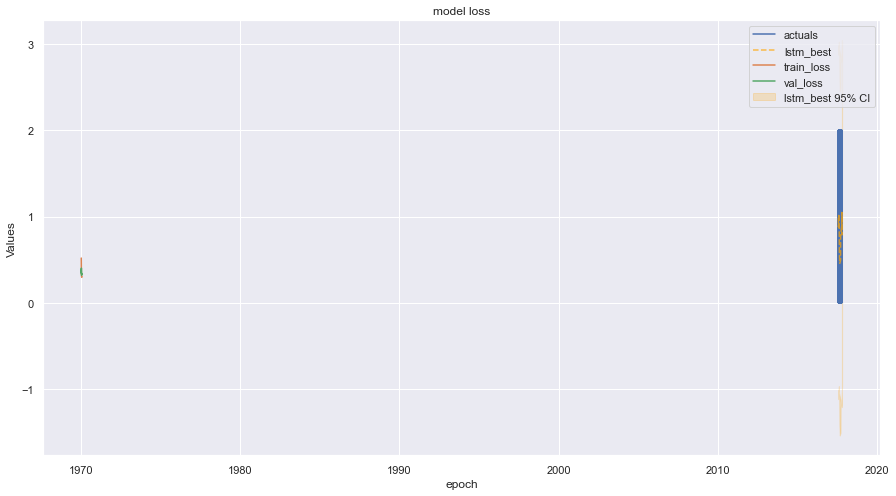

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4339 - val_loss: 0.4158
Epoch 2/15
1/1 [==============================] - 1s 548ms/step - loss: 0.4119 - val_loss: 0.3974
Epoch 3/15
1/1 [==============================] - 1s 533ms/step - loss: 0.3843 - val_loss: 0.3697
Epoch 4/15
1/1 [==============================] - 0s 471ms/step - loss: 0.3487 - val_loss: 0.3350
Epoch 5/15
1/1 [==============================] - 0s 468ms/step - loss: 0.3212 - val_loss: 0.3078
Epoch 6/15
1/1 [==============================] - 0s 499ms/step - loss: 0.3116 - val_loss: 0.3235
Epoch 7/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3296 - val_loss: 0.3235
Epoch 8/15
1/1 [==============================] - 1s 524ms/step - loss: 0.3292 - val_loss: 0.3116
Epoch 9/15
1/1 [==============================] - 1s 515ms/step - loss: 0.3186 - val_loss: 0.3089
Epoch 10/15
1/1 [==============================] - 1s 505ms/step - loss: 0.3106 - val_loss: 0.3155
Epoch 11/15
1/1 [===

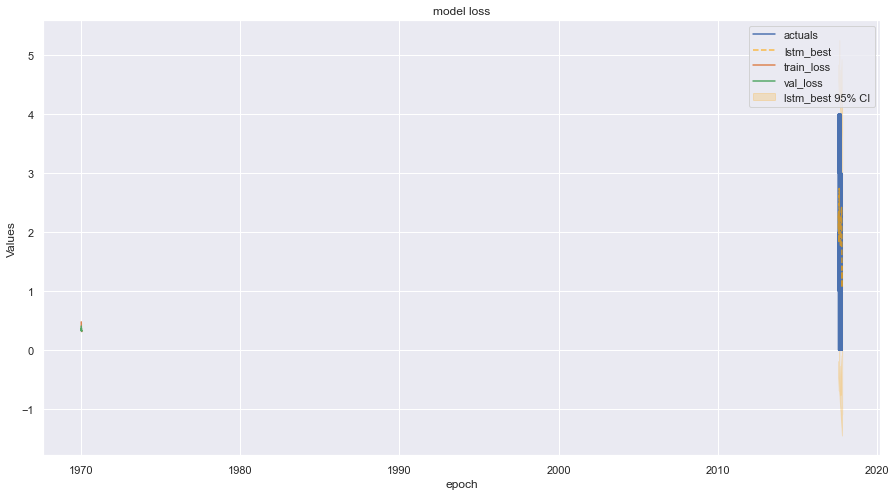

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4449 - val_loss: 0.4054
Epoch 2/15
1/1 [==============================] - 0s 457ms/step - loss: 0.4231 - val_loss: 0.3757
Epoch 3/15
1/1 [==============================] - 0s 461ms/step - loss: 0.3941 - val_loss: 0.3327
Epoch 4/15
1/1 [==============================] - 0s 449ms/step - loss: 0.3493 - val_loss: 0.2913
Epoch 5/15
1/1 [==============================] - 0s 462ms/step - loss: 0.2944 - val_loss: 0.2983
Epoch 6/15
1/1 [==============================] - 0s 460ms/step - loss: 0.2737 - val_loss: 0.3231
Epoch 7/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2794 - val_loss: 0.3155
Epoch 8/15
1/1 [==============================] - 1s 569ms/step - loss: 0.2659 - val_loss: 0.2898
Epoch 9/15
1/1 [==============================] - 1s 621ms/step - loss: 0.2449 - val_loss: 0.2702
Epoch 10/15
1/1 [==============================] - 1s 591ms/step - loss: 0.2421 - val_loss: 0.2662
Epoch 11/15
1/1 [===

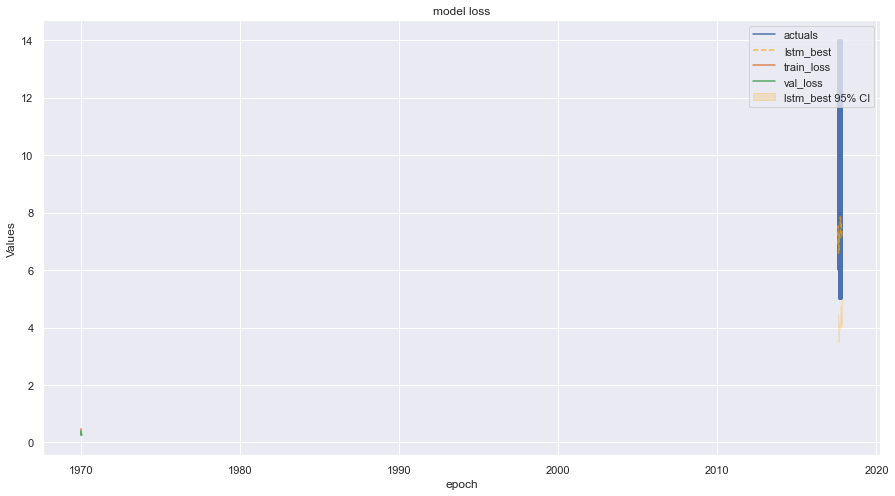

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4109 - val_loss: 0.4623
Epoch 2/15
1/1 [==============================] - 0s 464ms/step - loss: 0.4035 - val_loss: 0.4472
Epoch 3/15
1/1 [==============================] - 1s 524ms/step - loss: 0.3950 - val_loss: 0.4248
Epoch 4/15
1/1 [==============================] - 1s 510ms/step - loss: 0.3829 - val_loss: 0.3880
Epoch 5/15
1/1 [==============================] - 0s 469ms/step - loss: 0.3638 - val_loss: 0.3586
Epoch 6/15
1/1 [==============================] - 0s 441ms/step - loss: 0.3426 - val_loss: 0.3476
Epoch 7/15
1/1 [==============================] - 0s 452ms/step - loss: 0.3295 - val_loss: 0.3457
Epoch 8/15
1/1 [==============================] - 0s 445ms/step - loss: 0.3359 - val_loss: 0.3317
Epoch 9/15
1/1 [==============================] - 1s 555ms/step - loss: 0.3185 - val_loss: 0.3223
Epoch 10/15
1/1 [==============================] - 1s 588ms/step - loss: 0.3109 - val_loss: 0.3201
Epoch 11/15
1/1 [===

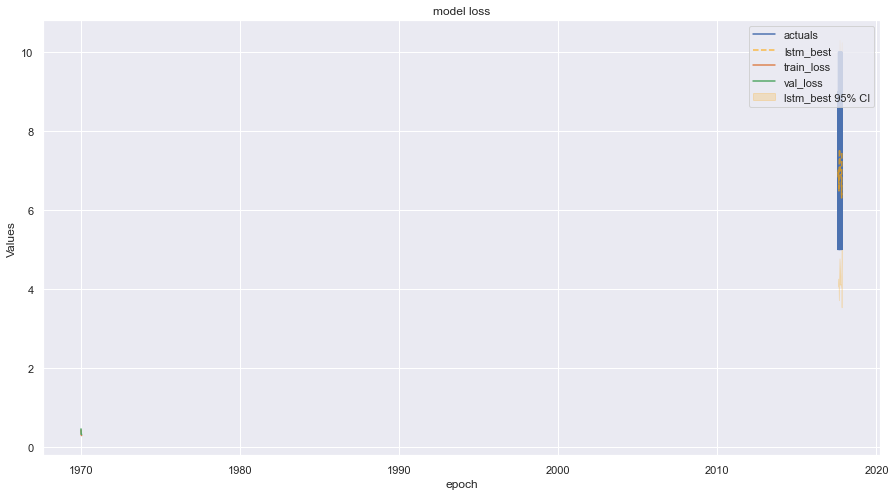

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.4499 - val_loss: 0.5577
Epoch 2/15
1/1 [==============================] - 0s 489ms/step - loss: 0.4195 - val_loss: 0.5248
Epoch 3/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3875 - val_loss: 0.4763
Epoch 4/15
1/1 [==============================] - 0s 472ms/step - loss: 0.3437 - val_loss: 0.4013
Epoch 5/15
1/1 [==============================] - 1s 514ms/step - loss: 0.2863 - val_loss: 0.3067
Epoch 6/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2441 - val_loss: 0.2287
Epoch 7/15
1/1 [==============================] - 1s 506ms/step - loss: 0.2540 - val_loss: 0.2074
Epoch 8/15
1/1 [==============================] - 1s 518ms/step - loss: 0.2545 - val_loss: 0.2053
Epoch 9/15
1/1 [==============================] - 1s 605ms/step - loss: 0.2333 - val_loss: 0.2368
Epoch 10/15
1/1 [==============================] - 1s 592ms/step - loss: 0.2198 - val_loss: 0.2760
Epoch 11/15
1/1 [===

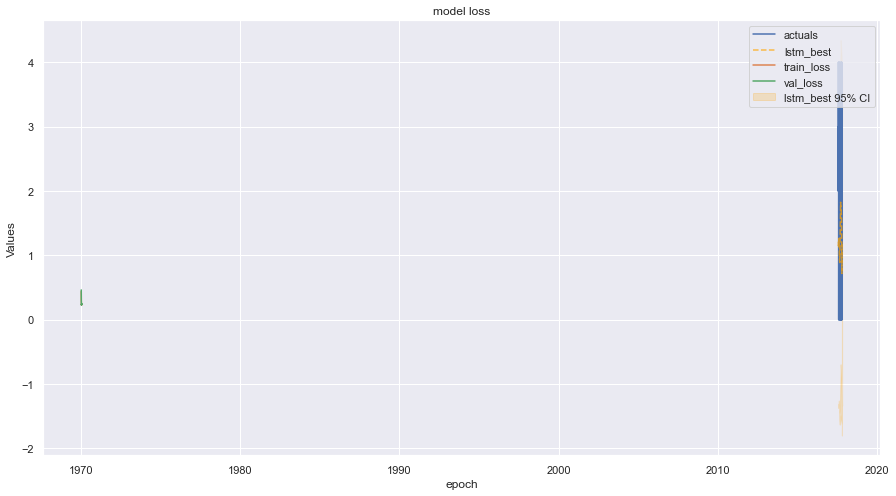

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.2860 - val_loss: 0.3940
Epoch 2/15
1/1 [==============================] - 1s 553ms/step - loss: 0.2788 - val_loss: 0.3920
Epoch 3/15
1/1 [==============================] - 0s 497ms/step - loss: 0.2783 - val_loss: 0.3916
Epoch 4/15
1/1 [==============================] - 0s 489ms/step - loss: 0.2788 - val_loss: 0.3917
Epoch 5/15
1/1 [==============================] - 0s 485ms/step - loss: 0.2790 - val_loss: 0.3921
Epoch 6/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2787 - val_loss: 0.3924
Epoch 7/15
1/1 [==============================] - 0s 477ms/step - loss: 0.2784 - val_loss: 0.3927
Epoch 8/15
1/1 [==============================] - 0s 484ms/step - loss: 0.2779 - val_loss: 0.3938
Epoch 9/15
1/1 [==============================] - 0s 472ms/step - loss: 0.2783 - val_loss: 0.3942
Epoch 10/15
1/1 [==============================] - 0s 487ms/step - loss: 0.2777 - val_loss: 0.3938
Epoch 11/15
1/1 [===

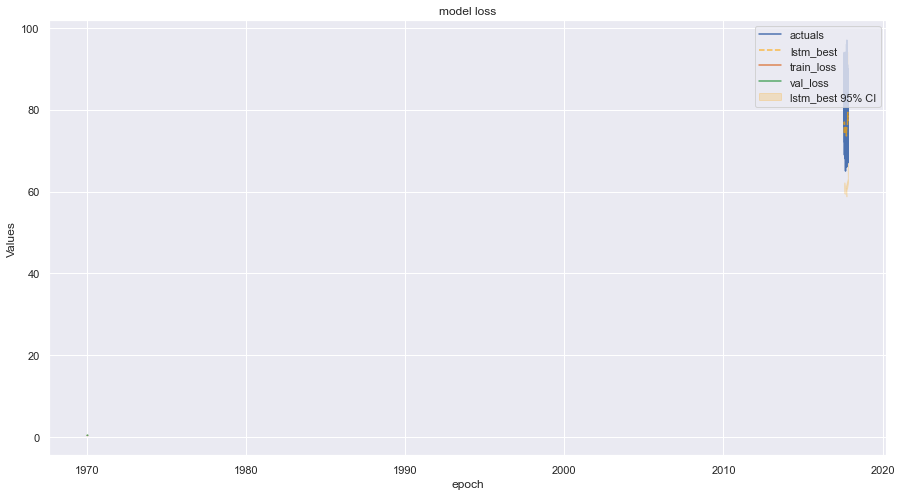

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.5187 - val_loss: 0.5384
Epoch 2/15
1/1 [==============================] - 0s 466ms/step - loss: 0.4888 - val_loss: 0.5060
Epoch 3/15
1/1 [==============================] - 1s 668ms/step - loss: 0.4547 - val_loss: 0.4614
Epoch 4/15
1/1 [==============================] - 1s 617ms/step - loss: 0.4113 - val_loss: 0.3962
Epoch 5/15
1/1 [==============================] - 1s 549ms/step - loss: 0.3574 - val_loss: 0.3147
Epoch 6/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3093 - val_loss: 0.2714
Epoch 7/15
1/1 [==============================] - 0s 479ms/step - loss: 0.3053 - val_loss: 0.2657
Epoch 8/15
1/1 [==============================] - 0s 484ms/step - loss: 0.3086 - val_loss: 0.2445
Epoch 9/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2903 - val_loss: 0.2260
Epoch 10/15
1/1 [==============================] - 1s 506ms/step - loss: 0.2625 - val_loss: 0.2306
Epoch 11/15
1/1 [===

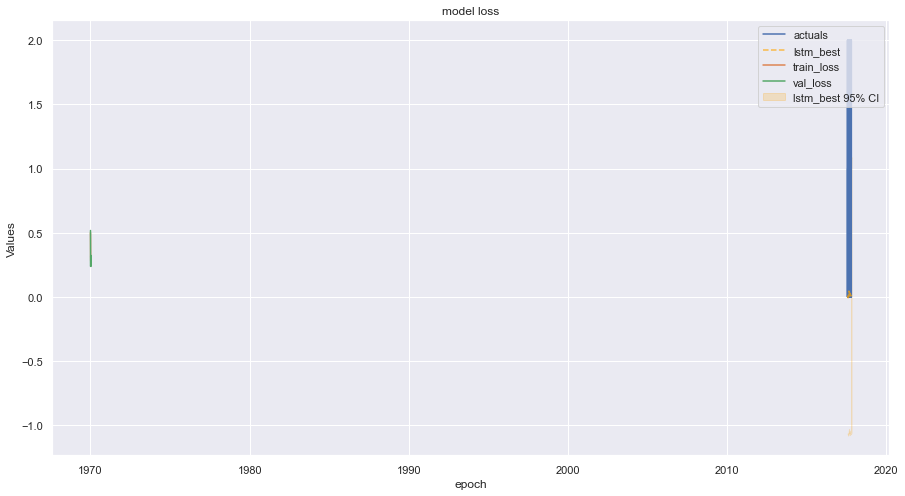

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.4749 - val_loss: 0.4201
Epoch 2/15
1/1 [==============================] - 1s 596ms/step - loss: 0.4515 - val_loss: 0.3975
Epoch 3/15
1/1 [==============================] - 1s 582ms/step - loss: 0.4229 - val_loss: 0.3670
Epoch 4/15
1/1 [==============================] - 1s 553ms/step - loss: 0.3839 - val_loss: 0.3334
Epoch 5/15
1/1 [==============================] - 1s 605ms/step - loss: 0.3415 - val_loss: 0.3070
Epoch 6/15
1/1 [==============================] - 1s 558ms/step - loss: 0.3190 - val_loss: 0.3219
Epoch 7/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3226 - val_loss: 0.3172
Epoch 8/15
1/1 [==============================] - 1s 654ms/step - loss: 0.3213 - val_loss: 0.3120
Epoch 9/15
1/1 [==============================] - 1s 610ms/step - loss: 0.3131 - val_loss: 0.3167
Epoch 10/15
1/1 [==============================] - 1s 557ms/step - loss: 0.3098 - val_loss: 0.3270
Epoch 11/15
1/1 [===

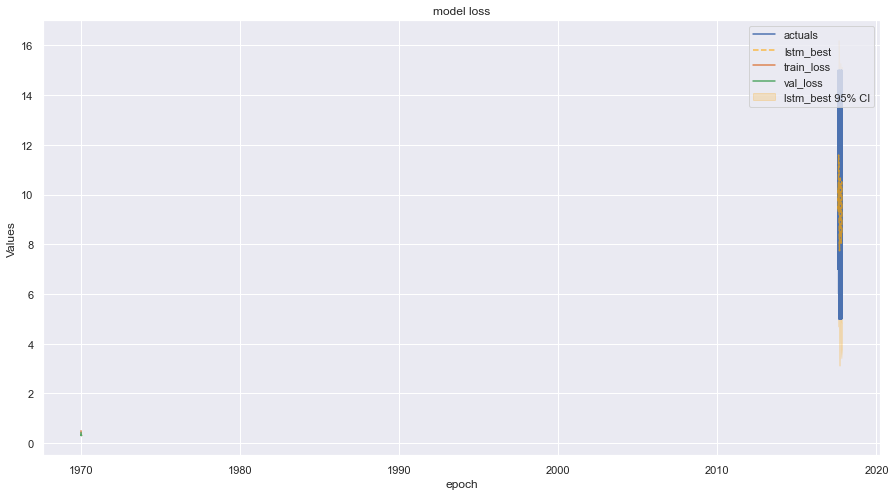

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5426 - val_loss: 0.4966
Epoch 2/15
1/1 [==============================] - 1s 507ms/step - loss: 0.5203 - val_loss: 0.4713
Epoch 3/15
1/1 [==============================] - 1s 511ms/step - loss: 0.4976 - val_loss: 0.4352
Epoch 4/15
1/1 [==============================] - 1s 507ms/step - loss: 0.4680 - val_loss: 0.3861
Epoch 5/15
1/1 [==============================] - 1s 507ms/step - loss: 0.4254 - val_loss: 0.3247
Epoch 6/15
1/1 [==============================] - 0s 449ms/step - loss: 0.3719 - val_loss: 0.2837
Epoch 7/15
1/1 [==============================] - 0s 488ms/step - loss: 0.3272 - val_loss: 0.3211
Epoch 8/15
1/1 [==============================] - 0s 484ms/step - loss: 0.3407 - val_loss: 0.3110
Epoch 9/15
1/1 [==============================] - 0s 483ms/step - loss: 0.3289 - val_loss: 0.2746
Epoch 10/15
1/1 [==============================] - 0s 485ms/step - loss: 0.3003 - val_loss: 0.2490
Epoch 11/15
1/1 [===

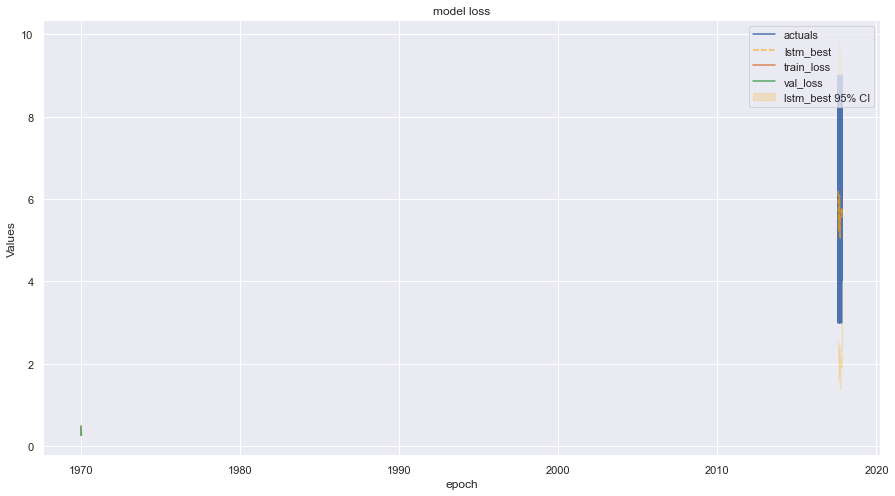

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4407 - val_loss: 0.4989
Epoch 2/15
1/1 [==============================] - 0s 498ms/step - loss: 0.4214 - val_loss: 0.4702
Epoch 3/15
1/1 [==============================] - 1s 507ms/step - loss: 0.3985 - val_loss: 0.4289
Epoch 4/15
1/1 [==============================] - 1s 516ms/step - loss: 0.3650 - val_loss: 0.3772
Epoch 5/15
1/1 [==============================] - 0s 491ms/step - loss: 0.3233 - val_loss: 0.3321
Epoch 6/15
1/1 [==============================] - 0s 496ms/step - loss: 0.2852 - val_loss: 0.3191
Epoch 7/15
1/1 [==============================] - 0s 483ms/step - loss: 0.2878 - val_loss: 0.3192
Epoch 8/15
1/1 [==============================] - 0s 489ms/step - loss: 0.2938 - val_loss: 0.3131
Epoch 9/15
1/1 [==============================] - 1s 548ms/step - loss: 0.2822 - val_loss: 0.3100
Epoch 10/15
1/1 [==============================] - 1s 662ms/step - loss: 0.2735 - val_loss: 0.3124
Epoch 11/15
1/1 [===

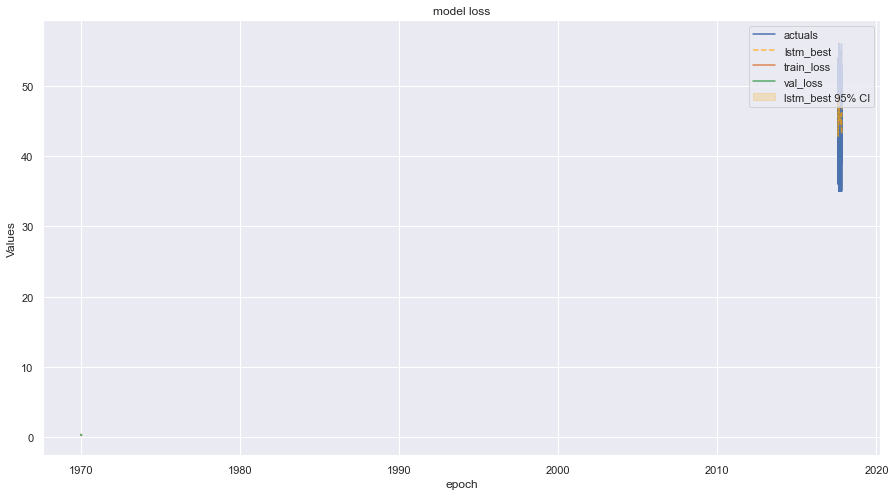

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.5610 - val_loss: 0.5068
Epoch 2/15
1/1 [==============================] - 0s 481ms/step - loss: 0.5356 - val_loss: 0.4806
Epoch 3/15
1/1 [==============================] - 1s 597ms/step - loss: 0.5067 - val_loss: 0.4430
Epoch 4/15
1/1 [==============================] - 1s 757ms/step - loss: 0.4683 - val_loss: 0.3805
Epoch 5/15
1/1 [==============================] - 1s 509ms/step - loss: 0.4168 - val_loss: 0.2911
Epoch 6/15
1/1 [==============================] - 1s 500ms/step - loss: 0.3605 - val_loss: 0.2482
Epoch 7/15
1/1 [==============================] - 0s 491ms/step - loss: 0.3374 - val_loss: 0.2722
Epoch 8/15
1/1 [==============================] - 1s 679ms/step - loss: 0.3446 - val_loss: 0.2590
Epoch 9/15
1/1 [==============================] - 1s 548ms/step - loss: 0.3270 - val_loss: 0.2227
Epoch 10/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3043 - val_loss: 0.1945
Epoch 11/15
1/1 [===

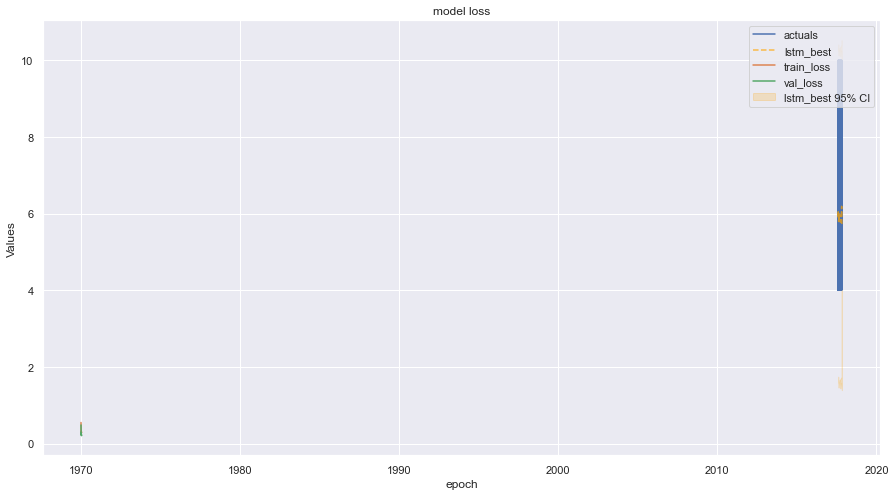

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4425 - val_loss: 0.5499
Epoch 2/15
1/1 [==============================] - 0s 462ms/step - loss: 0.4313 - val_loss: 0.5290
Epoch 3/15
1/1 [==============================] - 1s 534ms/step - loss: 0.4191 - val_loss: 0.4975
Epoch 4/15
1/1 [==============================] - 1s 515ms/step - loss: 0.4011 - val_loss: 0.4506
Epoch 5/15
1/1 [==============================] - 0s 486ms/step - loss: 0.3761 - val_loss: 0.3865
Epoch 6/15
1/1 [==============================] - 0s 481ms/step - loss: 0.3479 - val_loss: 0.3307
Epoch 7/15
1/1 [==============================] - 0s 462ms/step - loss: 0.3303 - val_loss: 0.3026
Epoch 8/15
1/1 [==============================] - 0s 483ms/step - loss: 0.3334 - val_loss: 0.2951
Epoch 9/15
1/1 [==============================] - 0s 453ms/step - loss: 0.3288 - val_loss: 0.3002
Epoch 10/15
1/1 [==============================] - 0s 467ms/step - loss: 0.3193 - val_loss: 0.3078
Epoch 11/15
1/1 [===

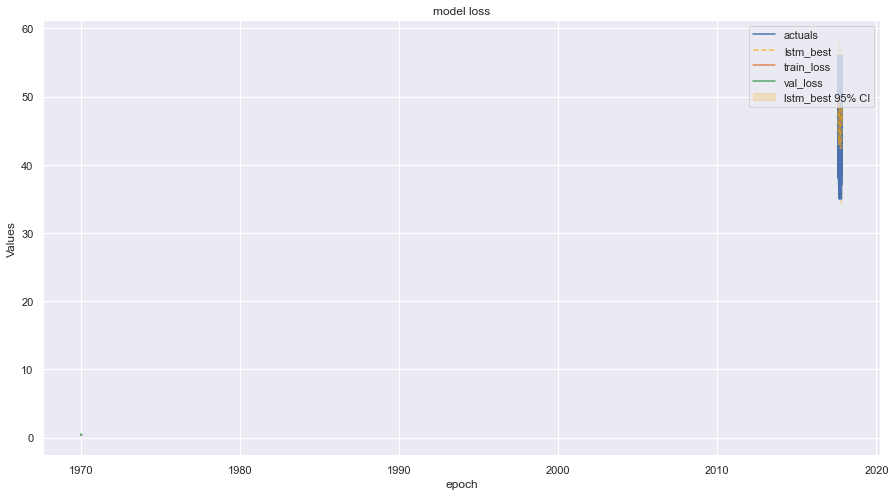

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.3749 - val_loss: 0.4550
Epoch 2/15
1/1 [==============================] - 0s 493ms/step - loss: 0.3591 - val_loss: 0.4436
Epoch 3/15
1/1 [==============================] - 0s 462ms/step - loss: 0.3414 - val_loss: 0.4273
Epoch 4/15
1/1 [==============================] - 0s 478ms/step - loss: 0.3164 - val_loss: 0.4032
Epoch 5/15
1/1 [==============================] - 0s 459ms/step - loss: 0.2868 - val_loss: 0.3776
Epoch 6/15
1/1 [==============================] - 0s 463ms/step - loss: 0.2659 - val_loss: 0.3703
Epoch 7/15
1/1 [==============================] - 0s 455ms/step - loss: 0.2676 - val_loss: 0.3746
Epoch 8/15
1/1 [==============================] - 0s 485ms/step - loss: 0.2684 - val_loss: 0.3800
Epoch 9/15
1/1 [==============================] - 1s 513ms/step - loss: 0.2648 - val_loss: 0.3840
Epoch 10/15
1/1 [==============================] - 0s 496ms/step - loss: 0.2600 - val_loss: 0.3847
Epoch 11/15
1/1 [===

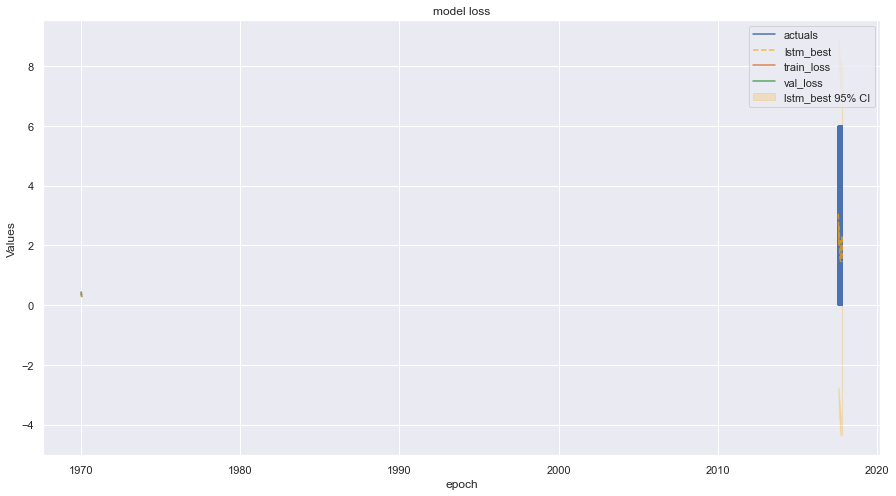

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.4303 - val_loss: 0.4074
Epoch 2/15
1/1 [==============================] - 1s 607ms/step - loss: 0.4071 - val_loss: 0.3795
Epoch 3/15
1/1 [==============================] - 1s 542ms/step - loss: 0.3824 - val_loss: 0.3451
Epoch 4/15
1/1 [==============================] - 0s 498ms/step - loss: 0.3500 - val_loss: 0.3074
Epoch 5/15
1/1 [==============================] - 0s 471ms/step - loss: 0.3078 - val_loss: 0.2853
Epoch 6/15
1/1 [==============================] - 0s 467ms/step - loss: 0.2640 - val_loss: 0.2919
Epoch 7/15
1/1 [==============================] - 0s 492ms/step - loss: 0.2557 - val_loss: 0.3077
Epoch 8/15
1/1 [==============================] - 0s 463ms/step - loss: 0.2711 - val_loss: 0.3023
Epoch 9/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2587 - val_loss: 0.2931
Epoch 10/15
1/1 [==============================] - 0s 468ms/step - loss: 0.2386 - val_loss: 0.2856
Epoch 11/15
1/1 [=====

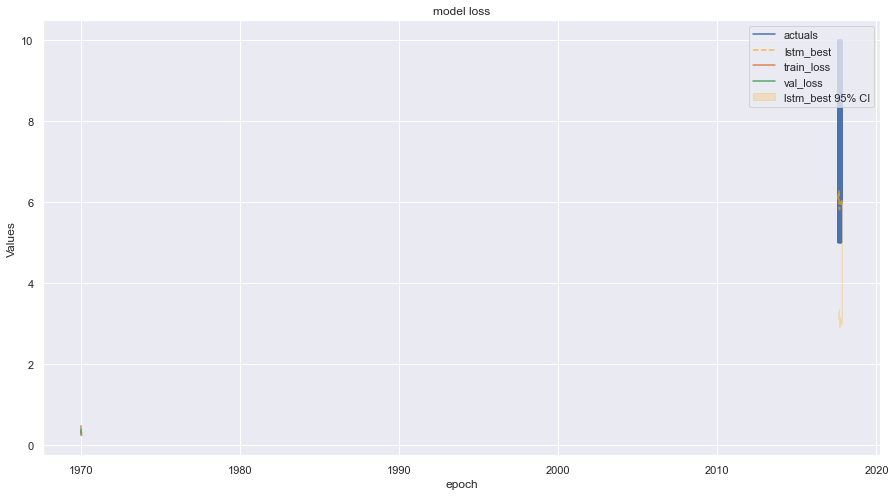

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5571 - val_loss: 0.6592
Epoch 2/15
1/1 [==============================] - 0s 464ms/step - loss: 0.5371 - val_loss: 0.6455
Epoch 3/15
1/1 [==============================] - 0s 479ms/step - loss: 0.5139 - val_loss: 0.6258
Epoch 4/15
1/1 [==============================] - 1s 507ms/step - loss: 0.4807 - val_loss: 0.5945
Epoch 5/15
1/1 [==============================] - 1s 546ms/step - loss: 0.4312 - val_loss: 0.5526
Epoch 6/15
1/1 [==============================] - 0s 500ms/step - loss: 0.3852 - val_loss: 0.4986
Epoch 7/15
1/1 [==============================] - 0s 453ms/step - loss: 0.3602 - val_loss: 0.4501
Epoch 8/15
1/1 [==============================] - 0s 451ms/step - loss: 0.3709 - val_loss: 0.4320
Epoch 9/15
1/1 [==============================] - 0s 462ms/step - loss: 0.3564 - val_loss: 0.4345
Epoch 10/15
1/1 [==============================] - 0s 460ms/step - loss: 0.3277 - val_loss: 0.4466
Epoch 11/15
1/1 [===

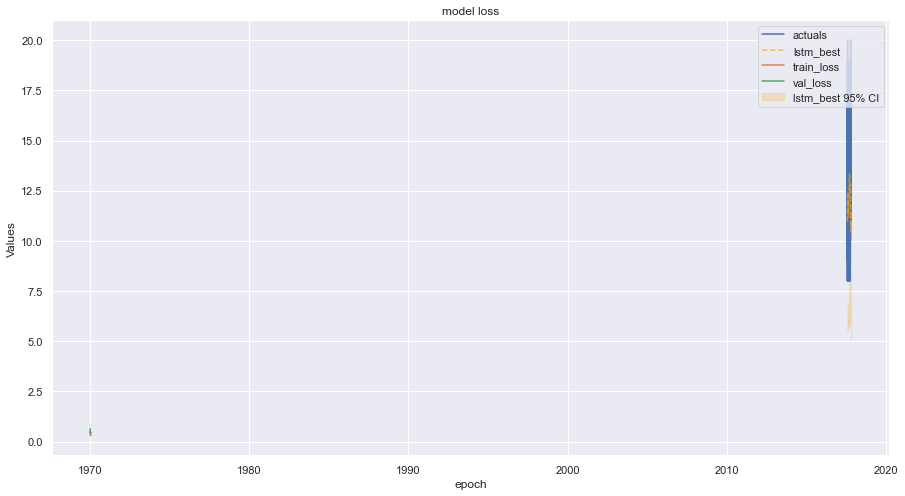

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.6222 - val_loss: 0.4069
Epoch 2/15
1/1 [==============================] - 0s 442ms/step - loss: 0.6047 - val_loss: 0.3813
Epoch 3/15
1/1 [==============================] - 0s 456ms/step - loss: 0.5806 - val_loss: 0.3440
Epoch 4/15
1/1 [==============================] - 0s 426ms/step - loss: 0.5434 - val_loss: 0.3077
Epoch 5/15
1/1 [==============================] - 0s 449ms/step - loss: 0.4872 - val_loss: 0.3091
Epoch 6/15
1/1 [==============================] - 0s 433ms/step - loss: 0.4202 - val_loss: 0.3721
Epoch 7/15
1/1 [==============================] - 0s 415ms/step - loss: 0.3718 - val_loss: 0.4504
Epoch 8/15
1/1 [==============================] - 1s 503ms/step - loss: 0.3795 - val_loss: 0.4556
Epoch 9/15
1/1 [==============================] - 0s 477ms/step - loss: 0.3646 - val_loss: 0.4332
Epoch 10/15
1/1 [==============================] - 0s 460ms/step - loss: 0.3379 - val_loss: 0.3972
Epoch 11/15
1/1 [===

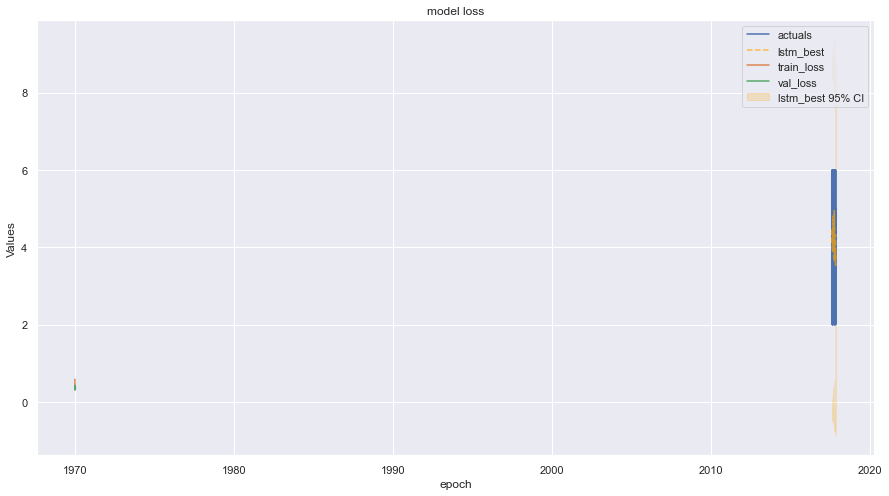

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.3584 - val_loss: 0.4144
Epoch 2/15
1/1 [==============================] - 1s 514ms/step - loss: 0.3508 - val_loss: 0.4114
Epoch 3/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3479 - val_loss: 0.4095
Epoch 4/15
1/1 [==============================] - 1s 550ms/step - loss: 0.3446 - val_loss: 0.4087
Epoch 5/15
1/1 [==============================] - 1s 507ms/step - loss: 0.3405 - val_loss: 0.4082
Epoch 6/15
1/1 [==============================] - 0s 470ms/step - loss: 0.3342 - val_loss: 0.4073
Epoch 7/15
1/1 [==============================] - 0s 476ms/step - loss: 0.3242 - val_loss: 0.4111
Epoch 8/15
1/1 [==============================] - 0s 479ms/step - loss: 0.3114 - val_loss: 0.4206
Epoch 9/15
1/1 [==============================] - 0s 476ms/step - loss: 0.3200 - val_loss: 0.4051
Epoch 10/15
1/1 [==============================] - 0s 457ms/step - loss: 0.3186 - val_loss: 0.3829
Epoch 11/15
1/1 [===

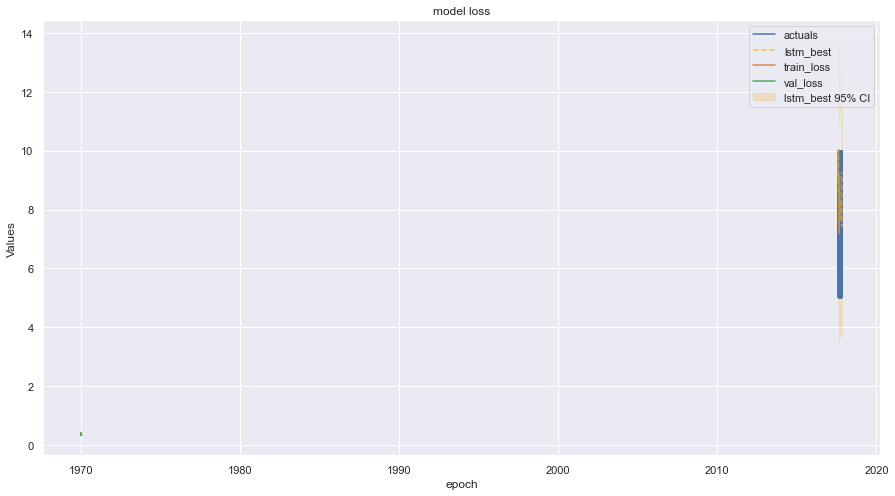

Epoch 1/15
1/1 [==============================] - 9s 9s/step - loss: 0.4924 - val_loss: 0.5384
Epoch 2/15
1/1 [==============================] - 0s 446ms/step - loss: 0.4678 - val_loss: 0.5135
Epoch 3/15
1/1 [==============================] - 0s 432ms/step - loss: 0.4406 - val_loss: 0.4801
Epoch 4/15
1/1 [==============================] - 0s 438ms/step - loss: 0.4045 - val_loss: 0.4329
Epoch 5/15
1/1 [==============================] - 0s 454ms/step - loss: 0.3569 - val_loss: 0.3753
Epoch 6/15
1/1 [==============================] - 0s 439ms/step - loss: 0.3031 - val_loss: 0.3278
Epoch 7/15
1/1 [==============================] - 0s 449ms/step - loss: 0.2887 - val_loss: 0.3167
Epoch 8/15
1/1 [==============================] - 0s 456ms/step - loss: 0.2946 - val_loss: 0.3025
Epoch 9/15
1/1 [==============================] - 0s 443ms/step - loss: 0.2754 - val_loss: 0.2958
Epoch 10/15
1/1 [==============================] - 1s 501ms/step - loss: 0.2533 - val_loss: 0.3028
Epoch 11/15
1/1 [=====

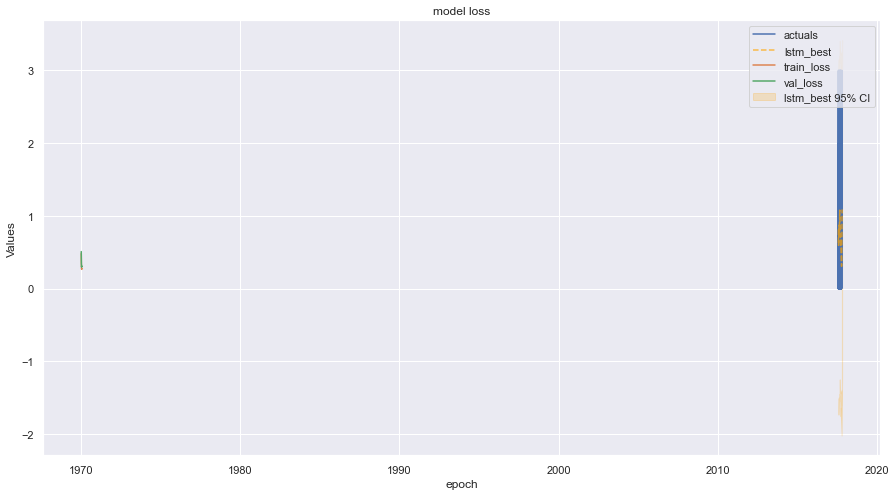

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.4285 - val_loss: 0.4758
Epoch 2/15
1/1 [==============================] - 0s 476ms/step - loss: 0.4091 - val_loss: 0.4488
Epoch 3/15
1/1 [==============================] - 1s 527ms/step - loss: 0.3872 - val_loss: 0.4087
Epoch 4/15
1/1 [==============================] - 1s 549ms/step - loss: 0.3592 - val_loss: 0.3553
Epoch 5/15
1/1 [==============================] - 1s 586ms/step - loss: 0.3233 - val_loss: 0.2908
Epoch 6/15
1/1 [==============================] - 1s 554ms/step - loss: 0.2908 - val_loss: 0.2433
Epoch 7/15
1/1 [==============================] - 1s 569ms/step - loss: 0.2806 - val_loss: 0.2112
Epoch 8/15
1/1 [==============================] - 1s 698ms/step - loss: 0.2732 - val_loss: 0.1962
Epoch 9/15
1/1 [==============================] - 1s 638ms/step - loss: 0.2628 - val_loss: 0.2076
Epoch 10/15
1/1 [==============================] - 1s 632ms/step - loss: 0.2567 - val_loss: 0.2302
Epoch 11/15
1/1 [===

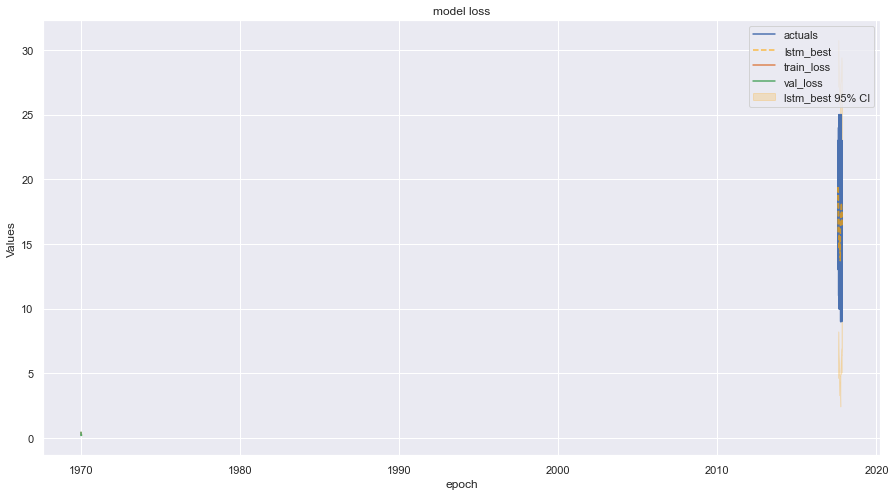

Epoch 1/15
1/1 [==============================] - 14s 14s/step - loss: 0.4090 - val_loss: 0.4282
Epoch 2/15
1/1 [==============================] - 1s 839ms/step - loss: 0.4062 - val_loss: 0.4239
Epoch 3/15
1/1 [==============================] - 1s 746ms/step - loss: 0.4025 - val_loss: 0.4195
Epoch 4/15
1/1 [==============================] - 0s 447ms/step - loss: 0.4001 - val_loss: 0.4139
Epoch 5/15
1/1 [==============================] - 0s 496ms/step - loss: 0.3969 - val_loss: 0.4062
Epoch 6/15
1/1 [==============================] - 1s 521ms/step - loss: 0.3927 - val_loss: 0.3950
Epoch 7/15
1/1 [==============================] - 1s 565ms/step - loss: 0.3852 - val_loss: 0.3776
Epoch 8/15
1/1 [==============================] - 1s 597ms/step - loss: 0.3739 - val_loss: 0.3501
Epoch 9/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3557 - val_loss: 0.3697
Epoch 10/15
1/1 [==============================] - 1s 731ms/step - loss: 0.3787 - val_loss: 0.3515
Epoch 11/15
1/1 [===

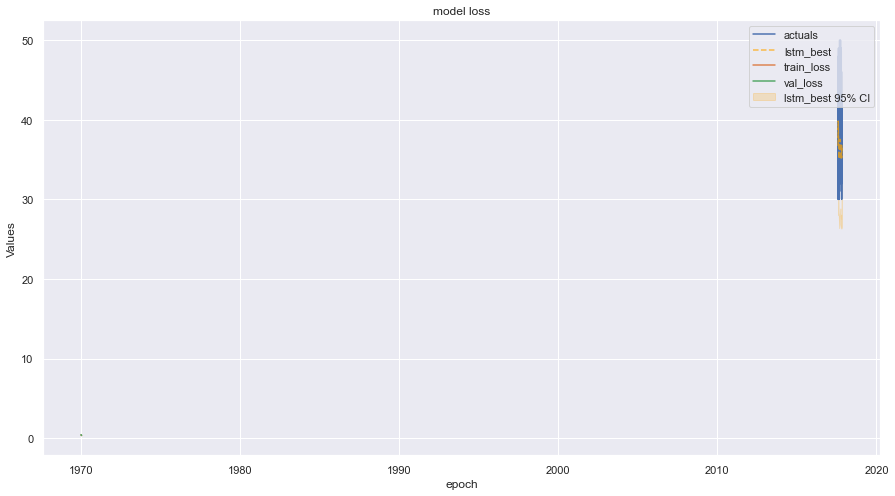

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 0.5517 - val_loss: 0.4573
Epoch 2/15
1/1 [==============================] - 1s 594ms/step - loss: 0.5306 - val_loss: 0.4363
Epoch 3/15
1/1 [==============================] - 1s 818ms/step - loss: 0.5038 - val_loss: 0.4071
Epoch 4/15
1/1 [==============================] - 1s 762ms/step - loss: 0.4624 - val_loss: 0.3634
Epoch 5/15
1/1 [==============================] - 1s 586ms/step - loss: 0.3979 - val_loss: 0.3117
Epoch 6/15
1/1 [==============================] - 1s 506ms/step - loss: 0.3173 - val_loss: 0.3222
Epoch 7/15
1/1 [==============================] - 1s 529ms/step - loss: 0.2673 - val_loss: 0.3687
Epoch 8/15
1/1 [==============================] - 1s 665ms/step - loss: 0.2798 - val_loss: 0.3796
Epoch 9/15
1/1 [==============================] - 1s 652ms/step - loss: 0.2837 - val_loss: 0.3592
Epoch 10/15
1/1 [==============================] - 1s 825ms/step - loss: 0.2699 - val_loss: 0.3312
Epoch 11/15
1/1 [===

KeyboardInterrupt: 

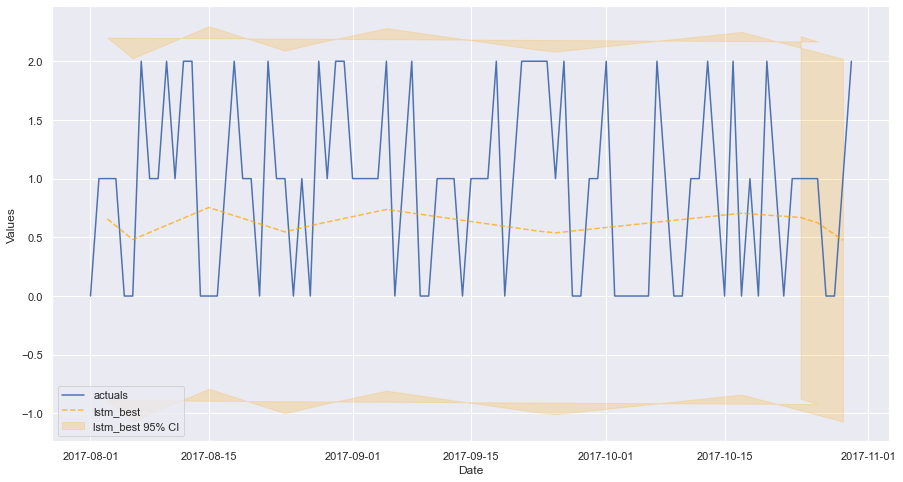

In [374]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})
df = pd.read_csv('CBD poi.csv',parse_dates=['date'])
df.sort_index(inplace=True)


df[['date']] = df[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[5:7],s[8:], s[0:4]))
mydate = df[['date']]    

def myfun(poi_data):
#     print('Column Contents: ', poi_data)
    df = pd.DataFrame(poi_data, columns = ['poi'])
    dataframe = pd.concat([mydate,df], axis=1, join='inner')
#     print(dataframe)
    f = Forecaster(y=dataframe['poi'],
                   current_dates=dataframe['date'].apply(str))
    stat, pval, _, _, _, _ = f.adf_test(full_res=True)
    f.set_test_length(12)       # 1. 12 observations to test the results
    f.generate_future_dates(12) # 2. 12 future points to forecast
    f.set_estimator('lstm')     # 3. LSTM neural network
    f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=2,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
    f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
    
    
for i in range(df.shape[1]):
    poi = df.iloc[: , i+1]
    myfun(poi.values)
#     print('Column Contents: ', poi.values)


Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5181 - val_loss: 0.6284
Epoch 2/2
1/1 [==============================] - 0s 475ms/step - loss: 0.4881 - val_loss: 0.6002
Epoch 1/2
2/2 [==============================] - 10s 2s/step - loss: 0.5089 - val_loss: 0.5720
Epoch 2/2
2/2 [==============================] - 1s 367ms/step - loss: 0.4483 - val_loss: 0.4672


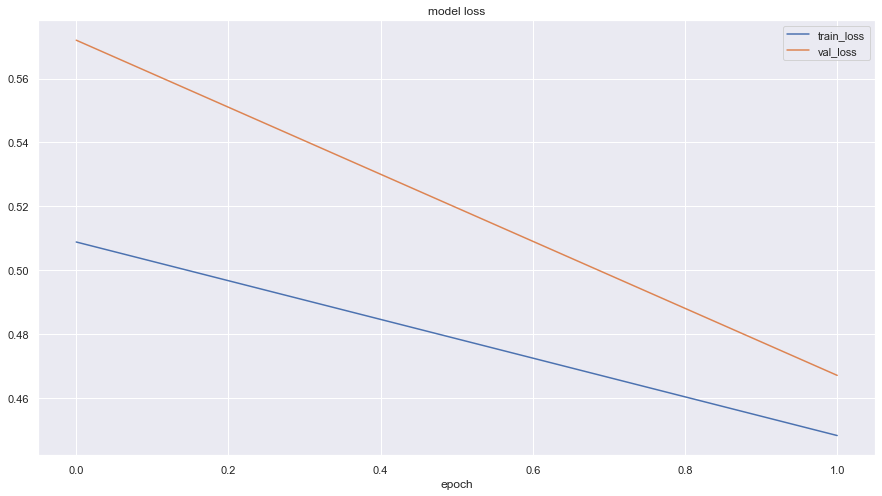

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5332 - val_loss: 0.4352
Epoch 2/2
1/1 [==============================] - 1s 553ms/step - loss: 0.5097 - val_loss: 0.4085
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4747 - val_loss: 0.4191
Epoch 2/2
2/2 [==============================] - 1s 360ms/step - loss: 0.4304 - val_loss: 0.3517


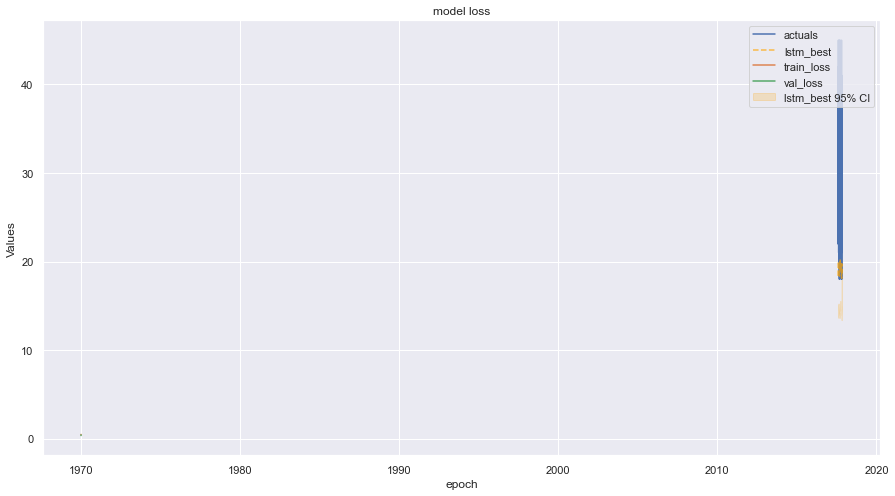

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5525 - val_loss: 0.5345
Epoch 2/2
1/1 [==============================] - 0s 495ms/step - loss: 0.5113 - val_loss: 0.4987
Epoch 1/2
2/2 [==============================] - 11s 2s/step - loss: 0.4913 - val_loss: 0.5286
Epoch 2/2
2/2 [==============================] - 1s 387ms/step - loss: 0.4259 - val_loss: 0.4386


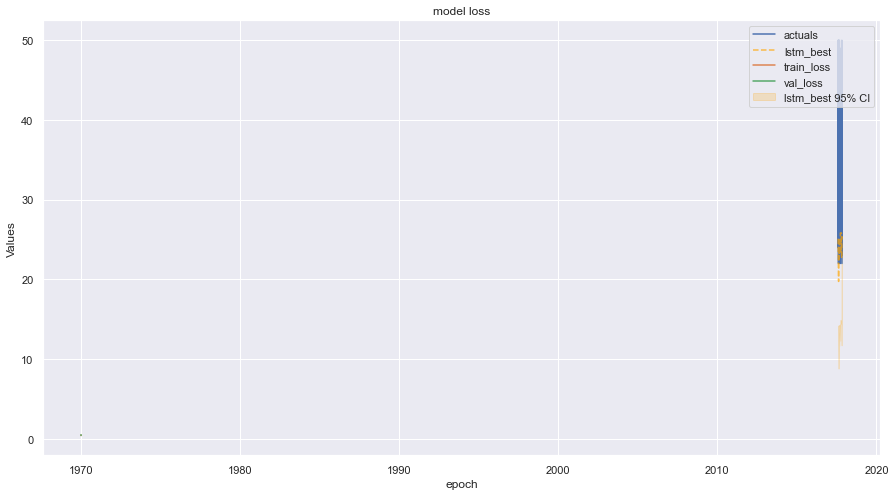

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.5341 - val_loss: 0.5808
Epoch 2/2
1/1 [==============================] - 1s 531ms/step - loss: 0.5132 - val_loss: 0.5610
Epoch 1/2
2/2 [==============================] - 11s 2s/step - loss: 0.5049 - val_loss: 0.5472
Epoch 2/2
2/2 [==============================] - 1s 370ms/step - loss: 0.4517 - val_loss: 0.4609


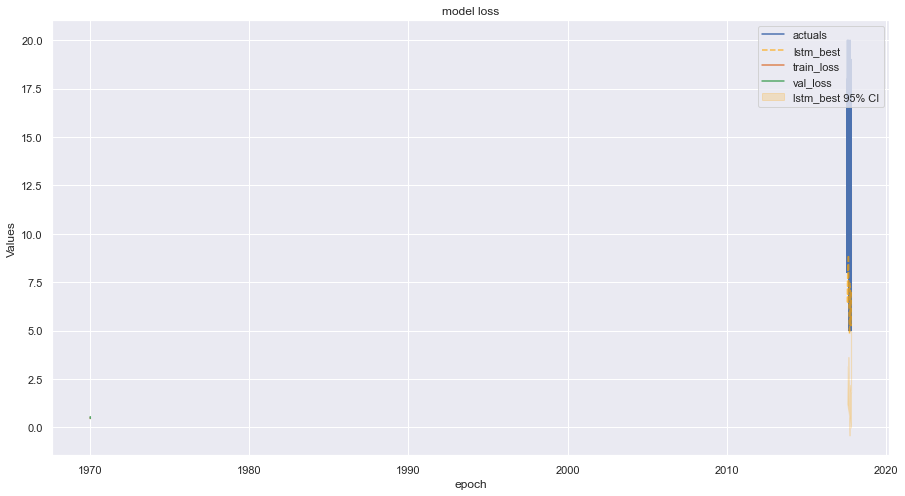

Epoch 1/2
1/1 [==============================] - 9s 9s/step - loss: 0.6189 - val_loss: 0.5691
Epoch 2/2
1/1 [==============================] - 1s 601ms/step - loss: 0.5934 - val_loss: 0.5387
Epoch 1/2
2/2 [==============================] - 12s 3s/step - loss: 0.5881 - val_loss: 0.5541
Epoch 2/2
2/2 [==============================] - 1s 393ms/step - loss: 0.5481 - val_loss: 0.4966


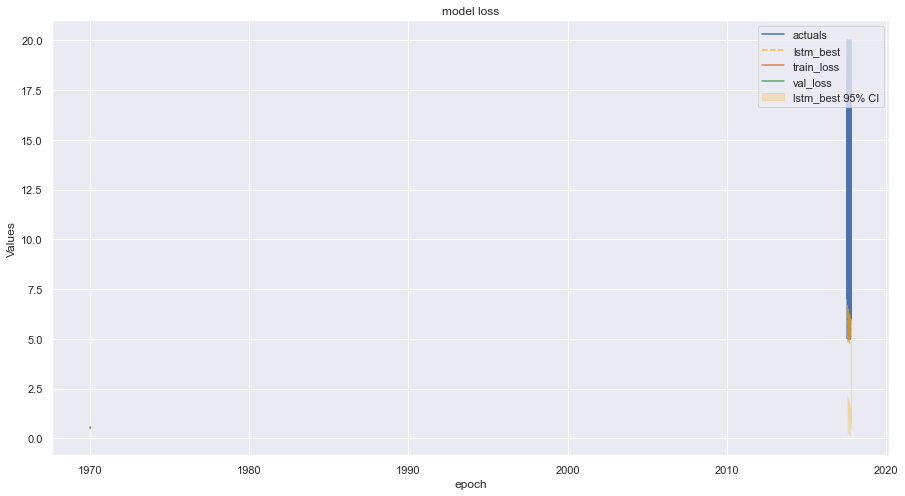

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4669 - val_loss: 0.5085
Epoch 2/2
1/1 [==============================] - 1s 659ms/step - loss: 0.4487 - val_loss: 0.4869
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4790 - val_loss: 0.4628
Epoch 2/2
2/2 [==============================] - 1s 401ms/step - loss: 0.4349 - val_loss: 0.3865


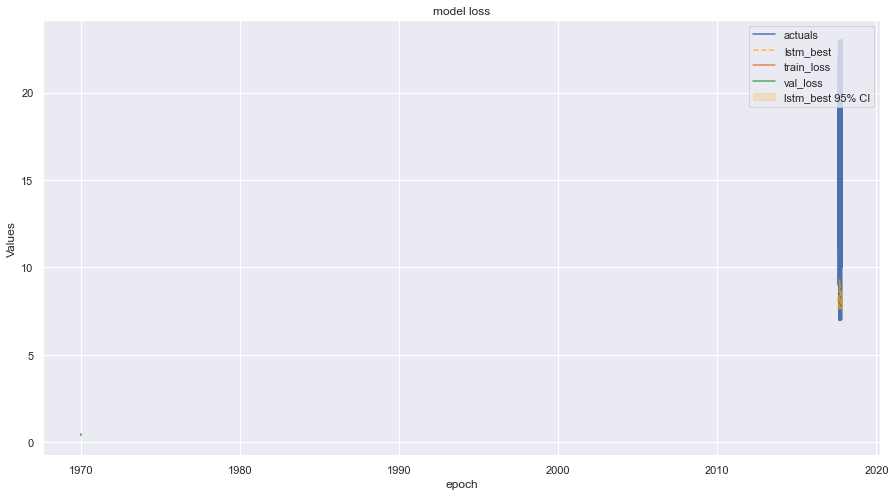

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.4676 - val_loss: 0.4797
Epoch 2/2
1/1 [==============================] - 1s 796ms/step - loss: 0.4621 - val_loss: 0.4777
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.5104 - val_loss: 0.4558
Epoch 2/2
2/2 [==============================] - 1s 417ms/step - loss: 0.5032 - val_loss: 0.4565


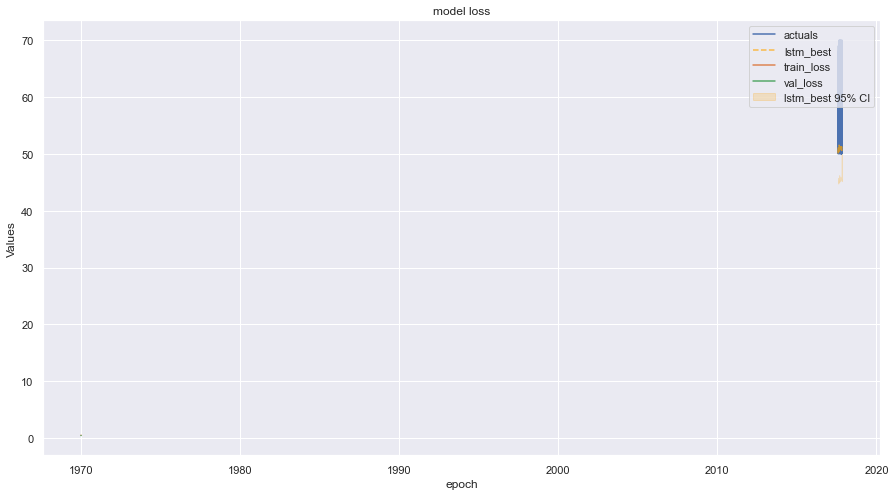

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4200 - val_loss: 0.4290
Epoch 2/2
1/1 [==============================] - 1s 549ms/step - loss: 0.4111 - val_loss: 0.4196
Epoch 1/2
2/2 [==============================] - 11s 2s/step - loss: 0.4827 - val_loss: 0.4091
Epoch 2/2
2/2 [==============================] - 1s 411ms/step - loss: 0.4550 - val_loss: 0.3704


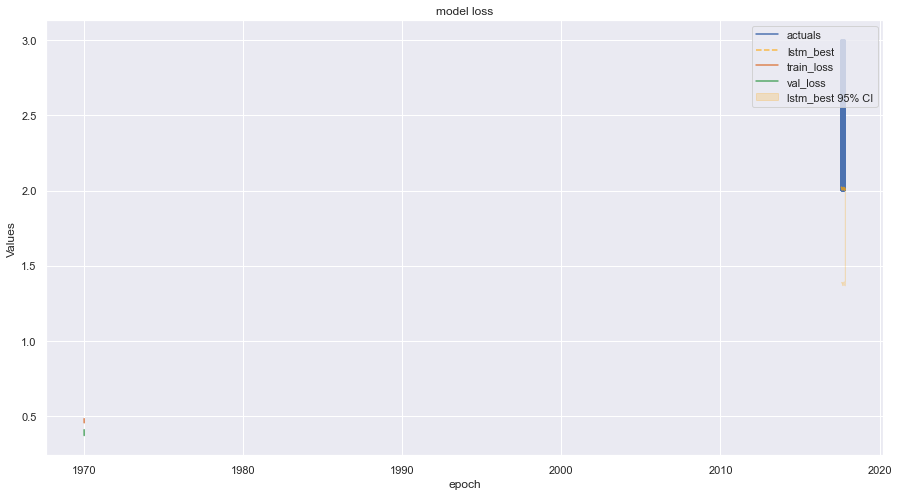

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.3358 - val_loss: 0.4270
Epoch 2/2
1/1 [==============================] - 1s 555ms/step - loss: 0.3206 - val_loss: 0.4146
Epoch 1/2
2/2 [==============================] - 11s 3s/step - loss: 0.4491 - val_loss: 0.4012
Epoch 2/2
2/2 [==============================] - 1s 406ms/step - loss: 0.4225 - val_loss: 0.3762


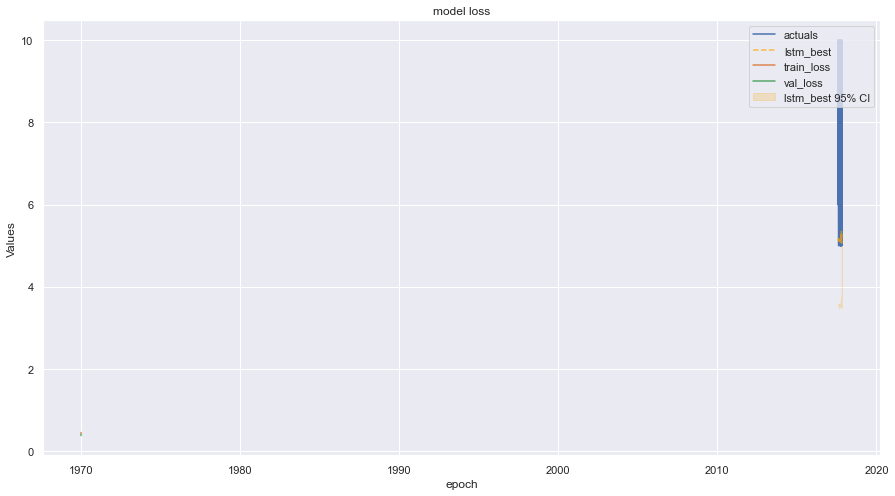

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5294 - val_loss: 0.6128
Epoch 2/2
1/1 [==============================] - 1s 566ms/step - loss: 0.5042 - val_loss: 0.5813
Epoch 1/2
2/2 [==============================] - 13s 2s/step - loss: 0.4747 - val_loss: 0.5907
Epoch 2/2
2/2 [==============================] - 1s 493ms/step - loss: 0.4362 - val_loss: 0.5063


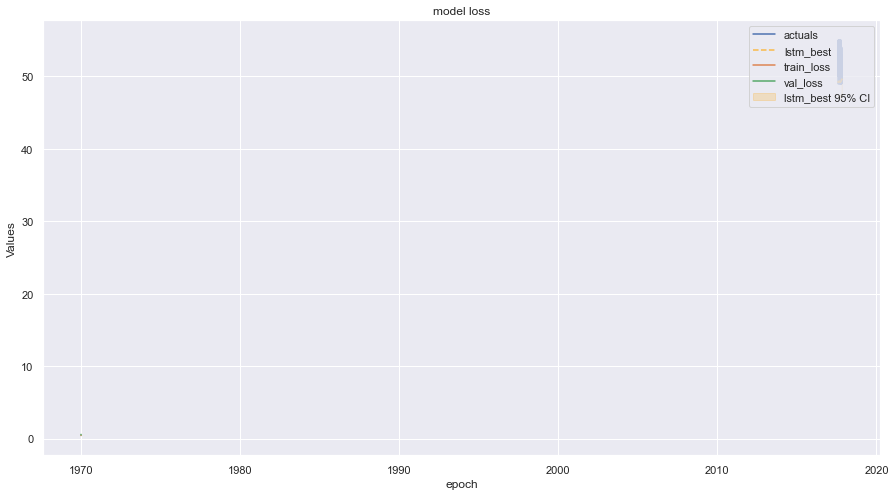

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.5331 - val_loss: 0.4320
Epoch 2/2
1/1 [==============================] - 1s 558ms/step - loss: 0.5172 - val_loss: 0.4055
Epoch 1/2
2/2 [==============================] - 12s 3s/step - loss: 0.5473 - val_loss: 0.4207
Epoch 2/2
2/2 [==============================] - 1s 414ms/step - loss: 0.5000 - val_loss: 0.3659


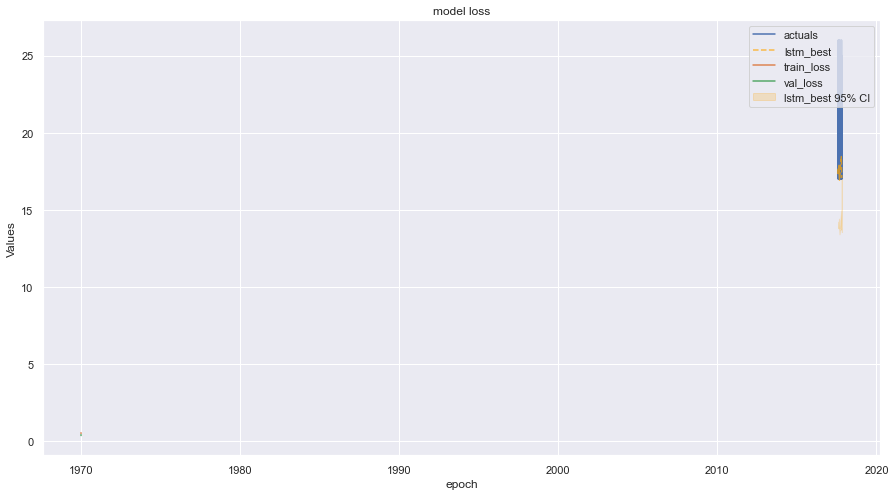

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.5101 - val_loss: 0.5049
Epoch 2/2
1/1 [==============================] - 1s 551ms/step - loss: 0.4878 - val_loss: 0.4796
Epoch 1/2
2/2 [==============================] - 31s 5s/step - loss: 0.4705 - val_loss: 0.4896
Epoch 2/2
2/2 [==============================] - 1s 704ms/step - loss: 0.4263 - val_loss: 0.3900


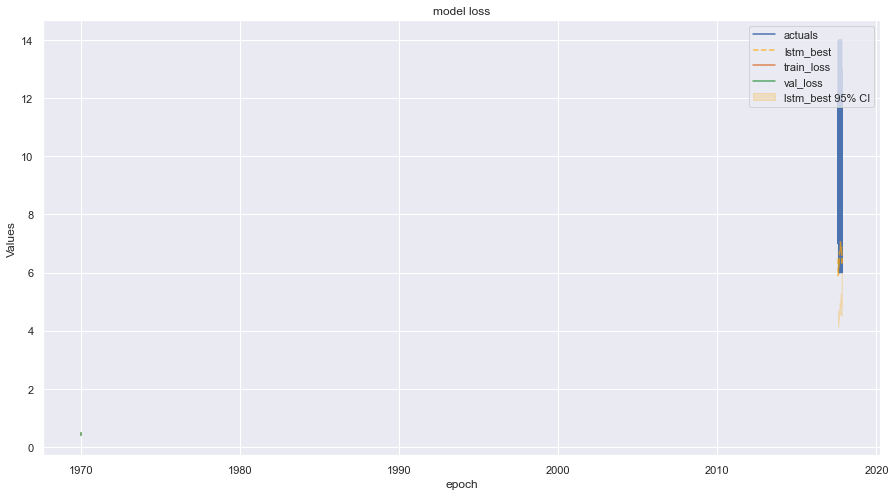

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.4819 - val_loss: 0.4845
Epoch 2/2
1/1 [==============================] - 1s 669ms/step - loss: 0.4670 - val_loss: 0.4635
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.5344 - val_loss: 0.4444
Epoch 2/2
2/2 [==============================] - 1s 459ms/step - loss: 0.4890 - val_loss: 0.3621


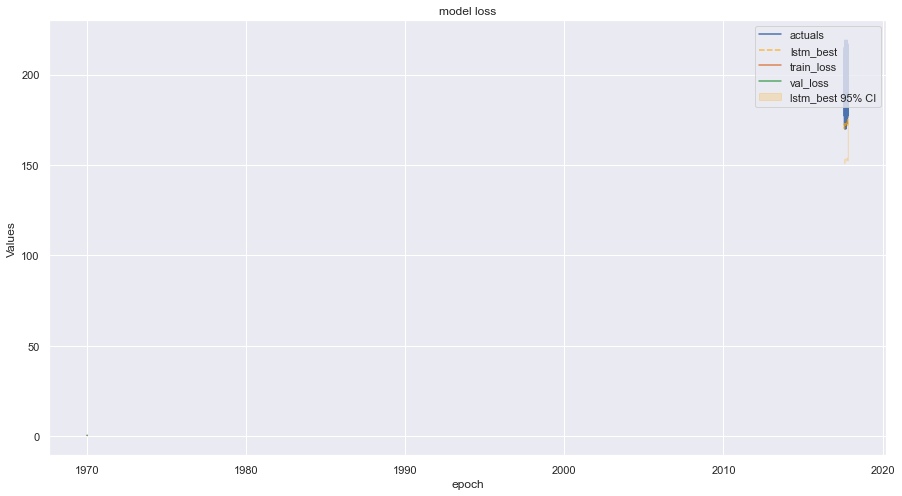

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4193 - val_loss: 0.3739
Epoch 2/2
1/1 [==============================] - 1s 511ms/step - loss: 0.4021 - val_loss: 0.3534
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4698 - val_loss: 0.3515
Epoch 2/2
2/2 [==============================] - 1s 369ms/step - loss: 0.4225 - val_loss: 0.2995


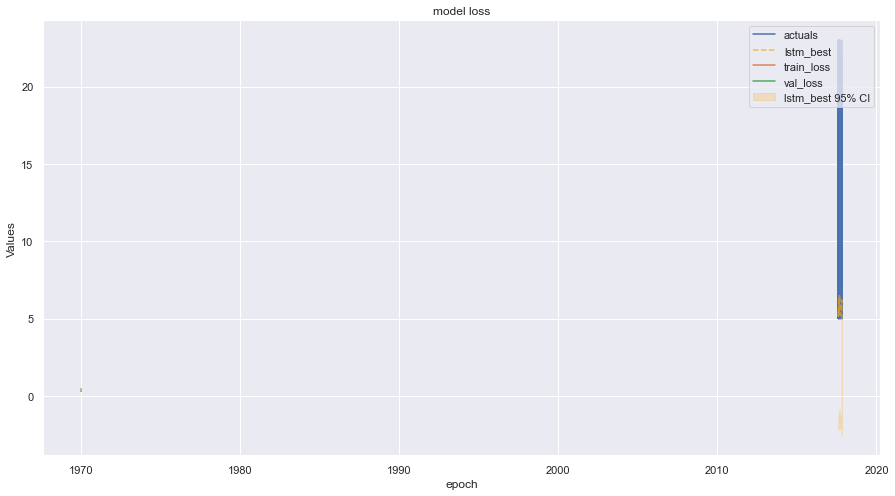

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4969 - val_loss: 0.3911
Epoch 2/2
1/1 [==============================] - 1s 560ms/step - loss: 0.4769 - val_loss: 0.3681
Epoch 1/2
2/2 [==============================] - 12s 4s/step - loss: 0.5176 - val_loss: 0.4007
Epoch 2/2
2/2 [==============================] - 1s 429ms/step - loss: 0.4768 - val_loss: 0.3552


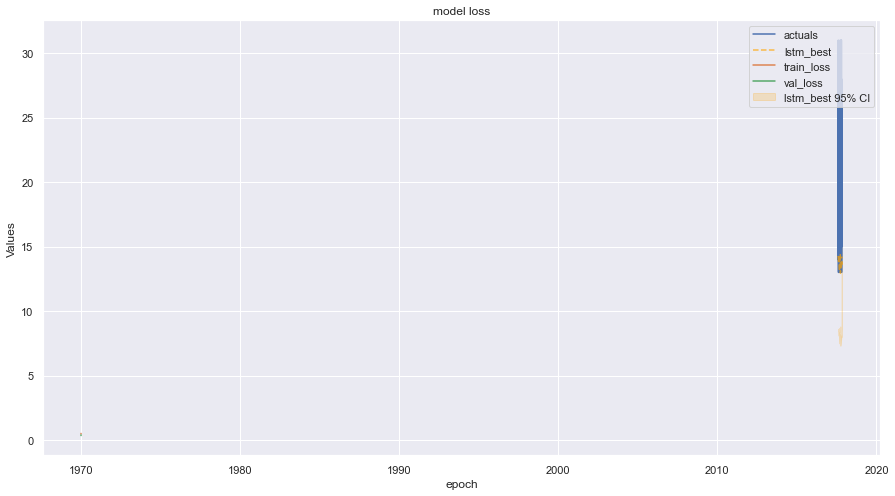

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.5392 - val_loss: 0.5174
Epoch 2/2
1/1 [==============================] - 1s 795ms/step - loss: 0.5202 - val_loss: 0.4940
Epoch 1/2
2/2 [==============================] - 15s 4s/step - loss: 0.5561 - val_loss: 0.4719
Epoch 2/2
2/2 [==============================] - 1s 392ms/step - loss: 0.4867 - val_loss: 0.3694


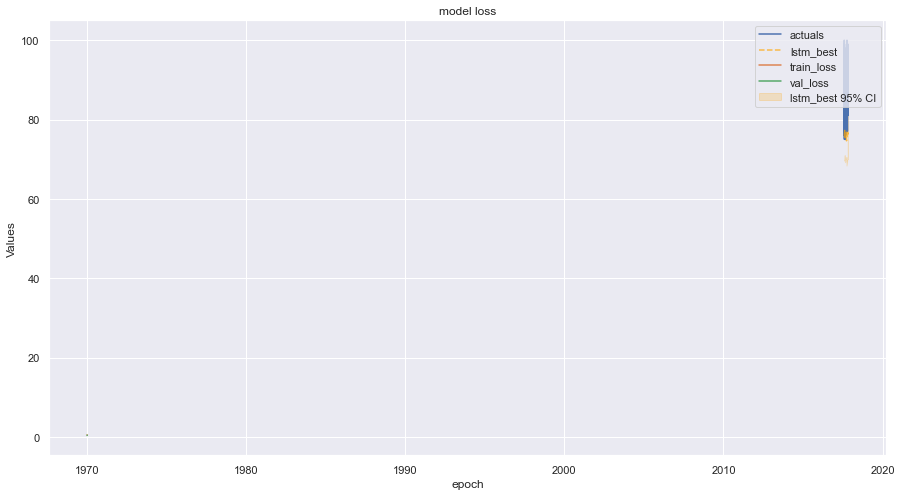

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4319 - val_loss: 0.4723
Epoch 2/2
1/1 [==============================] - 1s 518ms/step - loss: 0.4087 - val_loss: 0.4445
Epoch 1/2
2/2 [==============================] - 13s 2s/step - loss: 0.4426 - val_loss: 0.4472
Epoch 2/2
2/2 [==============================] - 1s 392ms/step - loss: 0.4052 - val_loss: 0.3616


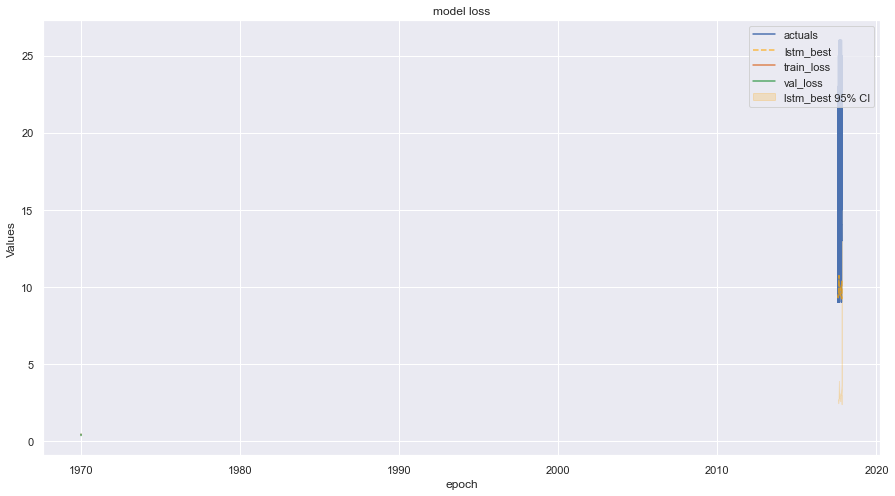

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5123 - val_loss: 0.4797
Epoch 2/2
1/1 [==============================] - 1s 621ms/step - loss: 0.4921 - val_loss: 0.4569
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.5394 - val_loss: 0.4513
Epoch 2/2
2/2 [==============================] - 1s 432ms/step - loss: 0.4977 - val_loss: 0.3747


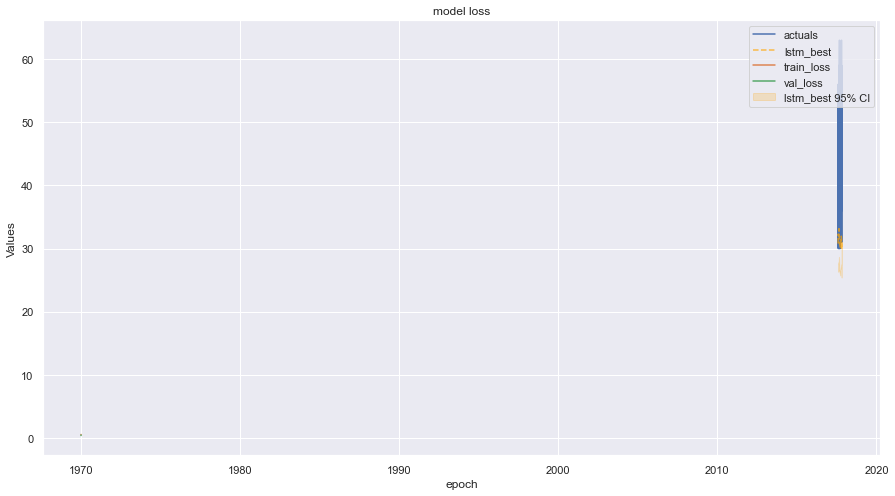

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.5009 - val_loss: 0.5829
Epoch 2/2
1/1 [==============================] - 1s 576ms/step - loss: 0.4788 - val_loss: 0.5557
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4809 - val_loss: 0.5394
Epoch 2/2
2/2 [==============================] - 1s 461ms/step - loss: 0.4440 - val_loss: 0.4701


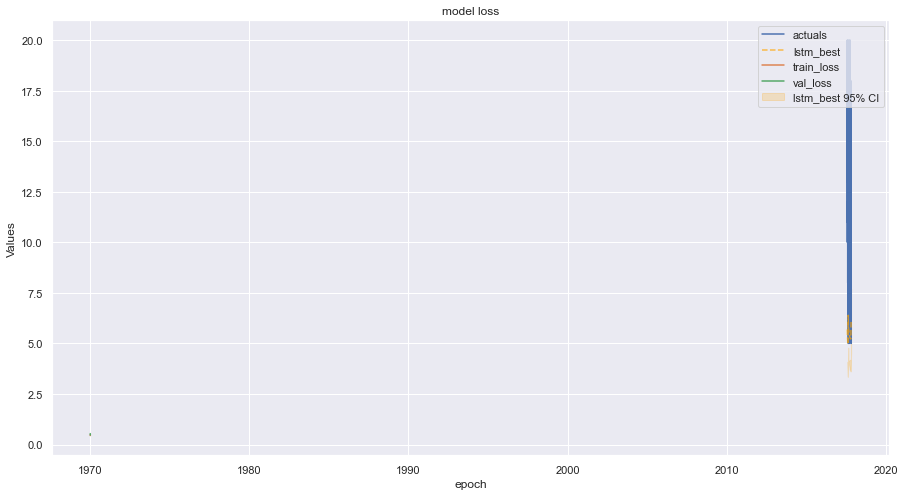

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5171 - val_loss: 0.3534
Epoch 2/2
1/1 [==============================] - 1s 616ms/step - loss: 0.4970 - val_loss: 0.3321
Epoch 1/2
2/2 [==============================] - 11s 2s/step - loss: 0.5153 - val_loss: 0.3277
Epoch 2/2
2/2 [==============================] - 1s 355ms/step - loss: 0.4689 - val_loss: 0.2614


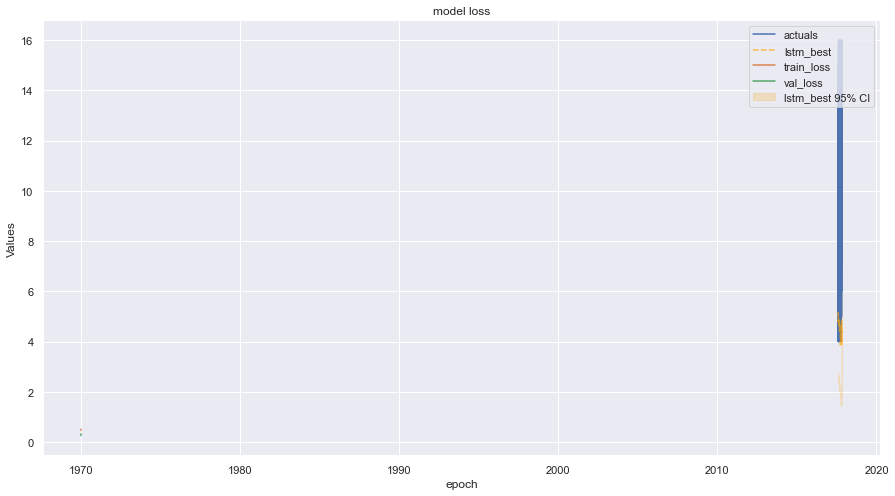

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4023 - val_loss: 0.5614
Epoch 2/2
1/1 [==============================] - 1s 529ms/step - loss: 0.3947 - val_loss: 0.5572
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4192 - val_loss: 0.5513
Epoch 2/2
2/2 [==============================] - 1s 446ms/step - loss: 0.4180 - val_loss: 0.5521


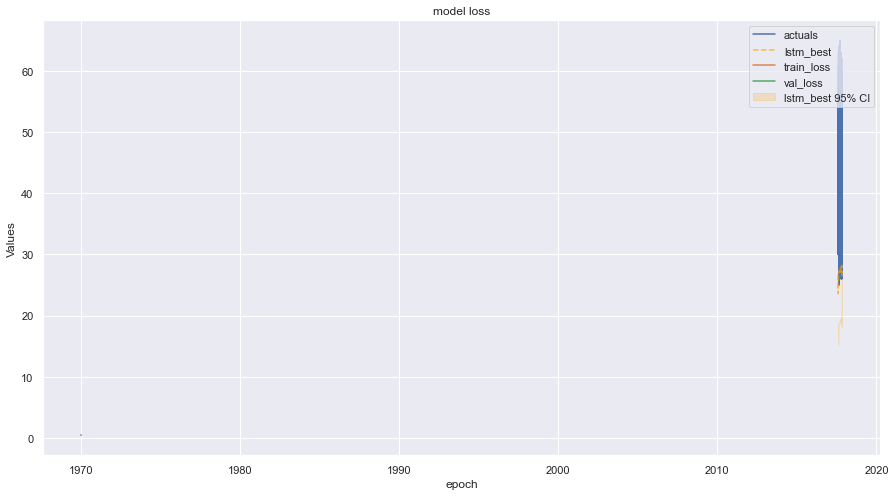

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5194 - val_loss: 0.4297
Epoch 2/2
1/1 [==============================] - 1s 525ms/step - loss: 0.4992 - val_loss: 0.4047
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.5527 - val_loss: 0.4274
Epoch 2/2
2/2 [==============================] - 1s 543ms/step - loss: 0.5235 - val_loss: 0.3714


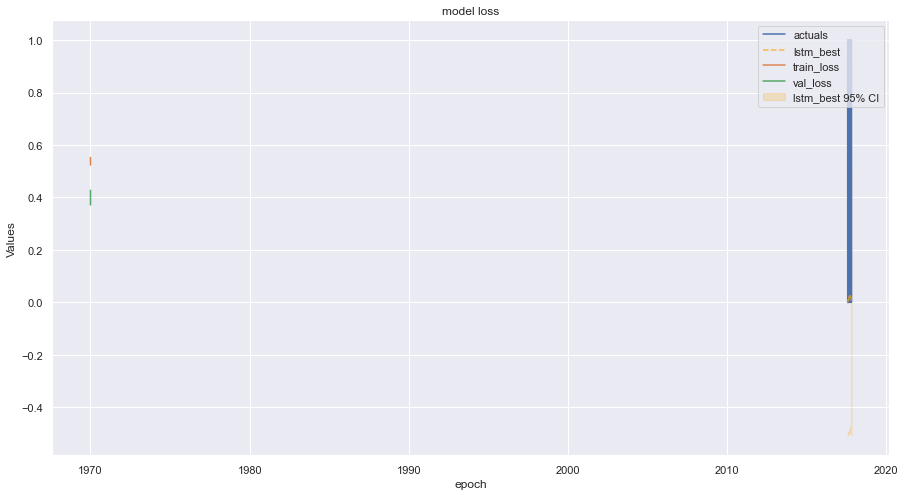

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4980 - val_loss: 0.4676
Epoch 2/2
1/1 [==============================] - 0s 497ms/step - loss: 0.4741 - val_loss: 0.4343
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.4920 - val_loss: 0.4704
Epoch 2/2
2/2 [==============================] - 1s 448ms/step - loss: 0.4484 - val_loss: 0.4027


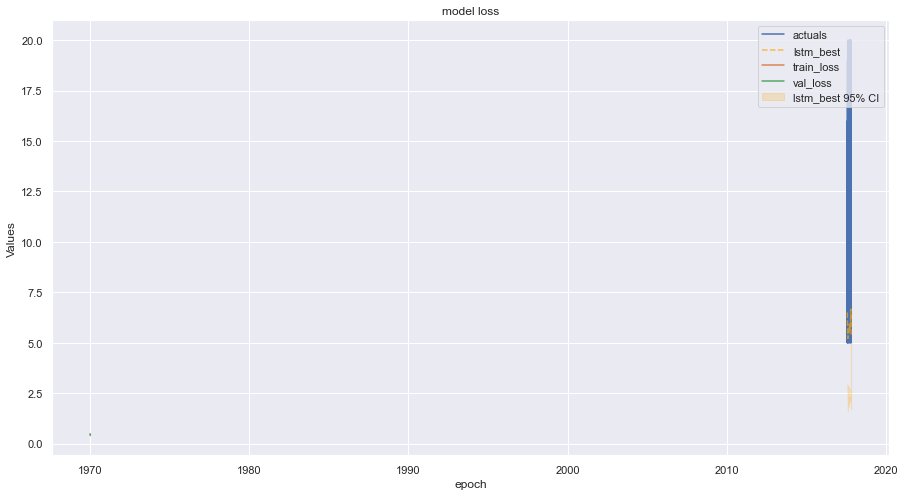

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4225 - val_loss: 0.3483
Epoch 2/2
1/1 [==============================] - 1s 511ms/step - loss: 0.4005 - val_loss: 0.3090
Epoch 1/2
2/2 [==============================] - 10s 2s/step - loss: 0.4485 - val_loss: 0.3472
Epoch 2/2
2/2 [==============================] - 1s 398ms/step - loss: 0.4123 - val_loss: 0.2823


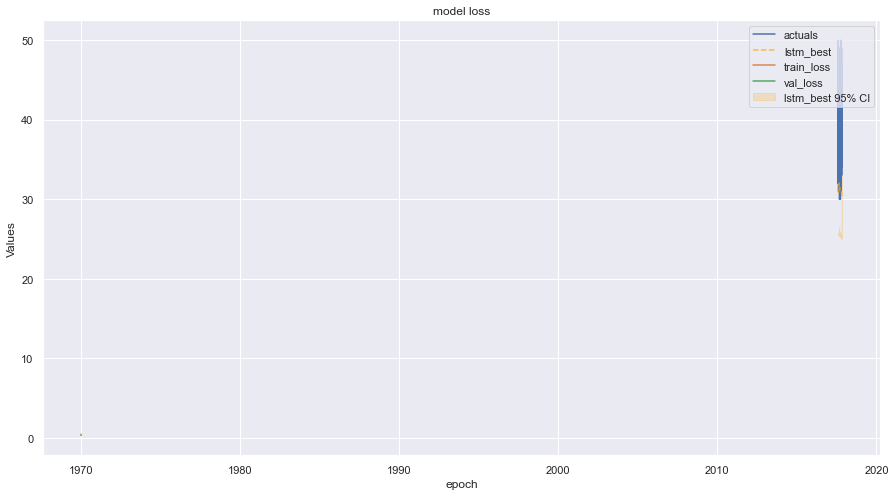

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.3709 - val_loss: 0.5019
Epoch 2/2
1/1 [==============================] - 1s 646ms/step - loss: 0.3513 - val_loss: 0.4840
Epoch 1/2
2/2 [==============================] - 11s 3s/step - loss: 0.4245 - val_loss: 0.4611
Epoch 2/2
2/2 [==============================] - 1s 419ms/step - loss: 0.3853 - val_loss: 0.3876


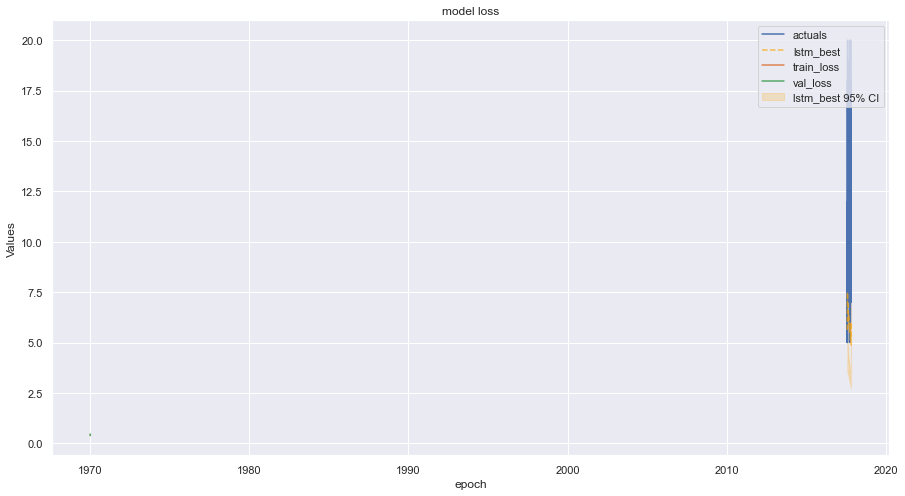

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5286 - val_loss: 0.4315
Epoch 2/2
1/1 [==============================] - 1s 701ms/step - loss: 0.5094 - val_loss: 0.4157
Epoch 1/2
2/2 [==============================] - 10s 2s/step - loss: 0.5238 - val_loss: 0.3994
Epoch 2/2
2/2 [==============================] - 1s 500ms/step - loss: 0.4823 - val_loss: 0.3345


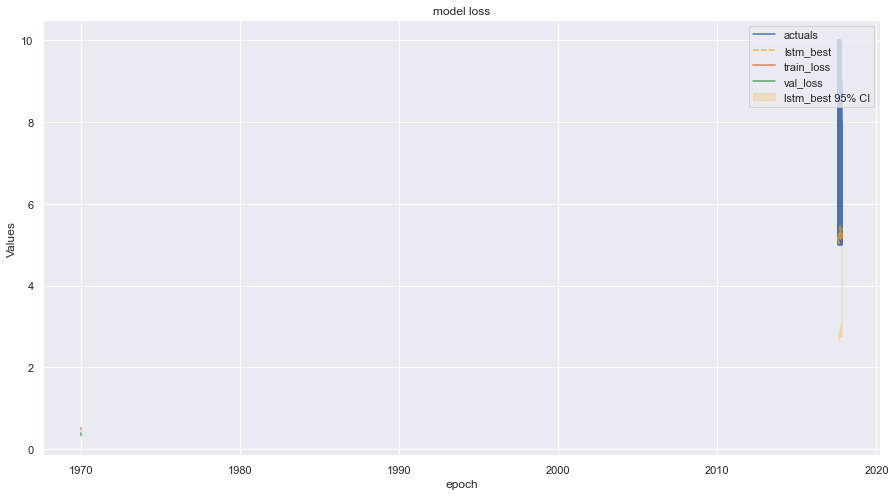

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.4653 - val_loss: 0.3715
Epoch 2/2
1/1 [==============================] - 1s 599ms/step - loss: 0.4498 - val_loss: 0.3713
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4876 - val_loss: 0.3558
Epoch 2/2
2/2 [==============================] - 1s 412ms/step - loss: 0.4729 - val_loss: 0.3580


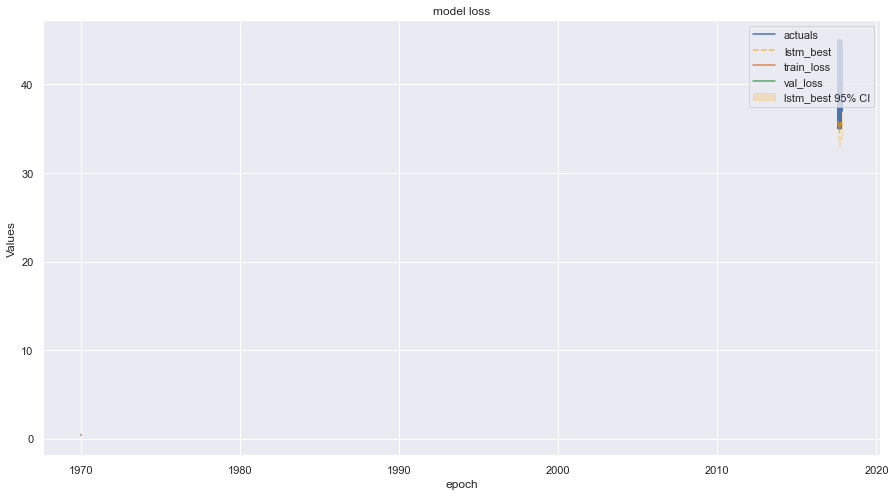

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5343 - val_loss: 0.5081
Epoch 2/2
1/1 [==============================] - 1s 565ms/step - loss: 0.5116 - val_loss: 0.4843
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.5155 - val_loss: 0.4784
Epoch 2/2
2/2 [==============================] - 1s 599ms/step - loss: 0.4475 - val_loss: 0.3800


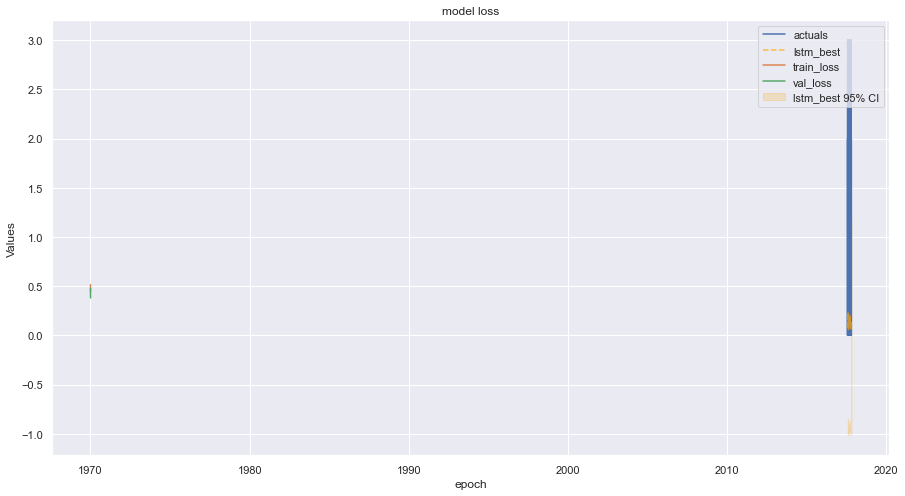

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.4989 - val_loss: 0.5877
Epoch 2/2
1/1 [==============================] - 1s 868ms/step - loss: 0.4830 - val_loss: 0.5698
Epoch 1/2
2/2 [==============================] - 12s 3s/step - loss: 0.4569 - val_loss: 0.5680
Epoch 2/2
2/2 [==============================] - 1s 607ms/step - loss: 0.4278 - val_loss: 0.5070


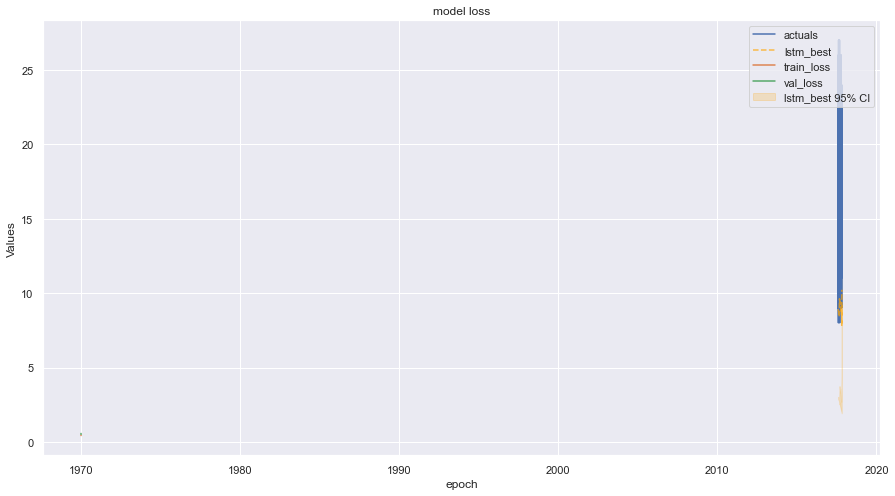

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4884 - val_loss: 0.4423
Epoch 2/2
1/1 [==============================] - 1s 538ms/step - loss: 0.4651 - val_loss: 0.4129
Epoch 1/2
2/2 [==============================] - 10s 2s/step - loss: 0.4665 - val_loss: 0.4289
Epoch 2/2
2/2 [==============================] - 1s 504ms/step - loss: 0.4123 - val_loss: 0.3418


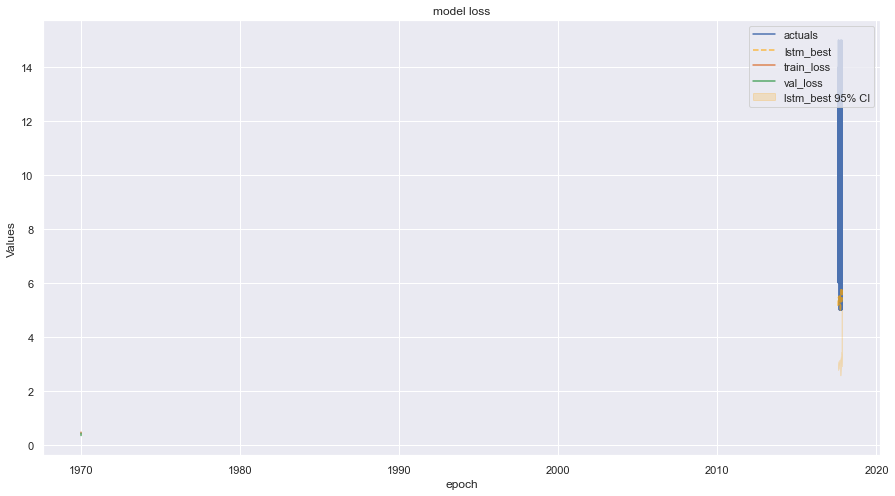

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.5765 - val_loss: 0.5497
Epoch 2/2
1/1 [==============================] - 1s 629ms/step - loss: 0.5575 - val_loss: 0.5276
Epoch 1/2
2/2 [==============================] - 11s 2s/step - loss: 0.5057 - val_loss: 0.5006
Epoch 2/2
2/2 [==============================] - 1s 475ms/step - loss: 0.4705 - val_loss: 0.4474


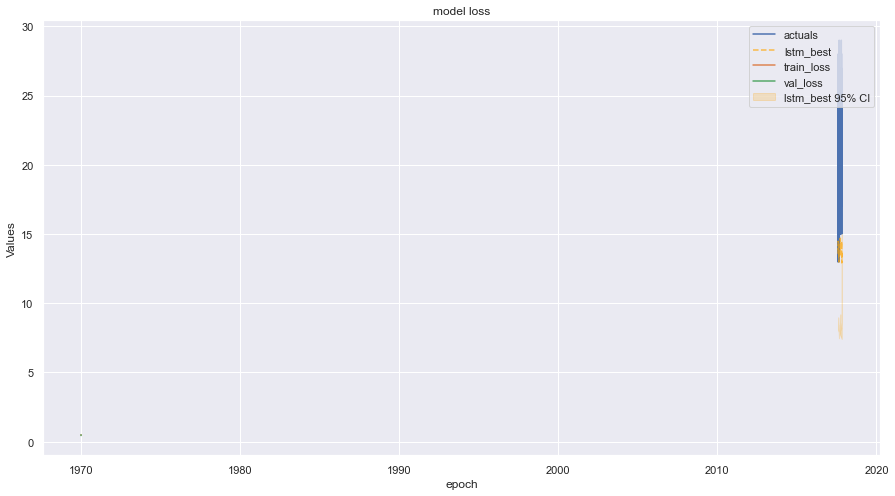

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.4726 - val_loss: 0.5754
Epoch 2/2
1/1 [==============================] - 1s 539ms/step - loss: 0.4436 - val_loss: 0.5356
Epoch 1/2
2/2 [==============================] - 11s 3s/step - loss: 0.4318 - val_loss: 0.5534
Epoch 2/2
2/2 [==============================] - 1s 403ms/step - loss: 0.3859 - val_loss: 0.4744


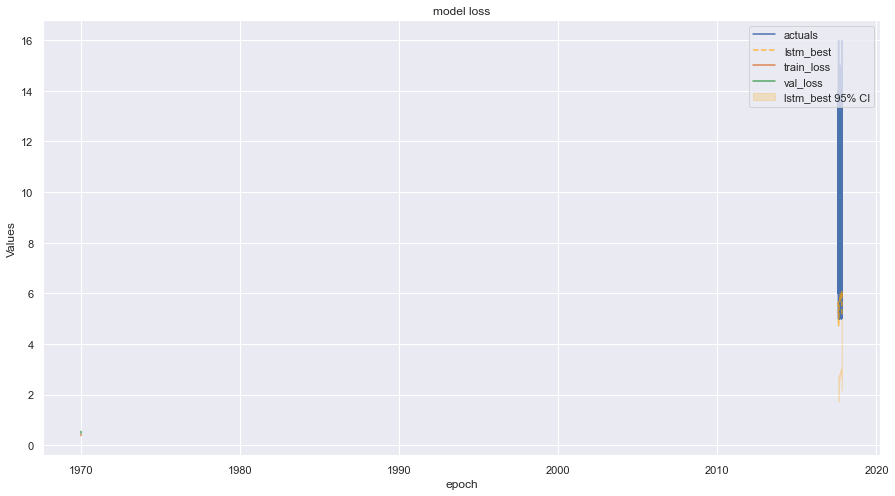

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4499 - val_loss: 0.5375
Epoch 2/2
1/1 [==============================] - 1s 542ms/step - loss: 0.4323 - val_loss: 0.5128
Epoch 1/2
2/2 [==============================] - 12s 3s/step - loss: 0.4705 - val_loss: 0.5111
Epoch 2/2
2/2 [==============================] - 1s 476ms/step - loss: 0.4416 - val_loss: 0.4687


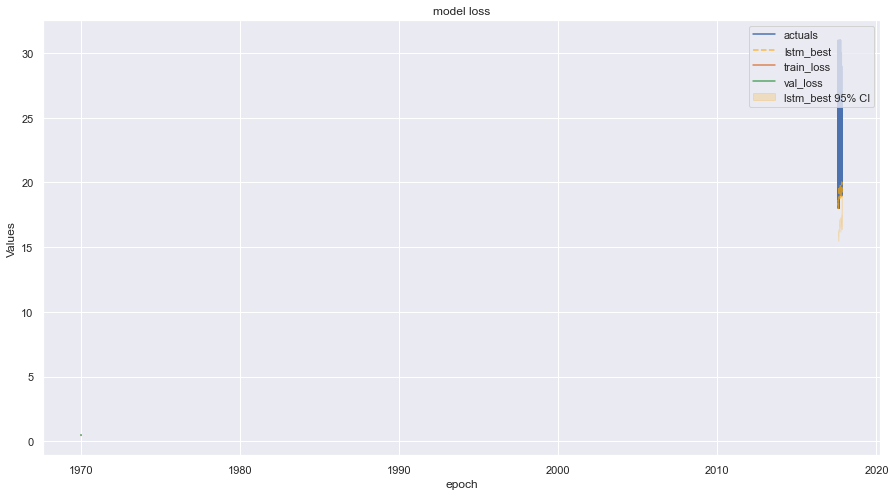

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.5339 - val_loss: 0.4443
Epoch 2/2
1/1 [==============================] - 1s 602ms/step - loss: 0.5137 - val_loss: 0.4201
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.5723 - val_loss: 0.4407
Epoch 2/2
2/2 [==============================] - 1s 401ms/step - loss: 0.5443 - val_loss: 0.3996


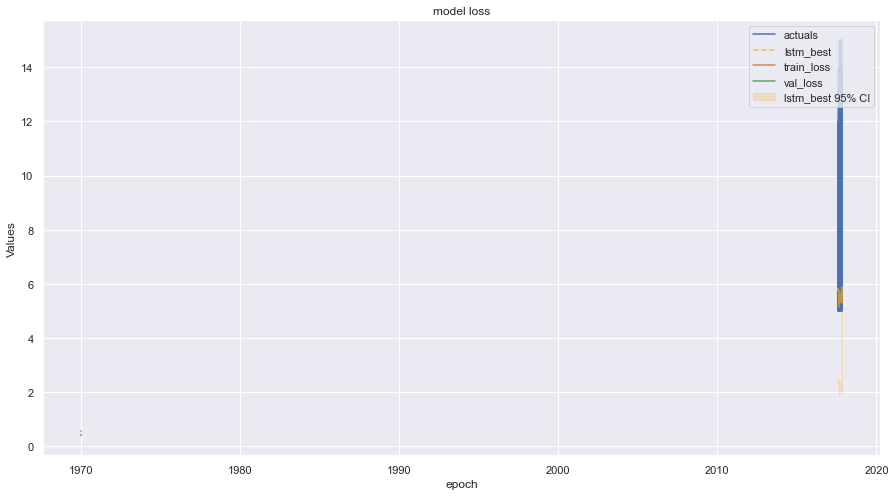

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.4413 - val_loss: 0.3862
Epoch 2/2
1/1 [==============================] - 1s 538ms/step - loss: 0.4241 - val_loss: 0.3705
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4608 - val_loss: 0.3634
Epoch 2/2
2/2 [==============================] - 1s 381ms/step - loss: 0.4240 - val_loss: 0.3283


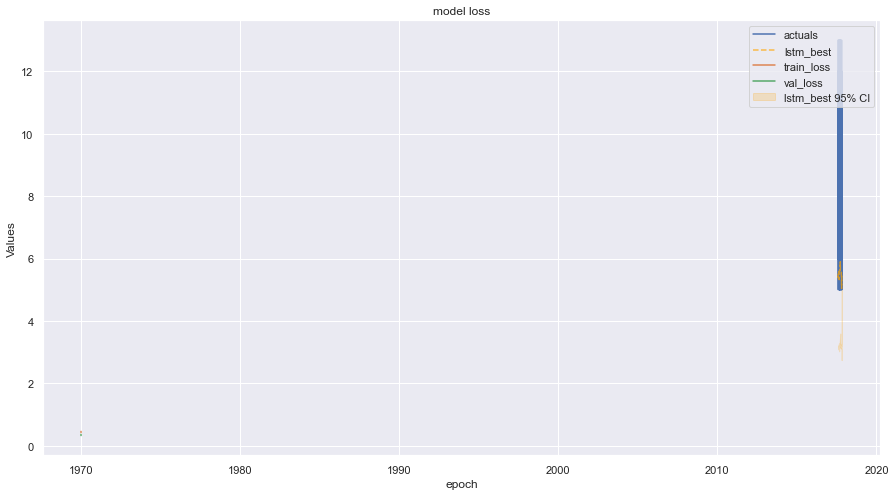

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.4703 - val_loss: 0.4649
Epoch 2/2
1/1 [==============================] - 1s 687ms/step - loss: 0.4520 - val_loss: 0.4416
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.5004 - val_loss: 0.4417
Epoch 2/2
2/2 [==============================] - 1s 624ms/step - loss: 0.4741 - val_loss: 0.3955


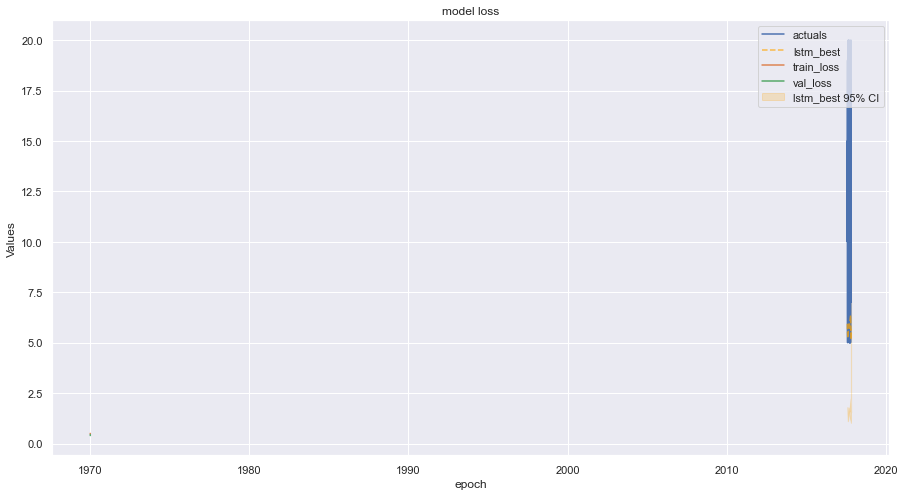

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.3868 - val_loss: 0.4616
Epoch 2/2
1/1 [==============================] - 1s 616ms/step - loss: 0.3785 - val_loss: 0.4479
Epoch 1/2
2/2 [==============================] - 11s 2s/step - loss: 0.3888 - val_loss: 0.4507
Epoch 2/2
2/2 [==============================] - 1s 396ms/step - loss: 0.3710 - val_loss: 0.4079


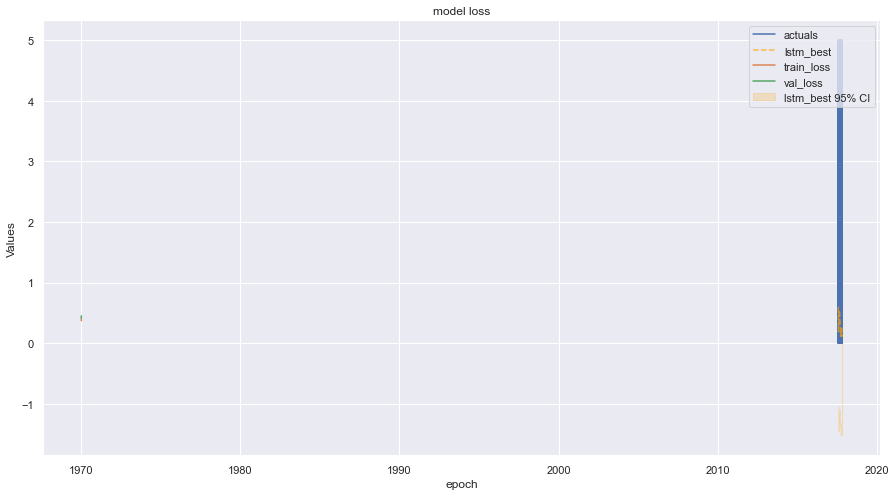

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.6080 - val_loss: 0.4302
Epoch 2/2
1/1 [==============================] - 1s 520ms/step - loss: 0.5877 - val_loss: 0.4070
Epoch 1/2
2/2 [==============================] - 16s 6s/step - loss: 0.5492 - val_loss: 0.4080
Epoch 2/2
2/2 [==============================] - 1s 545ms/step - loss: 0.4852 - val_loss: 0.3182


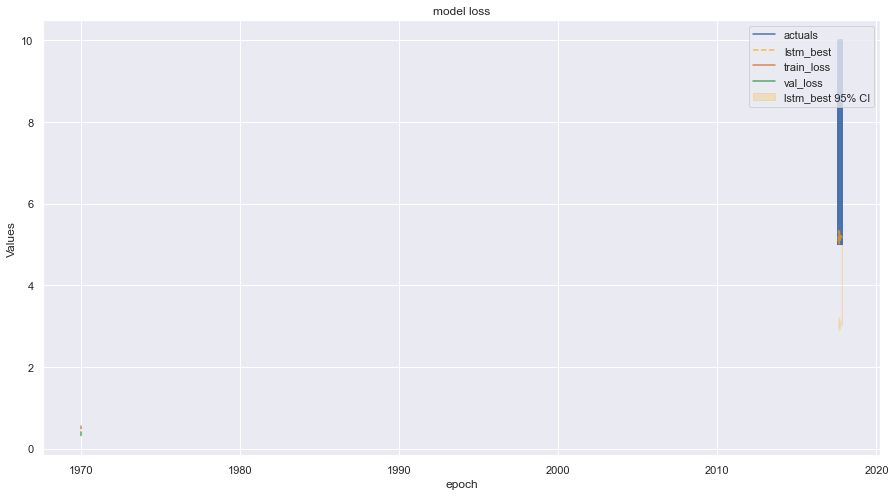

Epoch 1/2
1/1 [==============================] - 1316s 1316s/step - loss: 0.6011 - val_loss: 0.4959
Epoch 2/2
1/1 [==============================] - 1s 593ms/step - loss: 0.5788 - val_loss: 0.4743
Epoch 1/2
2/2 [==============================] - 15s 2s/step - loss: 0.5814 - val_loss: 0.5039
Epoch 2/2
2/2 [==============================] - 1s 555ms/step - loss: 0.5450 - val_loss: 0.4648


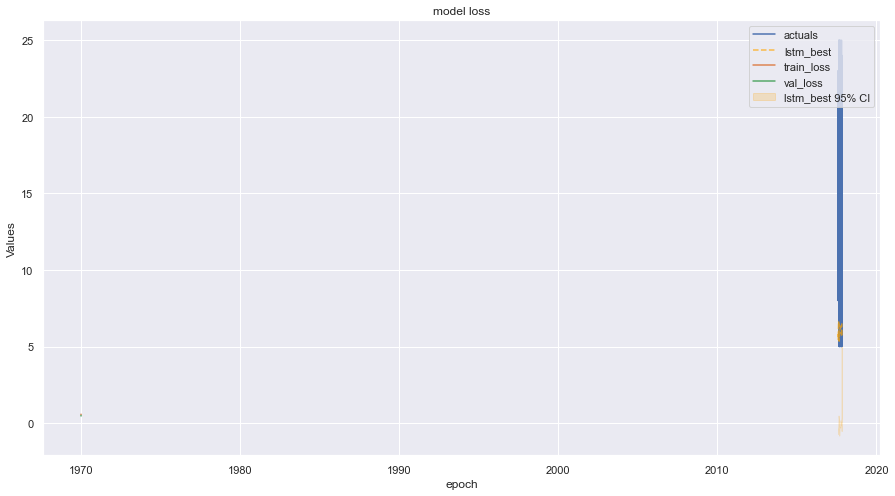

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.5211 - val_loss: 0.4281
Epoch 2/2
1/1 [==============================] - 1s 593ms/step - loss: 0.5040 - val_loss: 0.4185
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.5158 - val_loss: 0.4151
Epoch 2/2
2/2 [==============================] - 1s 635ms/step - loss: 0.4641 - val_loss: 0.3598


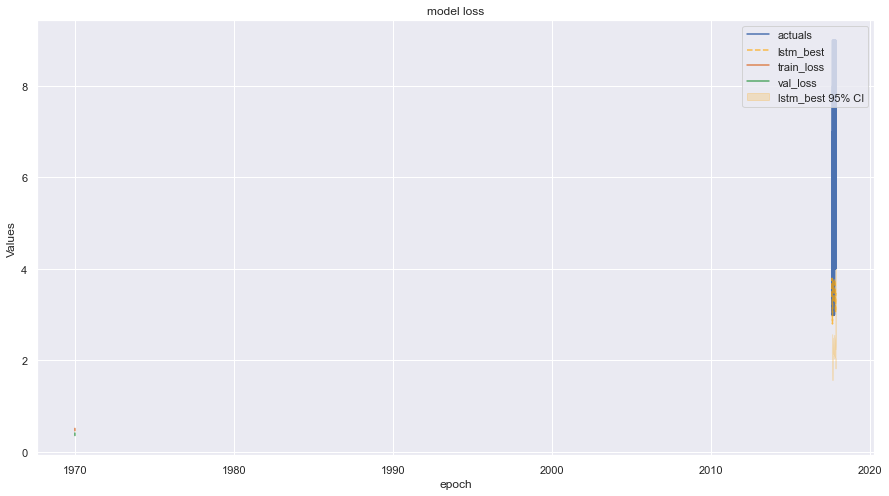

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.5447 - val_loss: 0.5013
Epoch 2/2
1/1 [==============================] - 1s 863ms/step - loss: 0.5289 - val_loss: 0.4840
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.5343 - val_loss: 0.4563
Epoch 2/2
2/2 [==============================] - 1s 532ms/step - loss: 0.4890 - val_loss: 0.3809


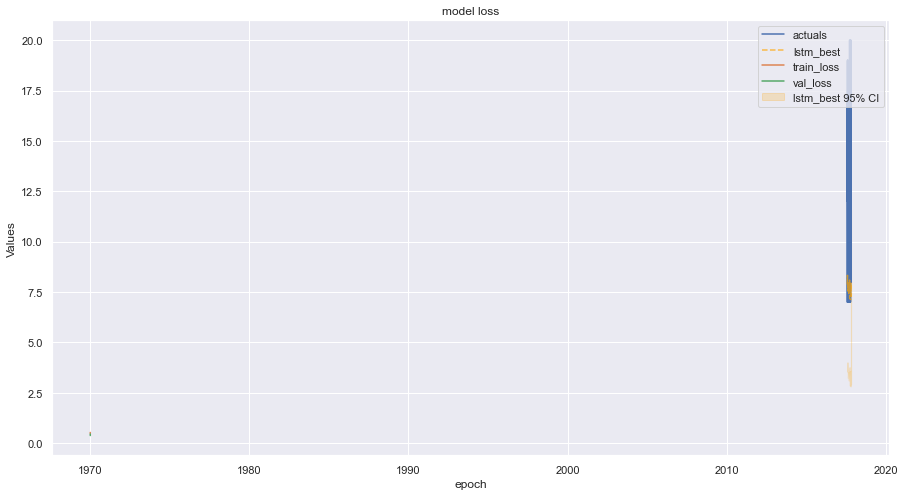

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.5445 - val_loss: 0.5630
Epoch 2/2
1/1 [==============================] - 1s 917ms/step - loss: 0.5199 - val_loss: 0.5350
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.5010 - val_loss: 0.5566
Epoch 2/2
2/2 [==============================] - 1s 550ms/step - loss: 0.4610 - val_loss: 0.4658


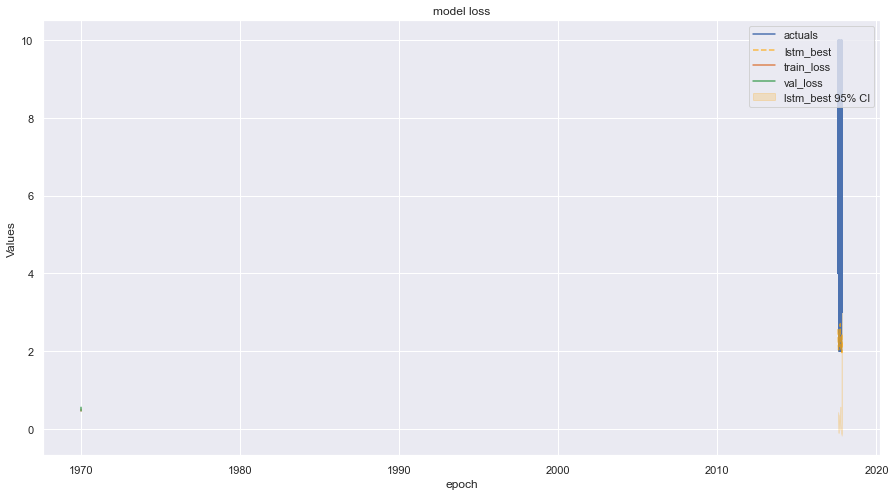

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.5848 - val_loss: 0.4790
Epoch 2/2
1/1 [==============================] - 1s 697ms/step - loss: 0.5669 - val_loss: 0.4574
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.5948 - val_loss: 0.4924
Epoch 2/2
2/2 [==============================] - 1s 505ms/step - loss: 0.5648 - val_loss: 0.4419


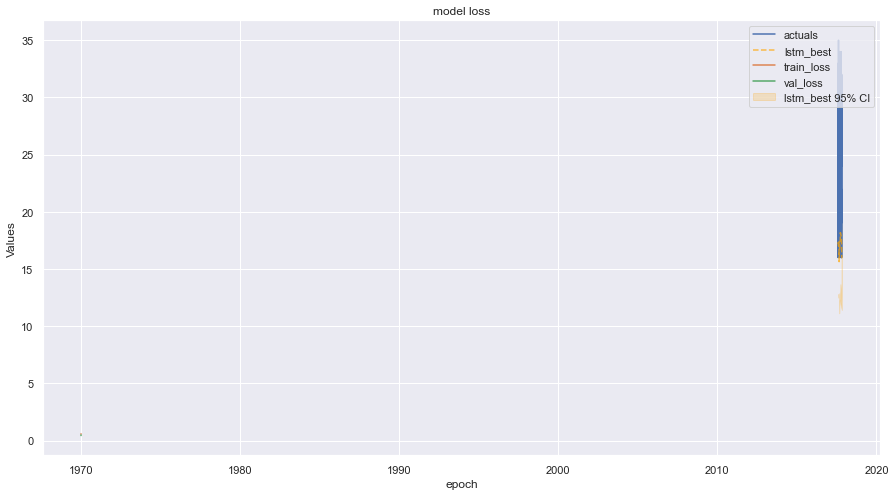

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.3706 - val_loss: 0.4872
Epoch 2/2
1/1 [==============================] - 1s 702ms/step - loss: 0.3601 - val_loss: 0.4671
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4558 - val_loss: 0.4474
Epoch 2/2
2/2 [==============================] - 1s 521ms/step - loss: 0.4412 - val_loss: 0.4197


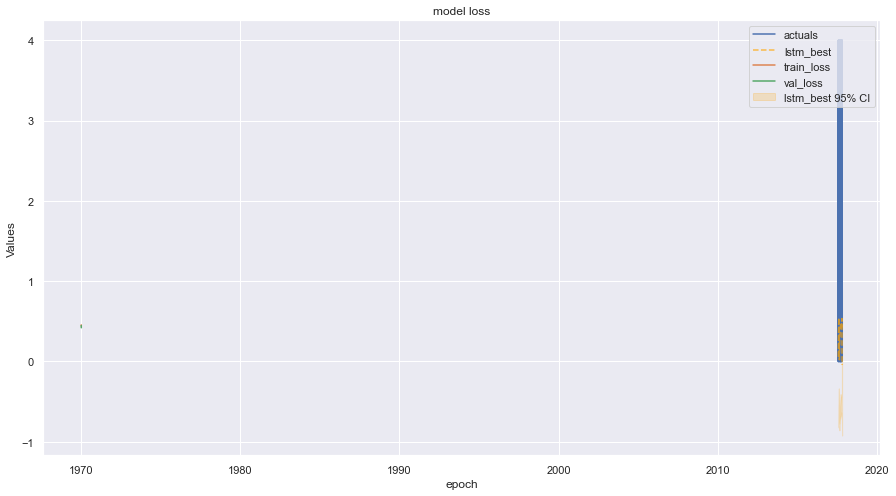

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.5052 - val_loss: 0.3421
Epoch 2/2
1/1 [==============================] - 1s 621ms/step - loss: 0.5011 - val_loss: 0.3433
Epoch 1/2
2/2 [==============================] - 17s 4s/step - loss: 0.5743 - val_loss: 0.3745
Epoch 2/2
2/2 [==============================] - 1s 749ms/step - loss: 0.5670 - val_loss: 0.3943


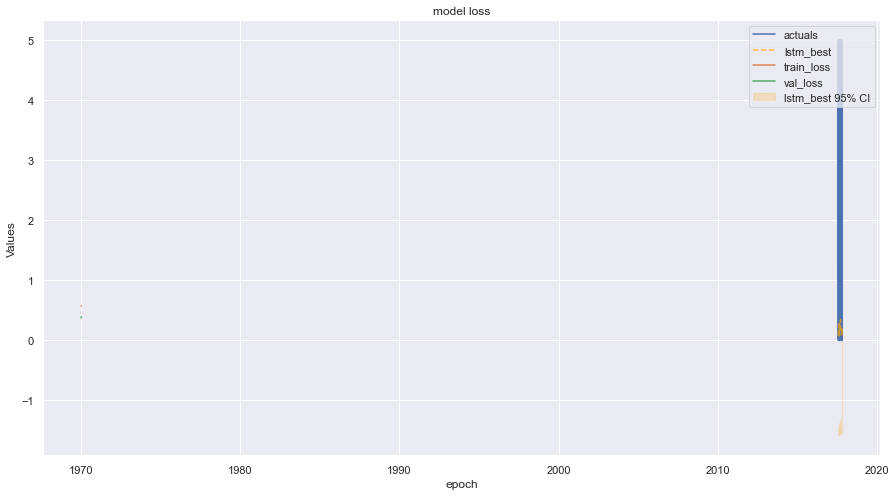

Epoch 1/2
1/1 [==============================] - 16s 16s/step - loss: 0.4087 - val_loss: 0.4646
Epoch 2/2
1/1 [==============================] - 1s 826ms/step - loss: 0.3840 - val_loss: 0.4346
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.4554 - val_loss: 0.4648
Epoch 2/2
2/2 [==============================] - 1s 607ms/step - loss: 0.4170 - val_loss: 0.3996


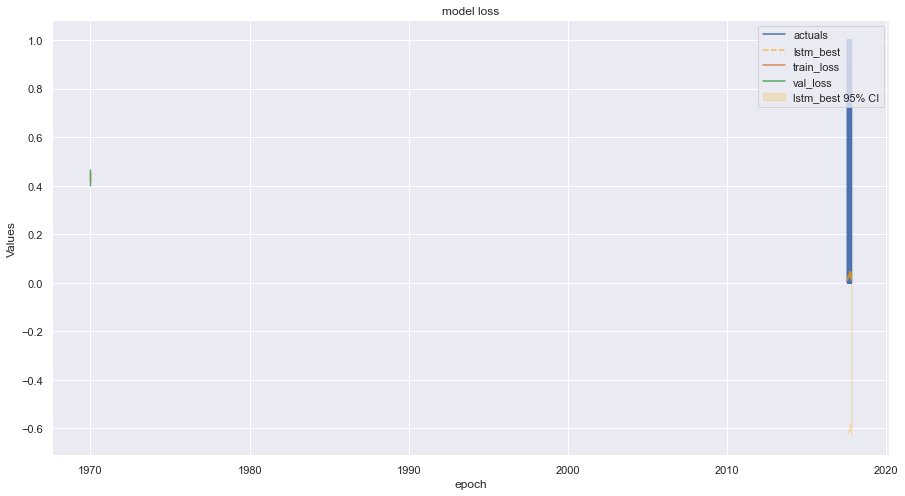

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.4597 - val_loss: 0.4338
Epoch 2/2
1/1 [==============================] - 1s 767ms/step - loss: 0.4453 - val_loss: 0.4222
Epoch 1/2
2/2 [==============================] - 18s 3s/step - loss: 0.4357 - val_loss: 0.4371
Epoch 2/2
2/2 [==============================] - 1s 498ms/step - loss: 0.4022 - val_loss: 0.3842


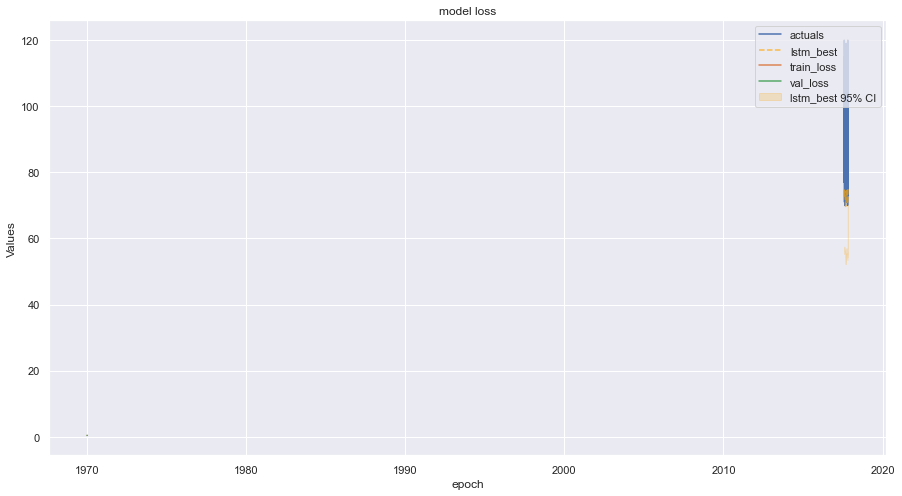

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.4972 - val_loss: 0.1662
Epoch 2/2
1/1 [==============================] - 1s 763ms/step - loss: 0.4943 - val_loss: 0.1713
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4756 - val_loss: 0.2124
Epoch 2/2
2/2 [==============================] - 1s 484ms/step - loss: 0.4701 - val_loss: 0.2154


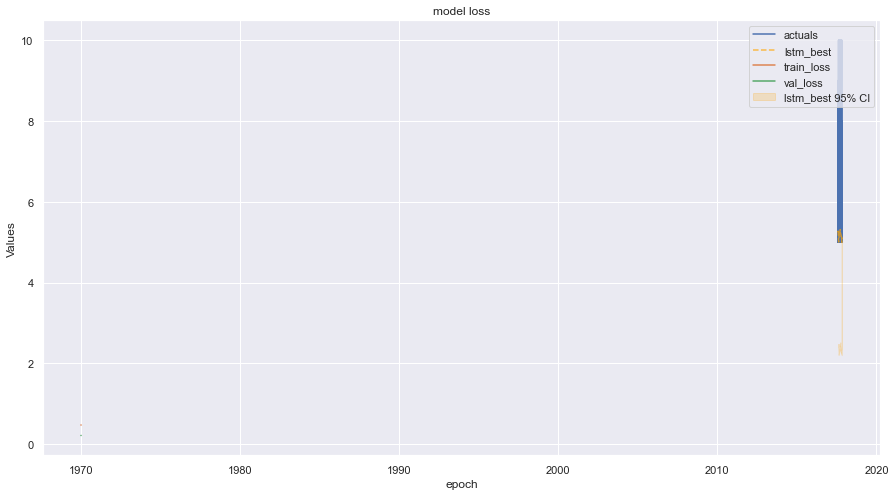

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.7501 - val_loss: 0.3408
Epoch 2/2
1/1 [==============================] - 1s 930ms/step - loss: 0.7374 - val_loss: 0.3474
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.6308 - val_loss: 0.3709
Epoch 2/2
2/2 [==============================] - 1s 484ms/step - loss: 0.6223 - val_loss: 0.3789


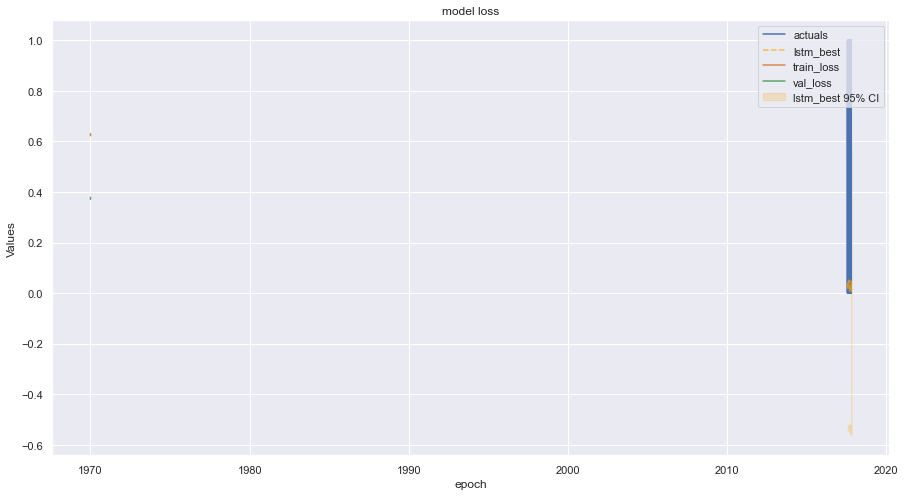

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.6434 - val_loss: 0.5829
Epoch 2/2
1/1 [==============================] - 1s 652ms/step - loss: 0.6200 - val_loss: 0.5582
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.6631 - val_loss: 0.5417
Epoch 2/2
2/2 [==============================] - 1s 620ms/step - loss: 0.6128 - val_loss: 0.4584


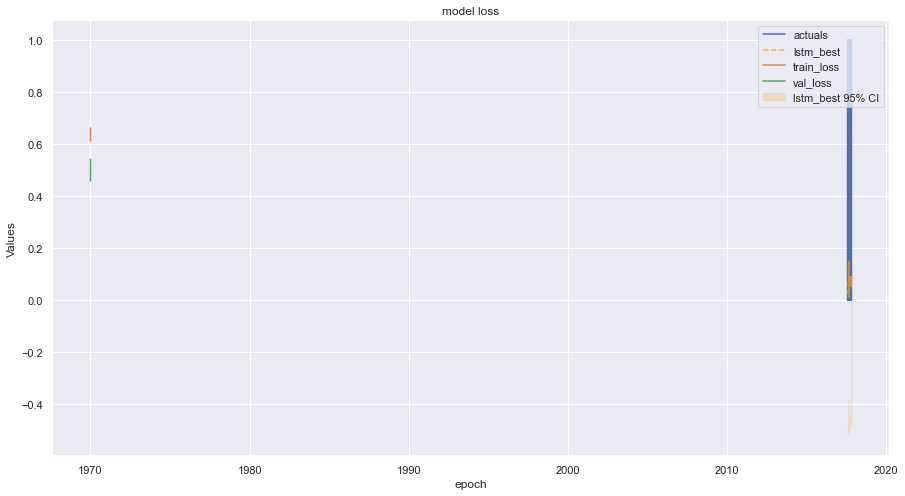

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.5342 - val_loss: 0.5363
Epoch 2/2
1/1 [==============================] - 1s 633ms/step - loss: 0.5143 - val_loss: 0.5166
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.5151 - val_loss: 0.4890
Epoch 2/2
2/2 [==============================] - 1s 473ms/step - loss: 0.4661 - val_loss: 0.4108


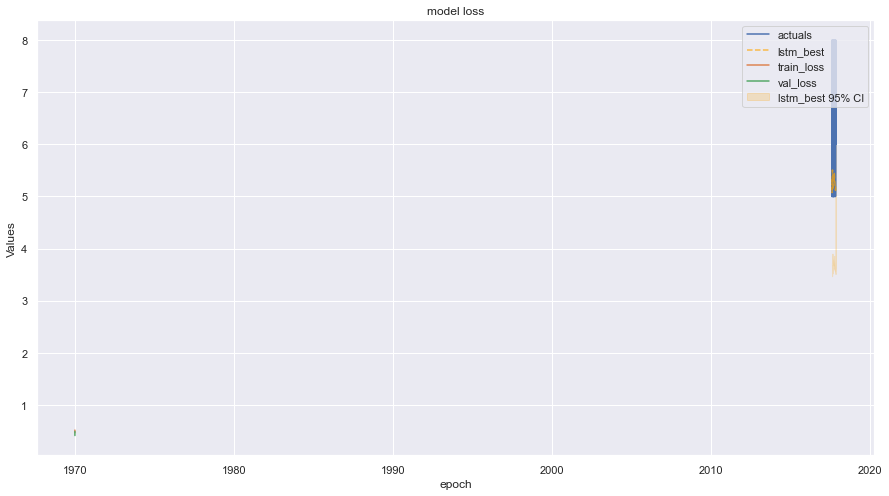

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.4473 - val_loss: 0.5438
Epoch 2/2
1/1 [==============================] - 1s 675ms/step - loss: 0.4362 - val_loss: 0.5311
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.4001 - val_loss: 0.5240
Epoch 2/2
2/2 [==============================] - 1s 497ms/step - loss: 0.3910 - val_loss: 0.5066


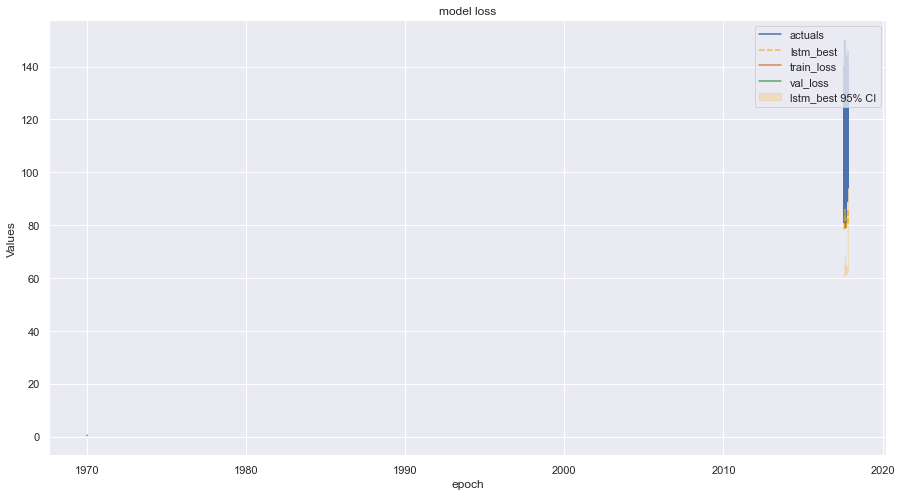

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.5313 - val_loss: 0.3682
Epoch 2/2
1/1 [==============================] - 1s 771ms/step - loss: 0.5140 - val_loss: 0.3572
Epoch 1/2
2/2 [==============================] - 19s 5s/step - loss: 0.5376 - val_loss: 0.3843
Epoch 2/2
2/2 [==============================] - 1s 568ms/step - loss: 0.4970 - val_loss: 0.3574


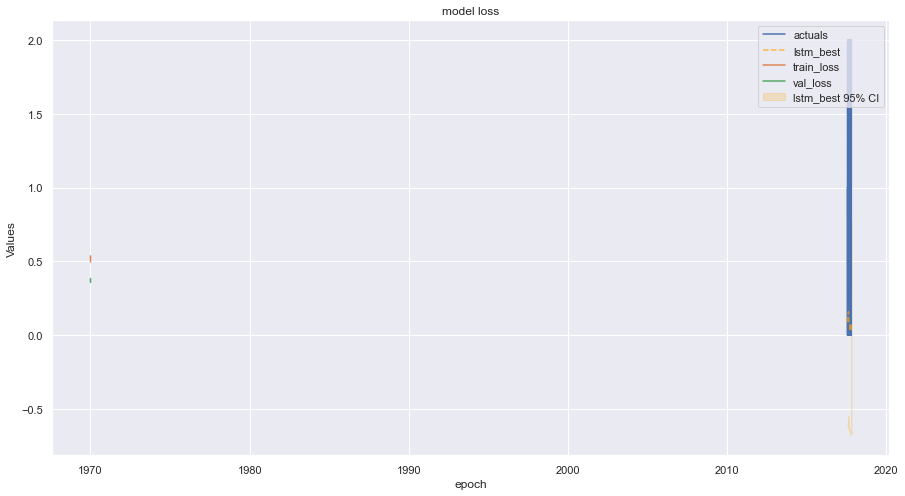

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.4377 - val_loss: 0.4199
Epoch 2/2
1/1 [==============================] - 1s 698ms/step - loss: 0.4166 - val_loss: 0.4045
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.4802 - val_loss: 0.4052
Epoch 2/2
2/2 [==============================] - 1s 504ms/step - loss: 0.4371 - val_loss: 0.3543


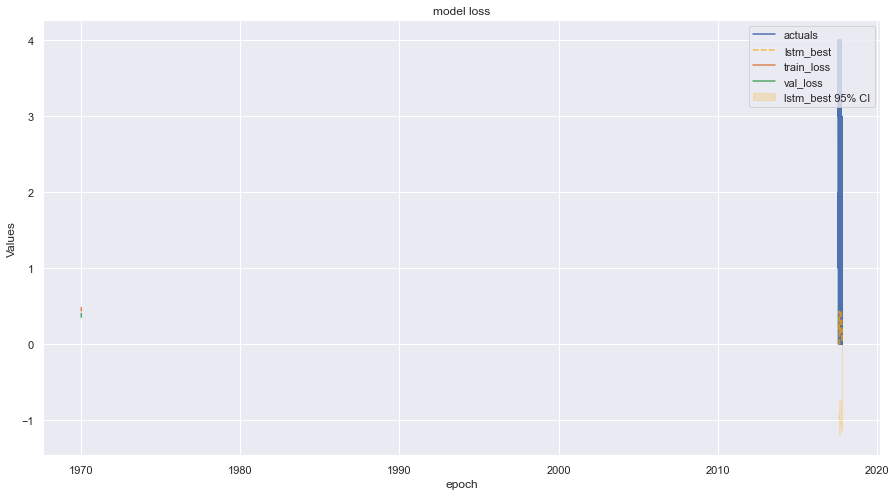

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.4523 - val_loss: 0.4170
Epoch 2/2
1/1 [==============================] - 1s 677ms/step - loss: 0.4331 - val_loss: 0.3971
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.4714 - val_loss: 0.3972
Epoch 2/2
2/2 [==============================] - 1s 517ms/step - loss: 0.4423 - val_loss: 0.3314


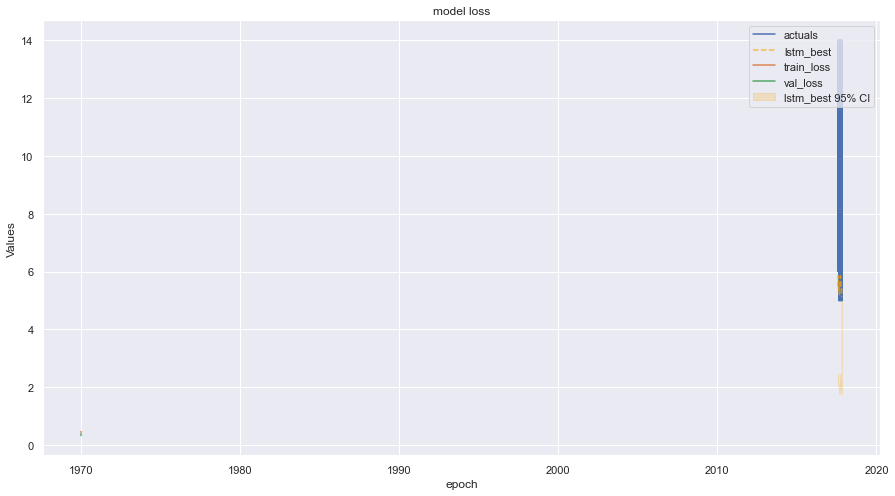

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.4125 - val_loss: 0.4623
Epoch 2/2
1/1 [==============================] - 1s 754ms/step - loss: 0.4016 - val_loss: 0.4452
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.4242 - val_loss: 0.4288
Epoch 2/2
2/2 [==============================] - 1s 504ms/step - loss: 0.3880 - val_loss: 0.3576


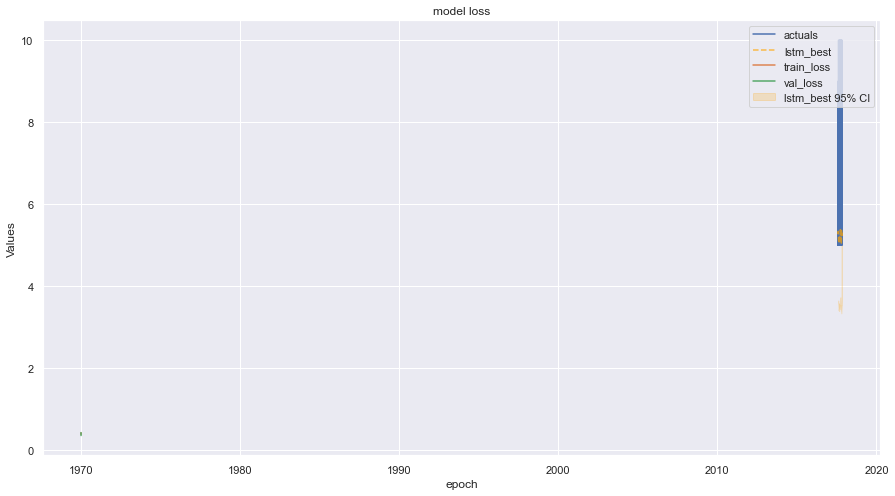

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.4373 - val_loss: 0.5507
Epoch 2/2
1/1 [==============================] - 1s 706ms/step - loss: 0.4132 - val_loss: 0.5191
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.4532 - val_loss: 0.5274
Epoch 2/2
2/2 [==============================] - 1s 523ms/step - loss: 0.4076 - val_loss: 0.4547


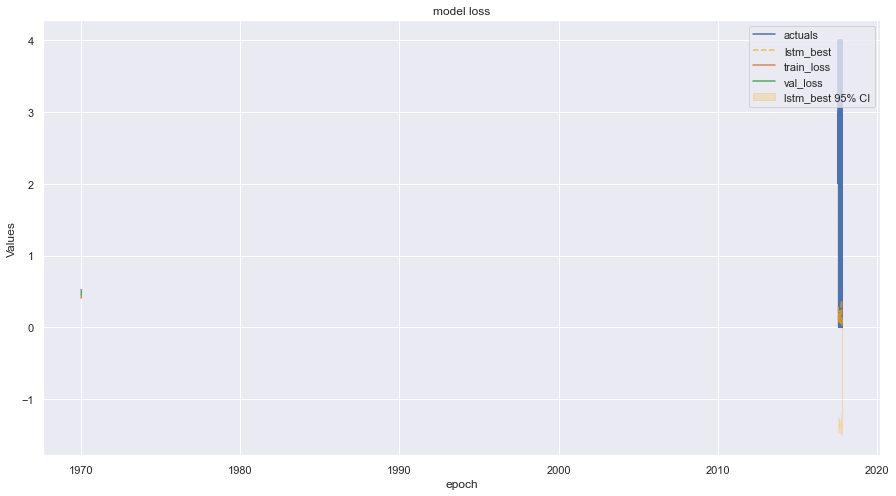

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.2839 - val_loss: 0.3947
Epoch 2/2
1/1 [==============================] - 1s 835ms/step - loss: 0.2792 - val_loss: 0.3938
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.3462 - val_loss: 0.3758
Epoch 2/2
2/2 [==============================] - 1s 505ms/step - loss: 0.3405 - val_loss: 0.3761


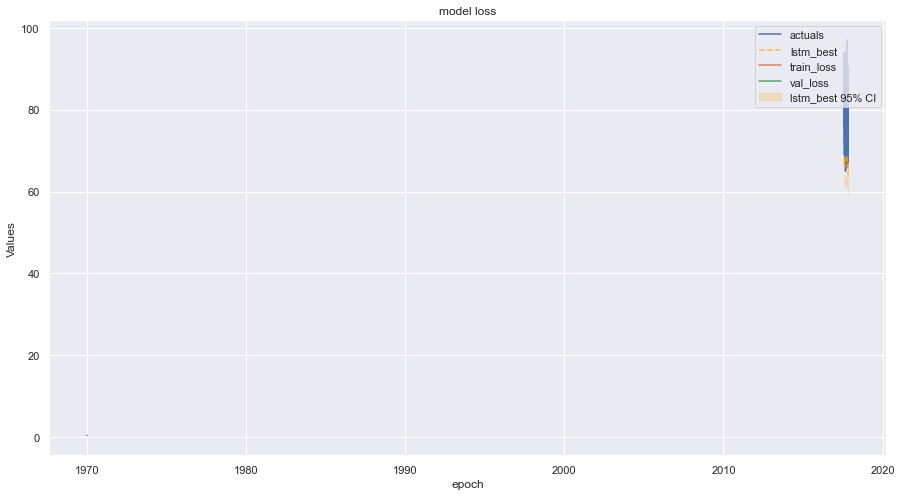

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.5267 - val_loss: 0.5536
Epoch 2/2
1/1 [==============================] - 1s 759ms/step - loss: 0.5051 - val_loss: 0.5356
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4983 - val_loss: 0.5197
Epoch 2/2
2/2 [==============================] - 1s 553ms/step - loss: 0.4614 - val_loss: 0.4488


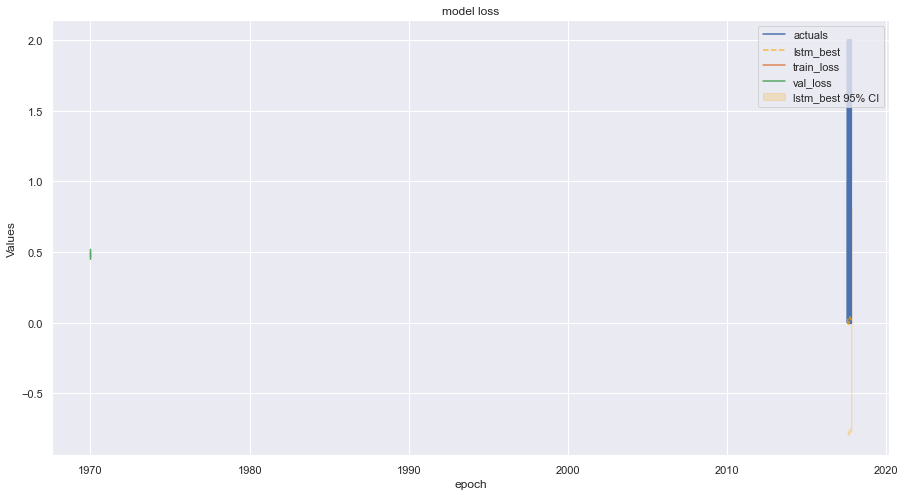

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.4771 - val_loss: 0.4287
Epoch 2/2
1/1 [==============================] - 1s 875ms/step - loss: 0.4613 - val_loss: 0.4169
Epoch 1/2
2/2 [==============================] - 15s 4s/step - loss: 0.5000 - val_loss: 0.4286
Epoch 2/2
2/2 [==============================] - 1s 515ms/step - loss: 0.4690 - val_loss: 0.3923


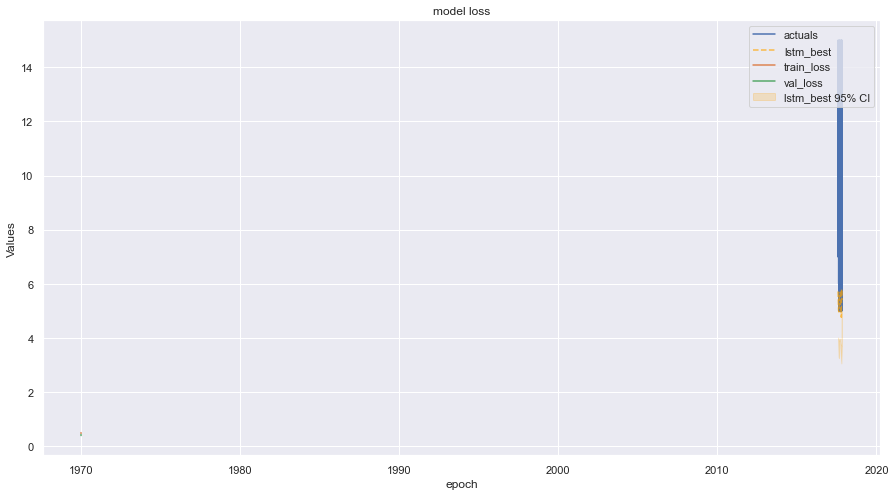

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.5420 - val_loss: 0.4979
Epoch 2/2
1/1 [==============================] - 1s 747ms/step - loss: 0.5217 - val_loss: 0.4756
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.4940 - val_loss: 0.4916
Epoch 2/2
2/2 [==============================] - 1s 542ms/step - loss: 0.4559 - val_loss: 0.4158


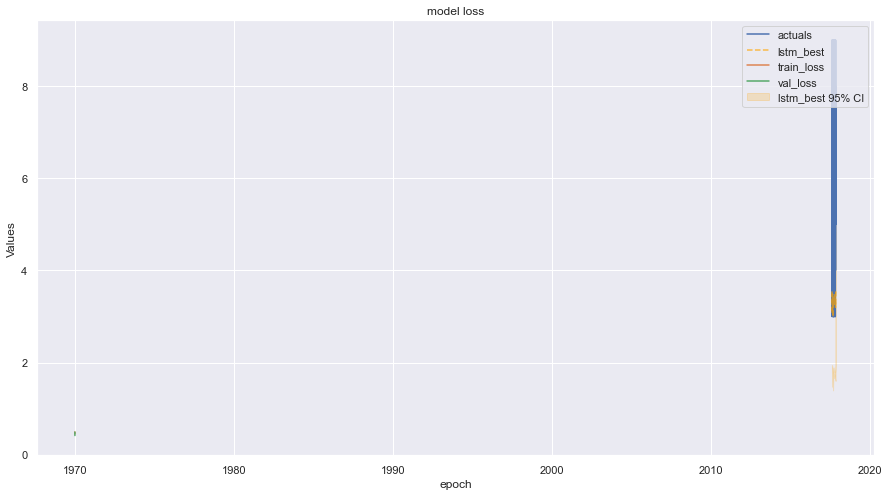

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.4455 - val_loss: 0.5021
Epoch 2/2
1/1 [==============================] - 1s 673ms/step - loss: 0.4250 - val_loss: 0.4737
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4300 - val_loss: 0.4694
Epoch 2/2
2/2 [==============================] - 1s 588ms/step - loss: 0.3969 - val_loss: 0.3926


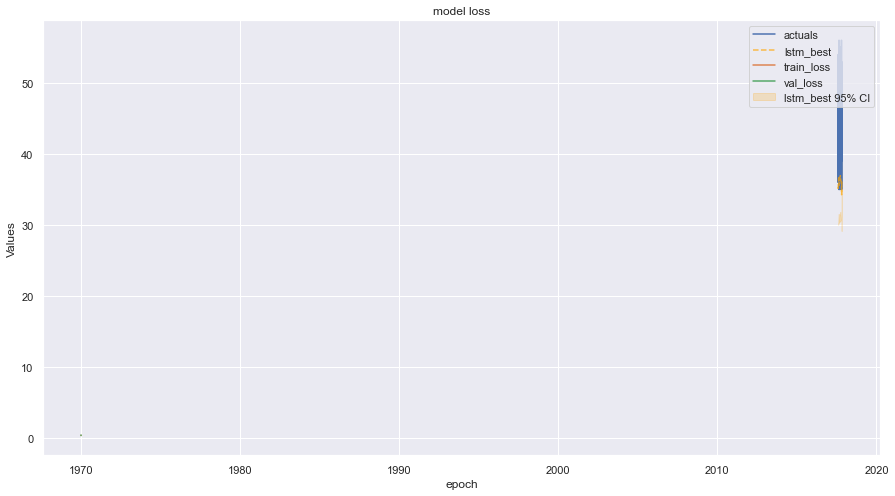

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.5658 - val_loss: 0.5152
Epoch 2/2
1/1 [==============================] - 1s 782ms/step - loss: 0.5456 - val_loss: 0.4924
Epoch 1/2
2/2 [==============================] - 17s 4s/step - loss: 0.5539 - val_loss: 0.4887
Epoch 2/2
2/2 [==============================] - 1s 686ms/step - loss: 0.5041 - val_loss: 0.4194


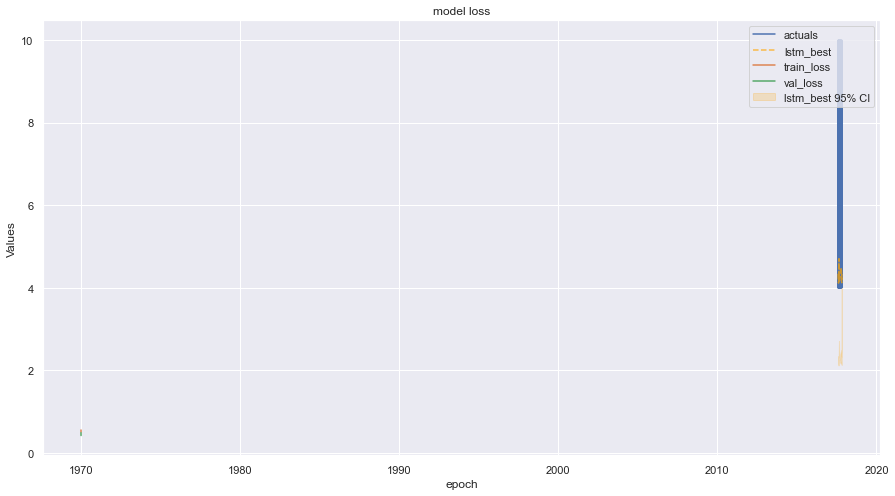

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.4395 - val_loss: 0.5342
Epoch 2/2
1/1 [==============================] - 1s 663ms/step - loss: 0.4226 - val_loss: 0.4989
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.4682 - val_loss: 0.5312
Epoch 2/2
2/2 [==============================] - 1s 501ms/step - loss: 0.4397 - val_loss: 0.4530


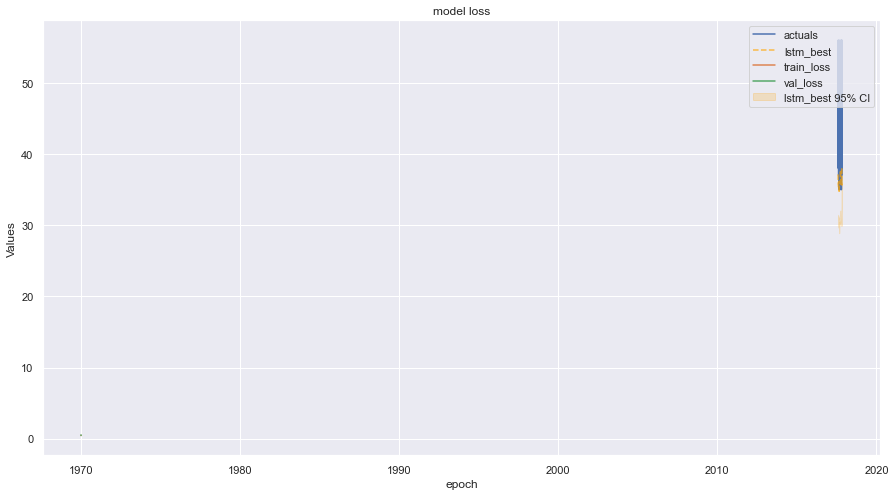

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.3806 - val_loss: 0.4562
Epoch 2/2
1/1 [==============================] - 1s 759ms/step - loss: 0.3616 - val_loss: 0.4451
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4383 - val_loss: 0.4135
Epoch 2/2
2/2 [==============================] - 1s 663ms/step - loss: 0.3867 - val_loss: 0.3603


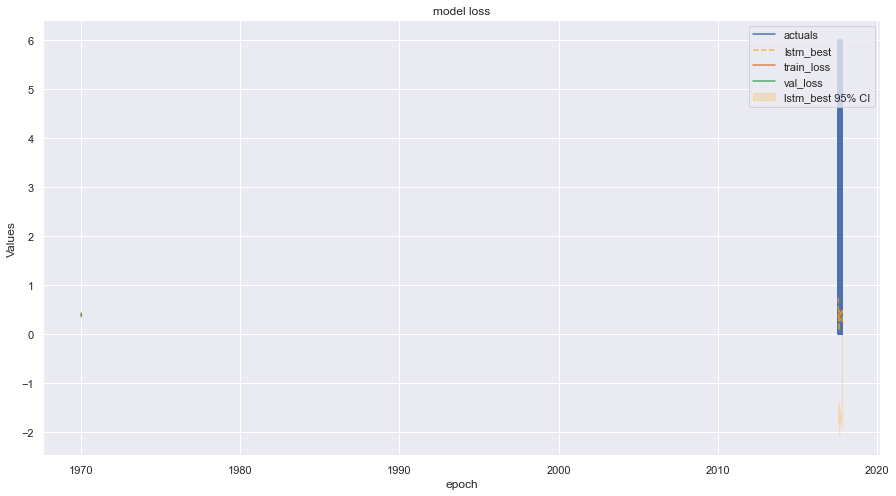

Epoch 1/2
1/1 [==============================] - 17s 17s/step - loss: 0.4205 - val_loss: 0.3966
Epoch 2/2
1/1 [==============================] - 1s 725ms/step - loss: 0.3984 - val_loss: 0.3647
Epoch 1/2
2/2 [==============================] - 16s 3s/step - loss: 0.4762 - val_loss: 0.3905
Epoch 2/2
2/2 [==============================] - 1s 725ms/step - loss: 0.4370 - val_loss: 0.3284


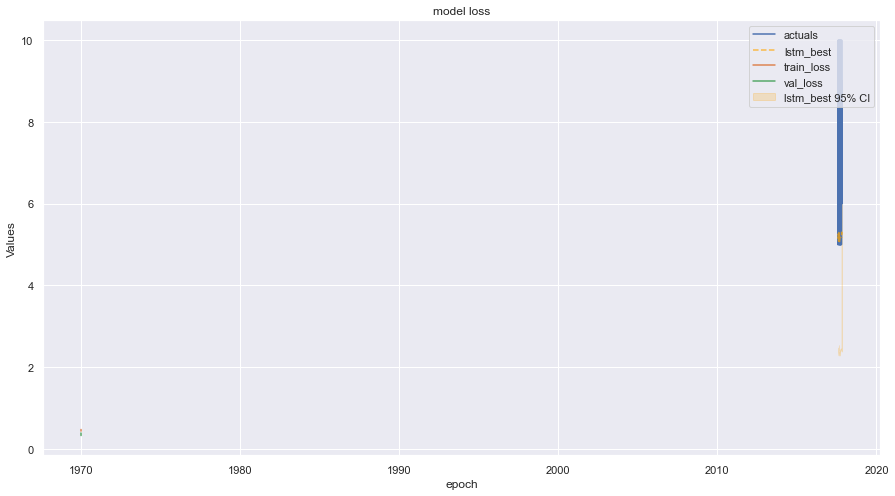

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.5522 - val_loss: 0.6554
Epoch 2/2
1/1 [==============================] - 1s 808ms/step - loss: 0.5334 - val_loss: 0.6395
Epoch 1/2
2/2 [==============================] - 18s 4s/step - loss: 0.5480 - val_loss: 0.6483
Epoch 2/2
2/2 [==============================] - 1s 636ms/step - loss: 0.5075 - val_loss: 0.5927


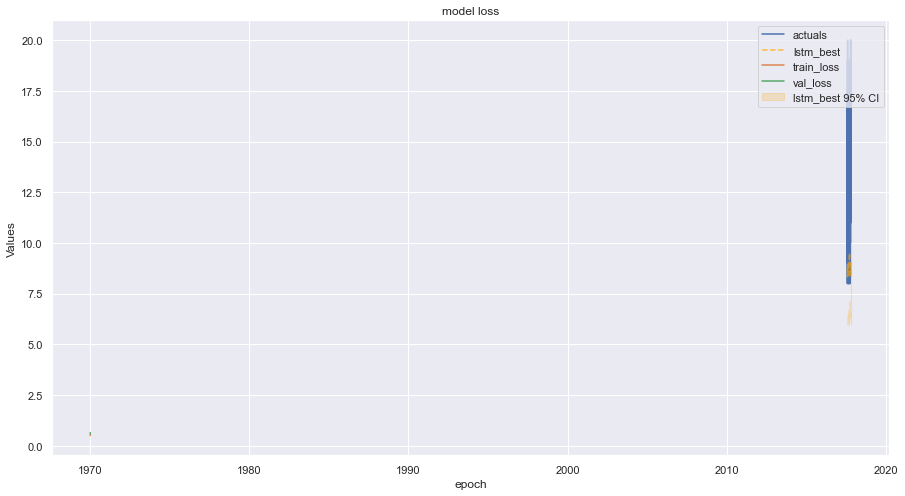

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.6288 - val_loss: 0.4143
Epoch 2/2
1/1 [==============================] - 1s 707ms/step - loss: 0.6124 - val_loss: 0.3932
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.5903 - val_loss: 0.4045
Epoch 2/2
2/2 [==============================] - 1s 554ms/step - loss: 0.5583 - val_loss: 0.3583


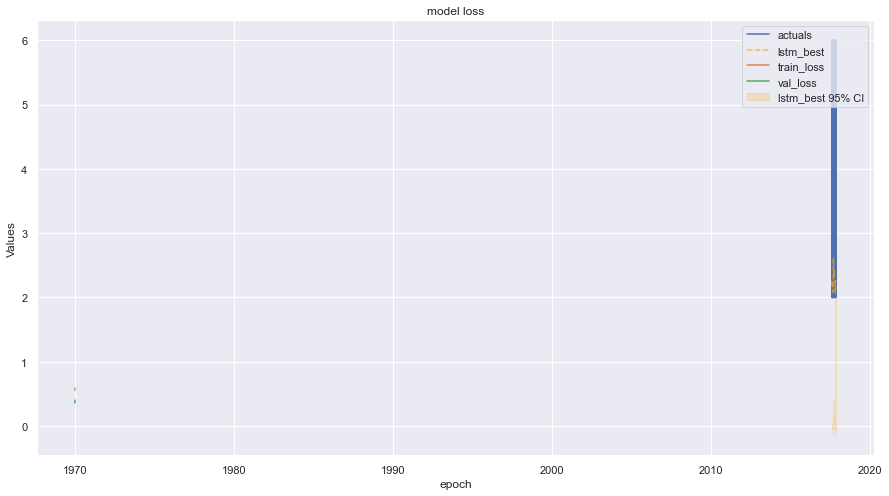

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.3567 - val_loss: 0.4068
Epoch 2/2
1/1 [==============================] - 1s 737ms/step - loss: 0.3485 - val_loss: 0.4010
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4201 - val_loss: 0.4101
Epoch 2/2
2/2 [==============================] - 1s 519ms/step - loss: 0.4100 - val_loss: 0.3819


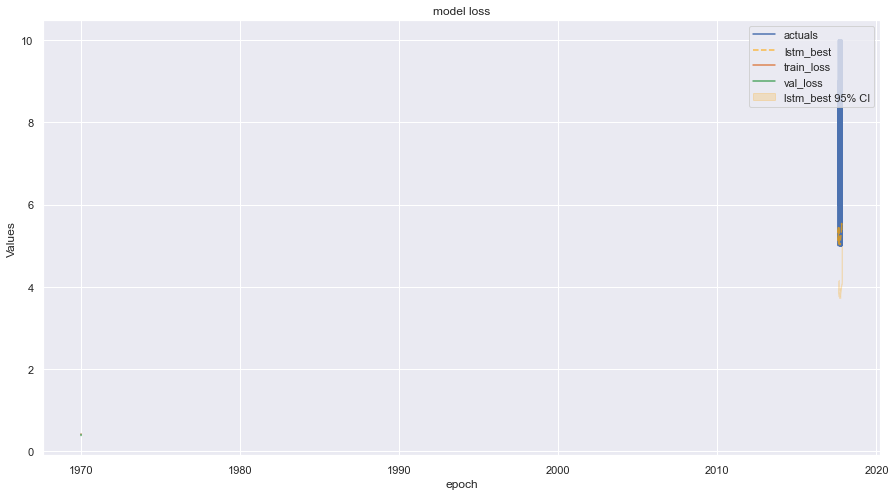

Epoch 1/2
1/1 [==============================] - 18s 18s/step - loss: 0.4861 - val_loss: 0.5354
Epoch 2/2
1/1 [==============================] - 1s 739ms/step - loss: 0.4651 - val_loss: 0.5105
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.4737 - val_loss: 0.4849
Epoch 2/2
2/2 [==============================] - 1s 559ms/step - loss: 0.4209 - val_loss: 0.3980


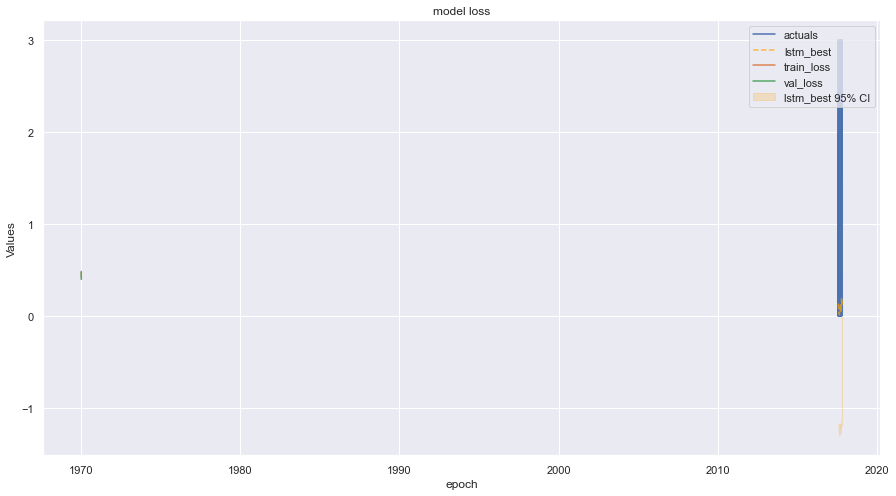

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.4325 - val_loss: 0.4775
Epoch 2/2
1/1 [==============================] - 1s 859ms/step - loss: 0.4106 - val_loss: 0.4483
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.4436 - val_loss: 0.4576
Epoch 2/2
2/2 [==============================] - 1s 616ms/step - loss: 0.3978 - val_loss: 0.3524


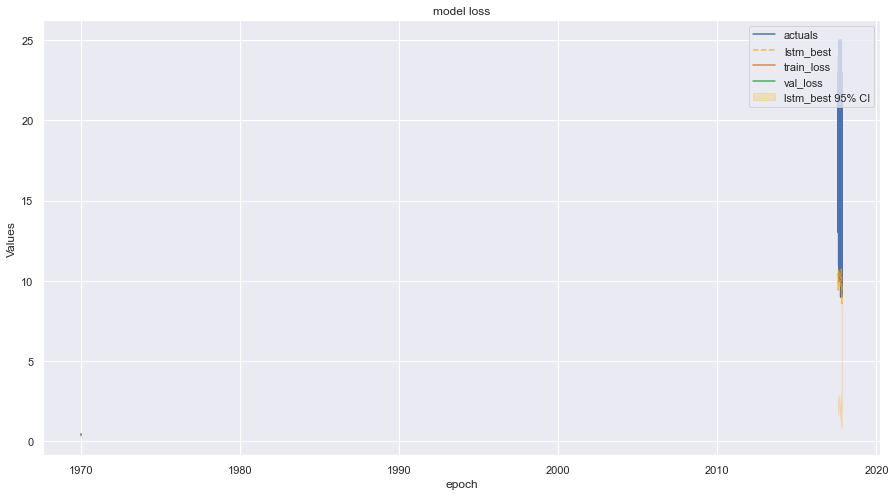

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.4118 - val_loss: 0.4258
Epoch 2/2
1/1 [==============================] - 1s 956ms/step - loss: 0.4050 - val_loss: 0.4232
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.4155 - val_loss: 0.4345
Epoch 2/2
2/2 [==============================] - 1s 520ms/step - loss: 0.4030 - val_loss: 0.4319


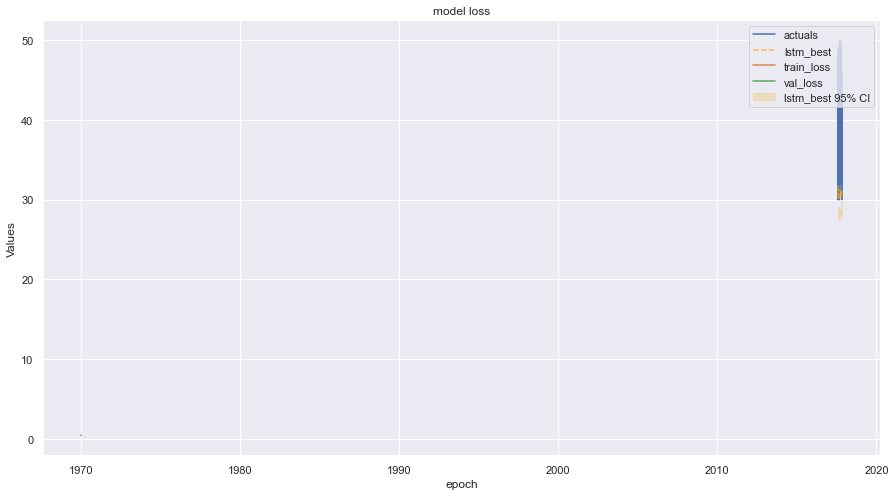

Epoch 1/2
1/1 [==============================] - 13s 13s/step - loss: 0.5492 - val_loss: 0.4583
Epoch 2/2
1/1 [==============================] - 1s 689ms/step - loss: 0.5298 - val_loss: 0.4386
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.5530 - val_loss: 0.4579
Epoch 2/2
2/2 [==============================] - 1s 555ms/step - loss: 0.5084 - val_loss: 0.4034


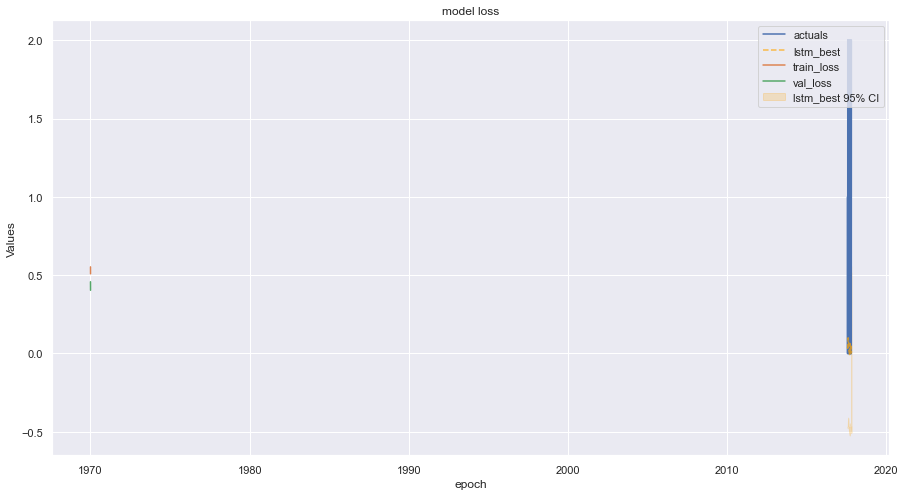

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.3936 - val_loss: 0.2996
Epoch 2/2
1/1 [==============================] - 1s 909ms/step - loss: 0.3721 - val_loss: 0.2778
Epoch 1/2
2/2 [==============================] - 16s 4s/step - loss: 0.4387 - val_loss: 0.2623
Epoch 2/2
2/2 [==============================] - 1s 616ms/step - loss: 0.3937 - val_loss: 0.2127


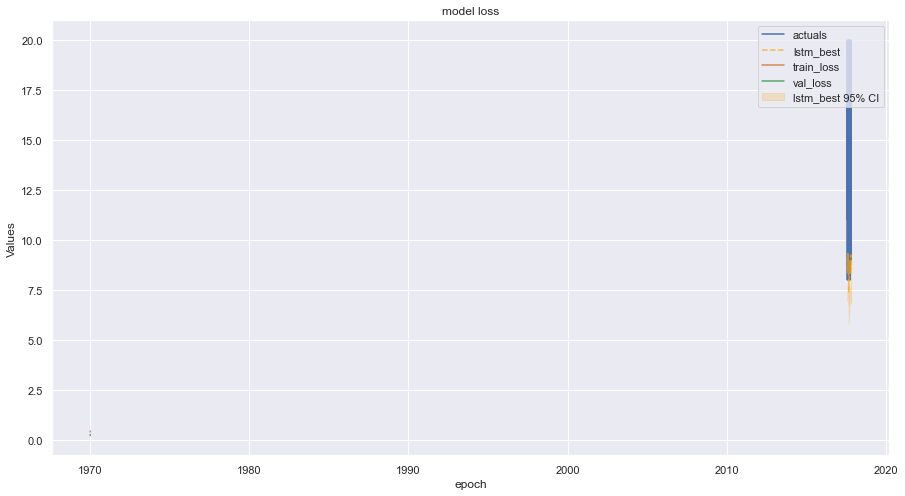

Epoch 1/2
1/1 [==============================] - 6660s 6660s/step - loss: 0.5541 - val_loss: 0.5356
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 0.5322 - val_loss: 0.5273
Epoch 1/2
2/2 [==============================] - 13s 3s/step - loss: 0.5436 - val_loss: 0.5330
Epoch 2/2
2/2 [==============================] - 1s 427ms/step - loss: 0.5081 - val_loss: 0.4893


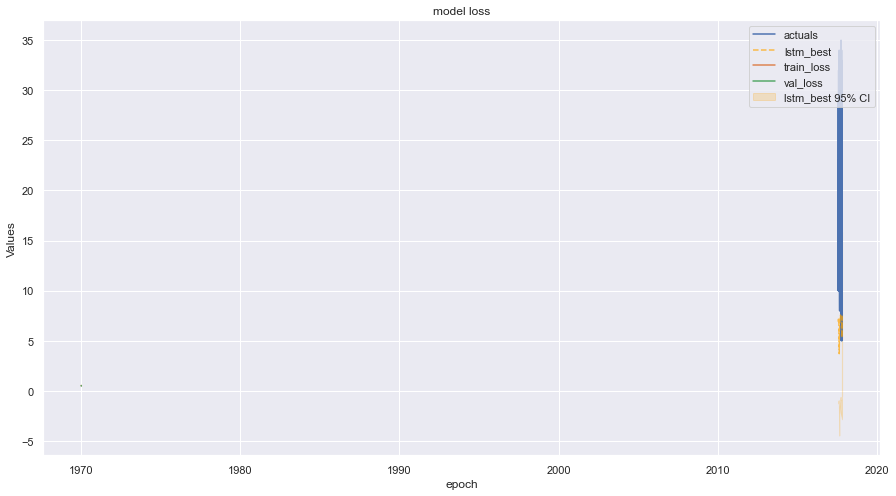

Epoch 1/2
1/1 [==============================] - 9s 9s/step - loss: 0.5426 - val_loss: 0.4605
Epoch 2/2
1/1 [==============================] - 1s 677ms/step - loss: 0.5213 - val_loss: 0.4432
Epoch 1/2
2/2 [==============================] - 10s 2s/step - loss: 0.5268 - val_loss: 0.4510
Epoch 2/2
2/2 [==============================] - 1s 423ms/step - loss: 0.4727 - val_loss: 0.4029


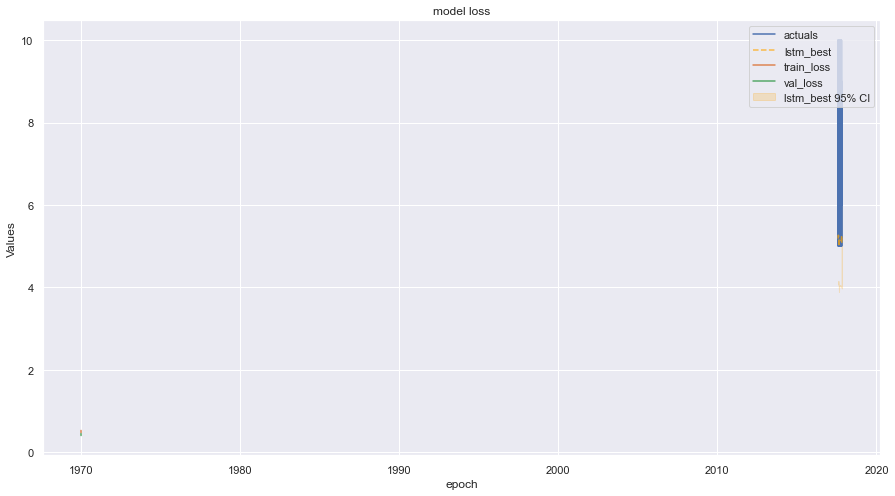

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 0.5207 - val_loss: 0.5430
Epoch 2/2
1/1 [==============================] - 1s 581ms/step - loss: 0.5066 - val_loss: 0.5308
Epoch 1/2
2/2 [==============================] - 12s 2s/step - loss: 0.4975 - val_loss: 0.5191
Epoch 2/2
2/2 [==============================] - 1s 518ms/step - loss: 0.4599 - val_loss: 0.4631


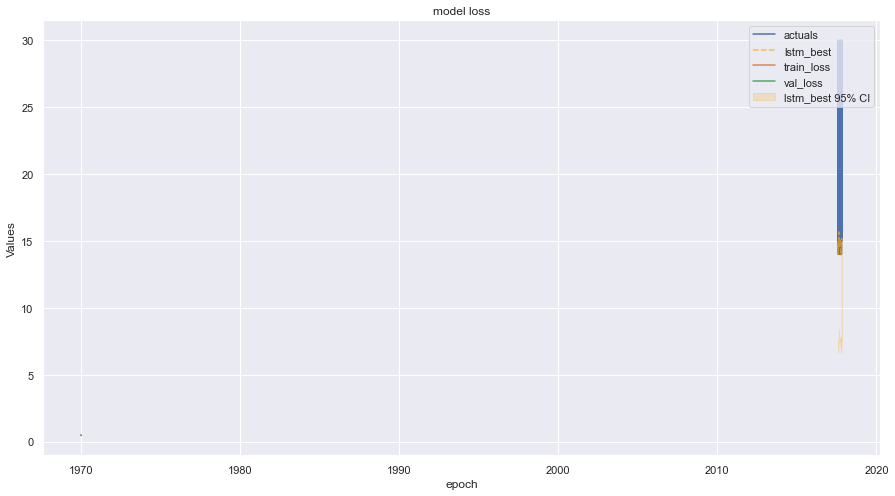

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 0.5366 - val_loss: 0.4988
Epoch 2/2
1/1 [==============================] - 1s 745ms/step - loss: 0.5092 - val_loss: 0.4619
Epoch 1/2
2/2 [==============================] - 14s 3s/step - loss: 0.5370 - val_loss: 0.4565
Epoch 2/2
2/2 [==============================] - 1s 542ms/step - loss: 0.4571 - val_loss: 0.2955


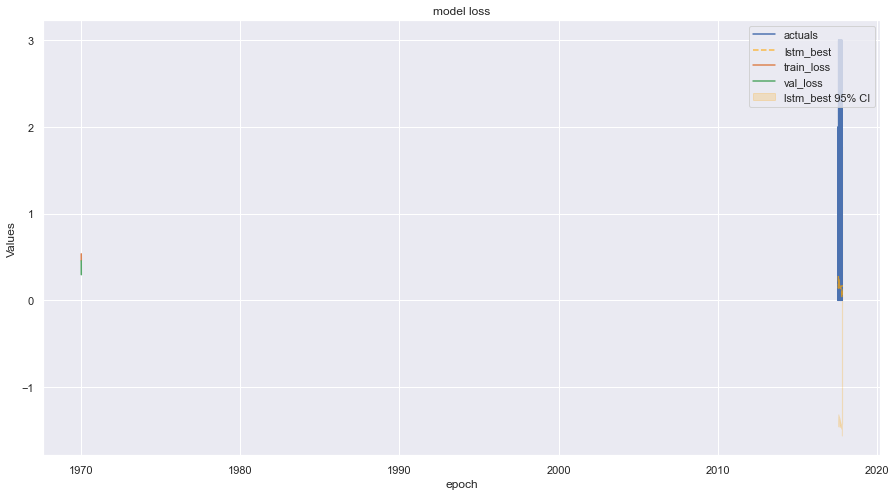

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 0.4632 - val_loss: 0.3228
Epoch 2/2
1/1 [==============================] - 1s 739ms/step - loss: 0.4434 - val_loss: 0.3054
Epoch 1/2
2/2 [==============================] - 15s 3s/step - loss: 0.4739 - val_loss: 0.2984
Epoch 2/2
2/2 [==============================] - 1s 570ms/step - loss: 0.4096 - val_loss: 0.2632


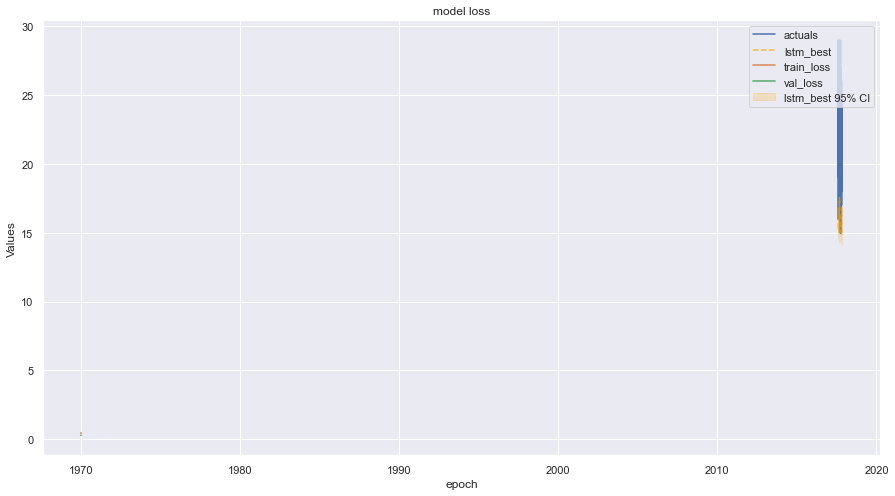

Epoch 1/2
1/1 [==============================] - 16s 16s/step - loss: 0.5201 - val_loss: 0.4722
Epoch 2/2
1/1 [==============================] - 1s 854ms/step - loss: 0.4991 - val_loss: 0.4456
Epoch 1/2
2/2 [==============================] - 18s 3s/step - loss: 0.4901 - val_loss: 0.4521
Epoch 2/2
2/2 [==============================] - 1s 513ms/step - loss: 0.4379 - val_loss: 0.3641


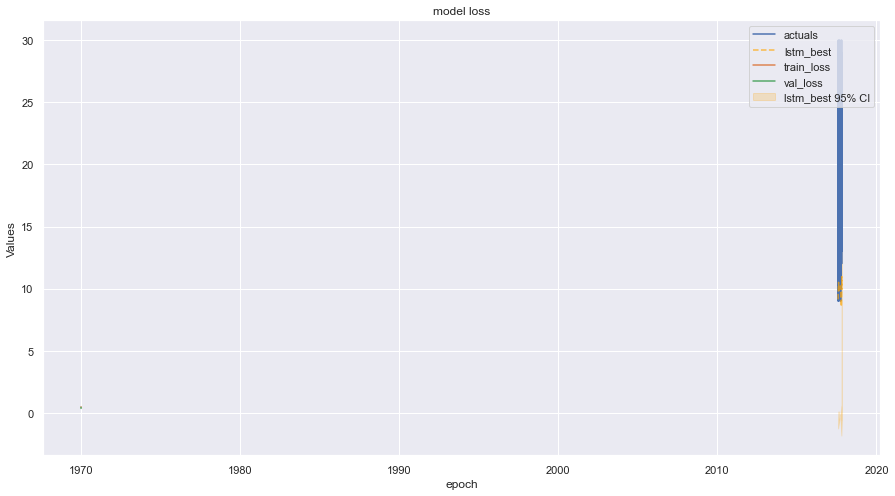

Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 0.5291 - val_loss: 0.5097
Epoch 2/2
1/1 [==============================] - 1s 736ms/step - loss: 0.5126 - val_loss: 0.4880
Epoch 1/2


In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})
df = pd.read_csv('CBD poi.csv',parse_dates=['date'])
df.sort_index(inplace=True)


df[['date']] = df[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[5:7],s[8:], s[0:4]))
mydate = df[['date']]    

def myfun(poi_data):
#     print('Column Contents: ', poi_data)
    df = pd.DataFrame(poi_data, columns = ['poi'])
    dataframe = pd.concat([mydate,df], axis=1, join='inner')
#     print(dataframe)
    f = Forecaster(y=dataframe['poi'],
                   current_dates=dataframe['date'].apply(str))
    stat, pval, _, _, _, _ = f.adf_test(full_res=True)
    f.set_test_length(12)       # 1. 12 observations to test the results
    f.generate_future_dates(12) # 2. 12 future points to forecast
    f.set_estimator('lstm')     # 3. LSTM neural network
    f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=2,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
    f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
    
    
for i in range(df.shape[1]):
    poi = df.iloc[: , i+1]
    myfun(poi.values)
#     print('Column Contents: ', poi.values)
